# MINE 4101 Ciencia de datos aplicados - Proyecto 1

## 0. Importaci√≥n de librer√≠as y preparaci√≥n del entorno de trabajo


In [126]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# path="Trasplante hep√°tico consolidado limpio.xlsx"

path = os.path.join(
    "C:\\",
    "Users",
    "jmriv",
    "OneDrive - Universidad de los andes",
    "Semestres uniandes",
    "2025-2",
    "Ciencia de datos aplicada",
    "Proyecto transplantes hep√°ticos Fundaci√≥n Sanatf√©",
    "Trasplante hep√°tico consolidado limpio.xlsx"
)

In [127]:
df = pd.read_excel(path,index_col=0)
df.sample(3)

A√±o_Tx  Mes_Tx#1  Edad_Al_Tx  Tiempo_En_Lista_D√≠as  \
#_Paciente                                                       
710           2024         6   16.000000                 186.0   
608           2021         8   56.758904                 362.0   
279           2012         2   35.594521                  32.0   

            Tiempo_En_Lista_Meses  Tiempo_En_Lista_A√±os  Sexo_Receptor  EPS  \
#_Paciente                                                                    
710                      6.200000              0.516667              2  1.0   
608                     12.066667              1.005556              1  2.0   
279                      1.066667              0.088889              2  6.0   

            Causa_1_Tx_Hep√°tico_  Causa_2_Tx_Hep√°tico_  ...  EKG_VALOR_POP_1  \
#_Paciente                                              ...                    
710                          7.0                   0.0  ...              NaN   
608                          3.0                   0.0  ...              0.0   
279                          8.0                   0.0  ...              NaN   

            EKG_VALOR_POP_categoria  Retrasplante_bool  \
#_Paciente                                               
710                             NaN                0.0   
608                          Normal                0.0   
279                             NaN                0.0   

            Indicaci√≥n_Retrasplante_categoria  Fecha_Tx#2  \
#_Paciente                                                  
710                                       NaN         NaT   
608                                       NaN         NaT   
279                                       NaN         NaT   

            Indicaci√≥n_Retrasplante_categoria.1  Grado_HCC_desc  \
#_Paciente                                                        
710                                         NaN             NaN   
608                                         NaN             NaN   
279                                         NaN             NaN   

            Sobrevida_D√≠as_calculado  Causa_De_Muerte_categoria  \
#_Paciente                                                        
710                            196.0                        NaN   
608                           1218.0                        NaN   
279                           4692.0                        NaN   

            C√≥digo de anonimizaci√≥n  
#_Paciente                           
710                        TXHEP710  
608                        TXHEP608  
279                        TXHEP279  

[3 rows x 139 columns]

## Funciones de graficado

In [128]:
def contingencia_vs_complicacion(col, label, x_labels, size=None):
    contingency_table = pd.crosstab(
        df['¬øComplicaci√≥n?'],
        df[col]
    )
    
    n=len(df[col].unique())
    percentages = contingency_table.div(contingency_table.sum(axis=0), axis=1) * 100
    annot = contingency_table.astype(str) + " (" + percentages.round(1).astype(str) + "%)"

    if size:
        plt.figure(figsize=size)
    sns.heatmap(percentages, annot=annot, fmt="", cmap="YlGnBu")

    plt.xticks([i+0.5 for i in range(n-1)], x_labels)
    plt.yticks([i+0.5 for i in range(2)], ['No', 'S√≠'], rotation=0)

    plt.title(f"{label} vs. complicaciones")
    plt.xlabel(label)
    plt.ylabel('¬øComplicaciones?')
    plt.show()

In [129]:
def box_plot_vs_complicacion(col, label):
    groups = [df[df['¬øComplicaci√≥n?']==num][col].dropna() for num in range(2)]

    plt.boxplot(
        groups,
        tick_labels=[f'No ({len(df[df["¬øComplicaci√≥n?"]==0][col].dropna())})',
                    f'Si ({len(df[df["¬øComplicaci√≥n?"]==1][col].dropna())})']
        )
    plt.xlabel("¬øComplicaciones?")
    plt.ylabel(label)
    plt.show()

# An√°lisis univariado

## Complicaciones

Text(0.5, 1.0, 'Proporci√≥n de pacientes que presentan complicaciones')

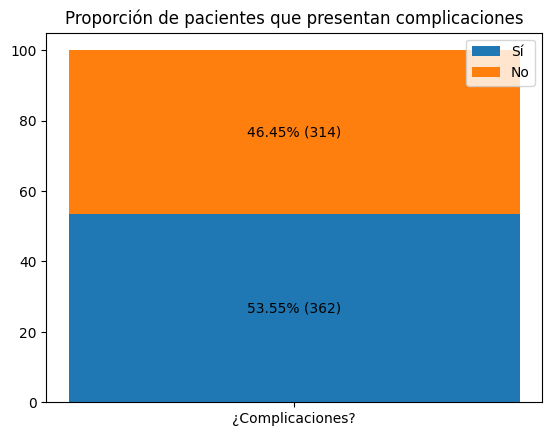

In [130]:
count = df['¬øComplicaci√≥n?'].value_counts(normalize=True)
bottom = 0
for label, value in count.items():
    new_label = "S√≠" if label else "No"

    bar = plt.bar('¬øComplicaciones?', value*100, bottom=bottom, label = new_label)
    plt.bar_label(
        bar,
        label_type= 'center',
        labels= [
            f'{value:.2%} ({df[df["¬øComplicaci√≥n?"]==label]["¬øComplicaci√≥n?"].value_counts()[label]})'
            ]
    )
    bottom += value*100
plt.legend()
plt.title('Proporci√≥n de pacientes que presentan complicaciones')

## Grupo etario

In [131]:
# Calcular variable de grupo etario
bins = [0, 17, 39, 59, 74, 120]
labels = ['<18', '18-39', '40-59', '60-74', '75+']

df['Grupo_Edad'] = pd.cut(
    df['Edad_Al_Tx'],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
)

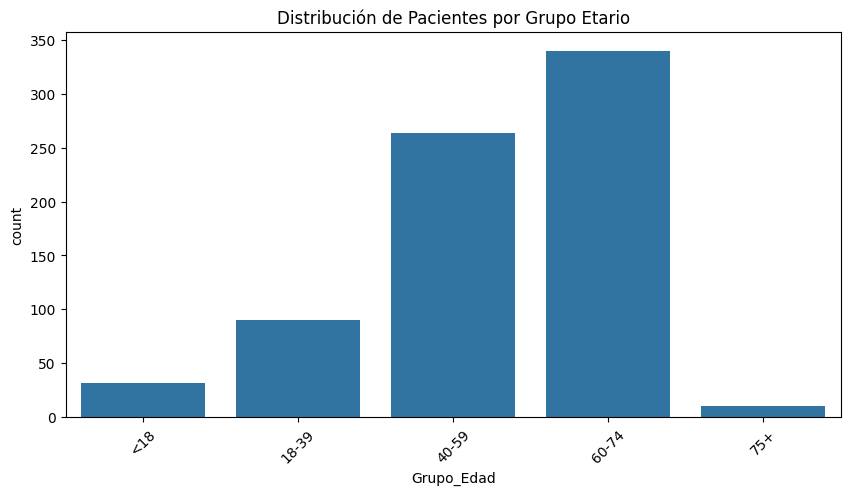

In [132]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Grupo_Edad' )
plt.xticks(rotation=45)
plt.title("Distribuci√≥n de Pacientes por Grupo Etario")
plt.show()

## Sexo del receptor

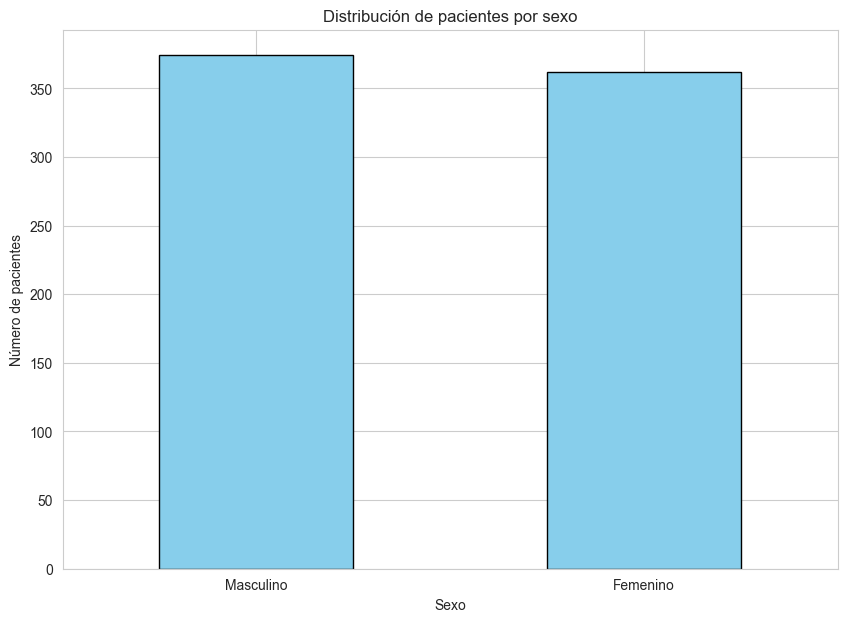

In [219]:
sexo = df['Sexo_Receptor']
mapa_sexo = {1: "Masculino", 2: "Femenino"}
sexo = sexo.replace(mapa_sexo)
sexo.value_counts().plot.bar(color="skyblue", edgecolor="black")
plt.title("Distribuci√≥n de pacientes por sexo")
plt.xlabel("Sexo")
plt.ylabel("N√∫mero de pacientes")
plt.xticks(rotation=0)
plt.show()

## A√±o del transplante

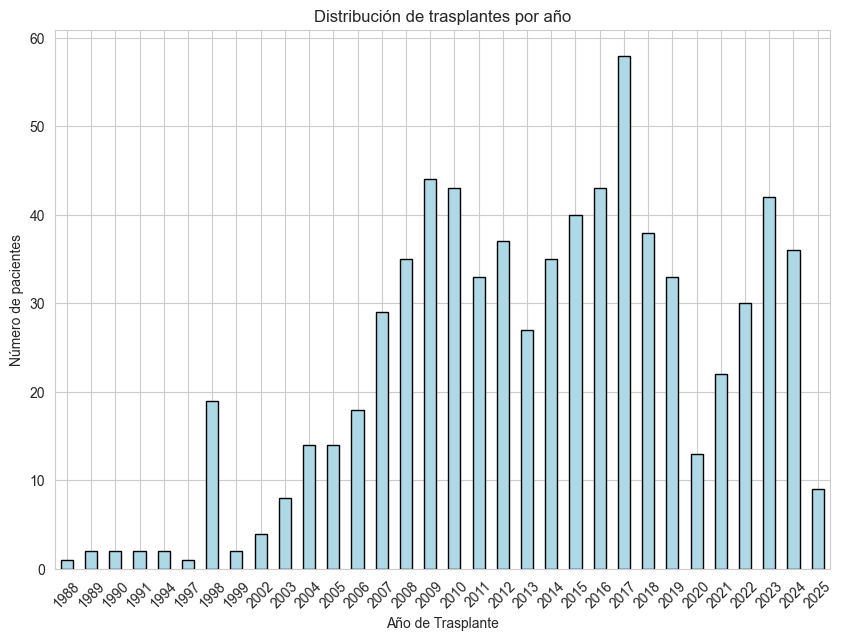

In [220]:
df['A√±o_Tx'].value_counts().sort_index().plot.bar(
    color="lightblue", edgecolor="black"
)

plt.title("Distribuci√≥n de trasplantes por a√±o")
plt.xlabel("A√±o de Trasplante")
plt.ylabel("N√∫mero de pacientes")
plt.xticks(rotation=45)  # gira etiquetas si son muchos a√±os
plt.show()

## EPS

In [222]:
mapa_eps = {
    1.0: "COMPENSAR",
    2.0: "SANITAS",
    3.0: "FAMISANAR",
    4.0: "COOMEVA",
    5.0: "COLMEDICA",
    6.0: "SEC SALUD",
    7.0: "PONAL",
    8.0: "COLPATRIA",
    9.0: "EXTRANJERO",
    10.0: "ISS",
    11.0: "CRUZ BLANCA",
    12.0: "ECOPETROL",
    13.0: "UNISALUD",
    14.0: "CLINICA GENERAL DEL NORTE",
    15.0: "COSMITET",
    16.0: "HUMANA VIVIR",
    17.0: "PAGO DIRECTO",
    18.0: "COLSEGUROS",
    19.0: "SURAMERICANA",
    20.0: "NUEVA EPS",
    21.0: "HOSPITAL MILITAR",
    22.0: "SALUD TOTAL REG SUBSIDIADO",
    23.0: "ALIANZASALUD",
    24.0: "GOLDEN GROUP",
    25.0: "CAPITAL SALUD",
    26.0: "EMCOSALUD",
    27.0: "CAPRECOM",
    28.0: "SALUDVIDA",
    29.0: "SEGUROS BOLIVAR",
    30.0: "CAFESALUD",
    31.0: "UNIVERSIDAD DE CORDOBA",
    32.0: "ECOPSOS",
    33.0: "COOSALUD",
    34.0: "MEDIMAS",
    35.0: "ALLIANZ",
    36.0: "MEDPLUS",
    37.0: "FIDUPREVISORA",
}

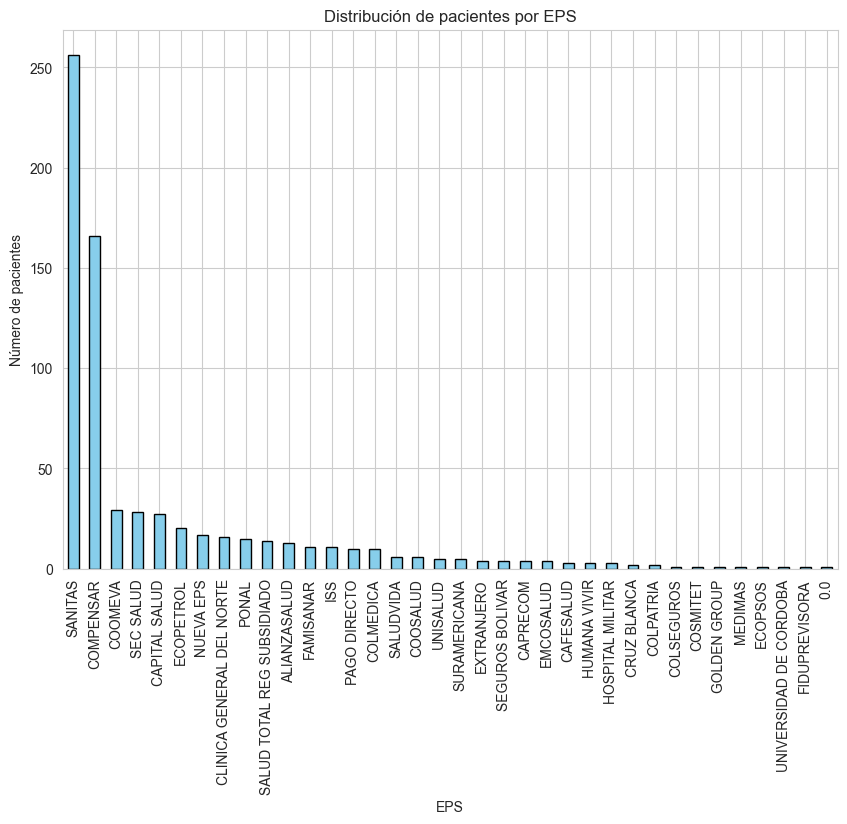

In [224]:
df['EPS'].replace(mapa_eps).value_counts().plot.bar(color="skyblue", edgecolor="black")

plt.title("Distribuci√≥n de pacientes por EPS")
plt.xlabel("EPS")
plt.ylabel("N√∫mero de pacientes")
plt.xticks(rotation=90)  # para leer mejor los nombres
plt.show()

## A√±os en lista de espera

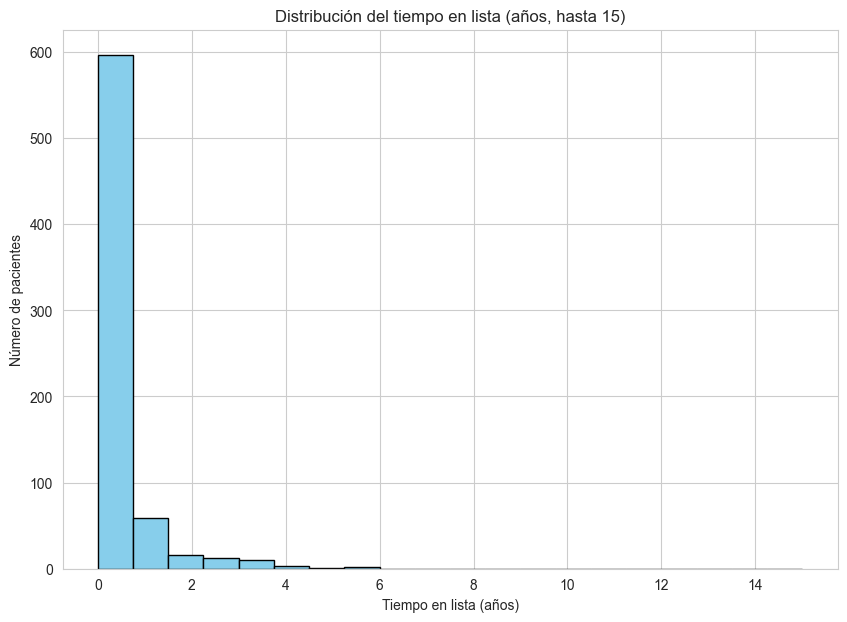

In [226]:
#La variable solo se gr√°fica hasta 15 a√±os, porque tiene outliers muy grandes
df['Tiempo_En_Lista_A√±os'].dropna().plot.hist(
    bins=20,
    range=(0, 15),   #l√≠mite del eje
    color="skyblue",
    edgecolor="black"
)
plt.title("Distribuci√≥n del tiempo en lista (a√±os, hasta 15)")
plt.xlabel("Tiempo en lista (a√±os)")
plt.ylabel("N√∫mero de pacientes")
plt.show()

## Causas del transplante

In [227]:
mapa_causas = {
    1: "HCV",
    2: "HBV",
    3: "NASH",
    4: "ALCOH√ìLICA",
    5: "HEMOCHROMATOSIS",
    6: "DEF ALFA 1 ANTITRIPSINA",
    7: "WILSON",
    8: "HEPATITIS AUTOINMUNE",
    9: "COLANGITIS BILIAR PRIMARIA",
    10: "COLANGITIS ESCLEROSANTE PRIMARIA",
    11: "OVERLAP (CBP + AIH)",
    12: "CRIPTOGENICA",
    13: "FIBROSIS HEP√ÅTICA CONGENITA",
    14: "ATRESIA V√çAS BILIARES",
    15: "COLANGIOCARCINOMA",
    16: "TUMOR MIOFIBROBL√ÅSTICO",
    17: "HEPATOBLASTOMA",
    18: "ADENOMA GIGANTE",
    19: "HIPERPLASIA NODULAR PROLIFERATIVA",
    20: "ENFERMEDAD POLIQUISTICA",
    21: "BUDDCHIARI",
    22: "CIRROSIS BILIAR SECUNDARIA",
    23: "FHF",
    24: "HELLP",
    25: "CIRROSIS DEL INJERTO",
    26: "COLANGIOPAT√çA ISQU√âMICA",
    27: "DEFECTO EN LA S√çNTESIS/SECRECI√ìN DE √ÅCIDOS",
    28: "QUISTE H√çDATIDO"
}

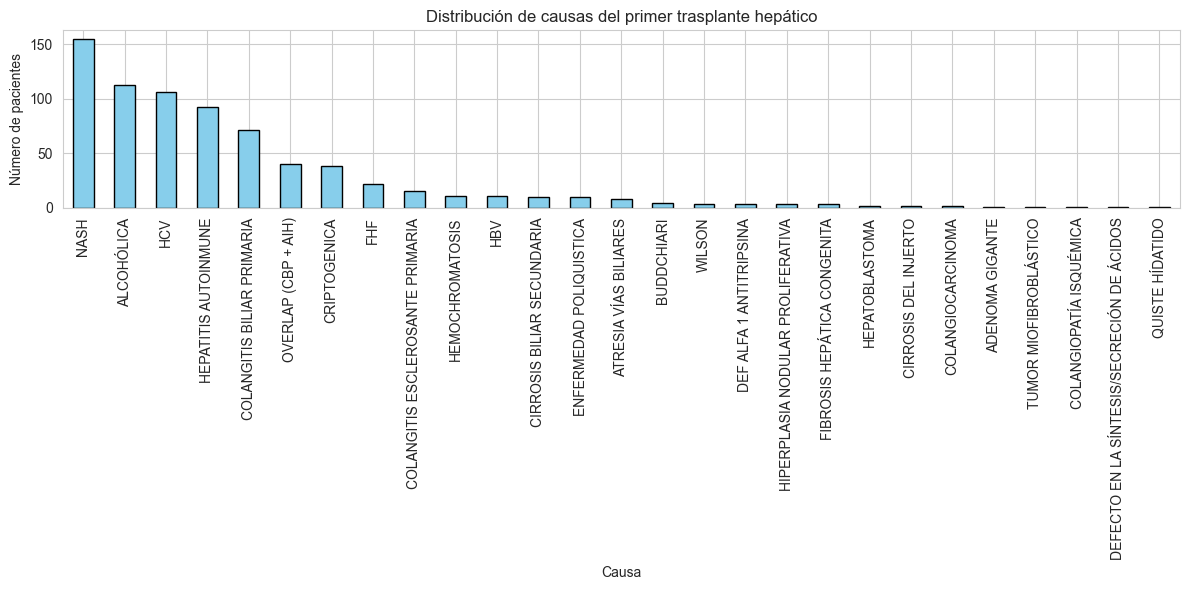

In [228]:
df['Causa1_nom'] = df['Causa_1_Tx_Hep√°tico_'].replace(mapa_causas)
(df['Causa1_nom']
 .value_counts()
 .plot.bar(color="skyblue", edgecolor="black", figsize=(12,6)))

plt.title("Distribuci√≥n de causas del primer trasplante hep√°tico")
plt.xlabel("Causa")
plt.ylabel("N√∫mero de pacientes")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Heptocarcinoma

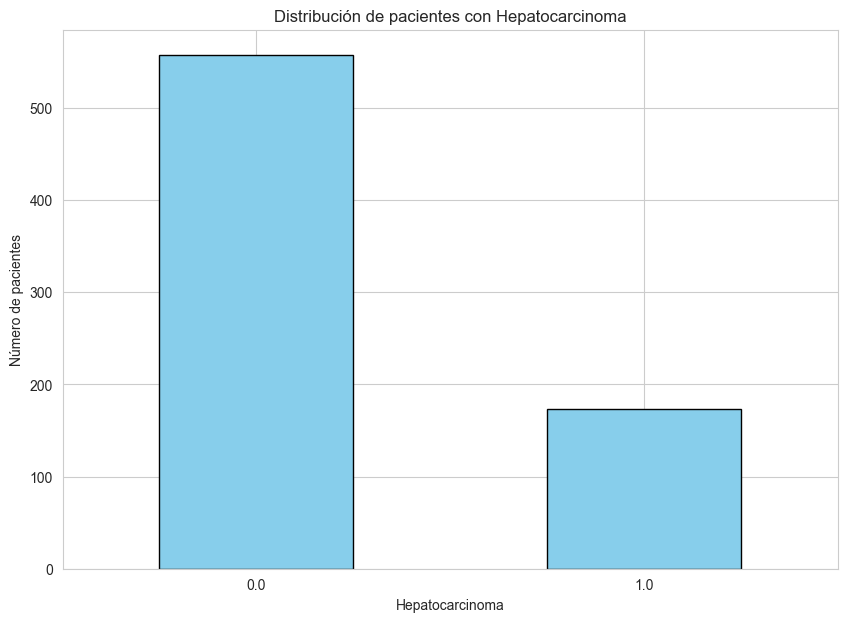

In [229]:
df['Hepatocarcinoma'].value_counts().plot.bar(
    color="skyblue", edgecolor="black"
)
plt.title("Distribuci√≥n de pacientes con Hepatocarcinoma")
plt.xlabel("Hepatocarcinoma")
plt.ylabel("N√∫mero de pacientes")
plt.xticks(rotation=0)  # etiquetas horizontales
plt.show()

## Sobrevida 30 d√≠as pos operatorio

Text(0.5, 1.0, 'Proporci√≥n de pacientes que sobreviven 30 d√≠as')

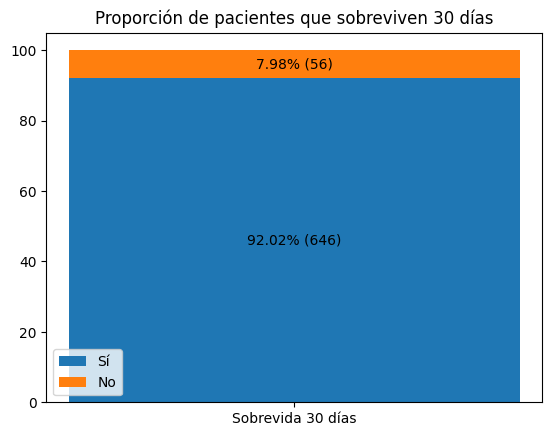

In [ ]:
count = df['Sobrevida_PeriQx_30_d√≠as_POP'].value_counts(normalize=True)
bottom = 0
for label, value in count.items():
    new_label = "S√≠" if label else "No"

    bar = plt.bar('Sobrevida 30 d√≠as', value*100, bottom=bottom, label = new_label)
    plt.bar_label(
        bar,
        label_type= 'center',
        labels= [
            f'{value:.2%} ({df[df["Sobrevida_PeriQx_30_d√≠as_POP"]==label]["Sobrevida_PeriQx_30_d√≠as_POP"].value_counts()[label]})'
            ]
    )
    bottom += value*100
plt.legend()
plt.title('Proporci√≥n de pacientes que sobreviven 30 d√≠as')

## Ecocardiograma posoperatorio PASP (pulmonary artery systolic pressure)

In [134]:
df[["Ecocardiograma_POP_PASP","¬øComplicaci√≥n?"]].loc[(df["Ecocardiograma_POP_PASP"]!= 0) & df["Ecocardiograma_POP_PASP"].notna()]

Ecocardiograma_POP_PASP  ¬øComplicaci√≥n?
#_Paciente                                         
55                             50.0             1.0
130                            33.0             1.0
156                            27.0             0.0
546                            31.0             0.0
620                            24.0             1.0
633                            38.0             1.0
637                            38.0             1.0
638                            40.0             1.0
639                            21.0             1.0
669                            72.0             1.0

In [135]:
df["Ecocardiograma_POP_PASP"].loc[df["Ecocardiograma_POP_PASP"]!= 0].describe()

count    10.000000
mean     37.400000
std      14.833895
min      21.000000
25%      28.000000
50%      35.500000
75%      39.500000
max      72.000000
Name: Ecocardiograma_POP_PASP, dtype: float64

Se registran solo 10 pacientes con datos en ecocardiograma, de ello se puede evidenciar que la media es de 37 unidades, lo cual segun su definici√≥n es una presi√≥n normal. Sin embargo el dato tambi√©n muestra pacientes con presiones por encima de los 39.5, lo cual puede entenderse como una muestra de hipertensi√≥n pulmonar

## Inmunosupresi√≥n con anticuerpos

El tratamiento inmunosupresior puede usarse tanto antes de la cirugia como despu√©s. Puede usarse como tratamiento de respuesta al rechazo o como terapia preventiva al mismo.

In [136]:
df['Inmunosupresi√≥n_con_Anticuerpos']

#_Paciente
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
      ... 
731     NO
733     NO
734    NaN
735    NaN
736    NaN
Name: Inmunosupresi√≥n_con_Anticuerpos, Length: 736, dtype: object

In [137]:
df["Inmunosupresi√≥n_con_Anticuerpos"].value_counts()

Inmunosupresi√≥n_con_Anticuerpos
NO    172
SI     56
Name: count, dtype: int64

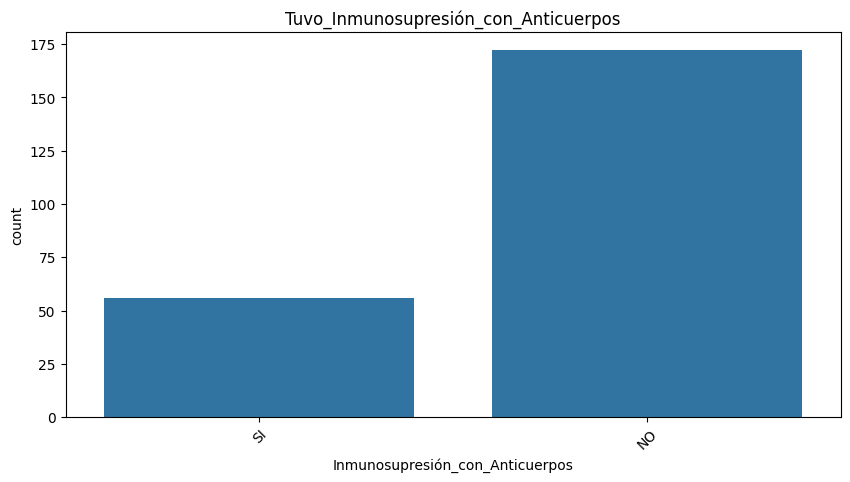

In [138]:
# tipo de reserva seg√∫n lead_time
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Inmunosupresi√≥n_con_Anticuerpos')
plt.xticks(rotation=45)
plt.title("Tuvo_Inmunosupresi√≥n_con_Anticuerpos")
plt.show()

En la base de datos analizada, 56 pacientes recibieron inmunosupresi√≥n con anticuerpos, mientras que 172 no la recibieron

## Œ±-Fetoprote√≠na al momento del diagn√≥stico
La Œ±FP es un macador tumoral

Se analizar√° esta variable de acuerdo a unos umbrales

In [139]:
bins = [-np.inf, 10, 100, 200, 400, 1000, np.inf]
labels = [
    'Normal (<10)',
    'Elevaci√≥n leve (10‚Äì100)',
    'Indeterminado (100‚Äì200)',  # puedes renombrar o eliminar si prefieres
    'Alta sospecha (>200)',
    'Diagn√≥stico probable (>400)',
    'Alta carga tumoral (>1000)'
]

# Crear la variable categ√≥rica
df['Œ±FP_categoria'] = pd.cut(
    df['Œ±FP_Al_Dx'],
    bins=bins,
    labels=labels,
    include_lowest=True,
    right=False  # el l√≠mite inferior es inclusivo
)

df['Œ±FP_categoria'].value_counts()

Œ±FP_categoria
Normal (<10)                   165
Elevaci√≥n leve (10‚Äì100)         53
Alta sospecha (>200)            11
Diagn√≥stico probable (>400)     10
Indeterminado (100‚Äì200)          4
Alta carga tumoral (>1000)       2
Name: count, dtype: int64

In [140]:
df[['Œ±FP_Al_Dx', 'Œ±FP_categoria','¬øComplicaci√≥n?']].loc[
    df['Œ±FP_categoria'].notna()
].sort_values('Œ±FP_Al_Dx', ascending=False)

Œ±FP_Al_Dx                Œ±FP_categoria  ¬øComplicaci√≥n?
#_Paciente                                                        
568           1924.00   Alta carga tumoral (>1000)             0.0
138           1206.00   Alta carga tumoral (>1000)             1.0
337            853.90  Diagn√≥stico probable (>400)             1.0
564            721.00  Diagn√≥stico probable (>400)             0.0
72             638.74  Diagn√≥stico probable (>400)             0.0
...               ...                          ...             ...
383              1.35                 Normal (<10)             0.0
291              1.32                 Normal (<10)             0.0
368              1.24                 Normal (<10)             0.0
409              1.23                 Normal (<10)             1.0
545              0.90                 Normal (<10)             1.0

[245 rows x 3 columns]

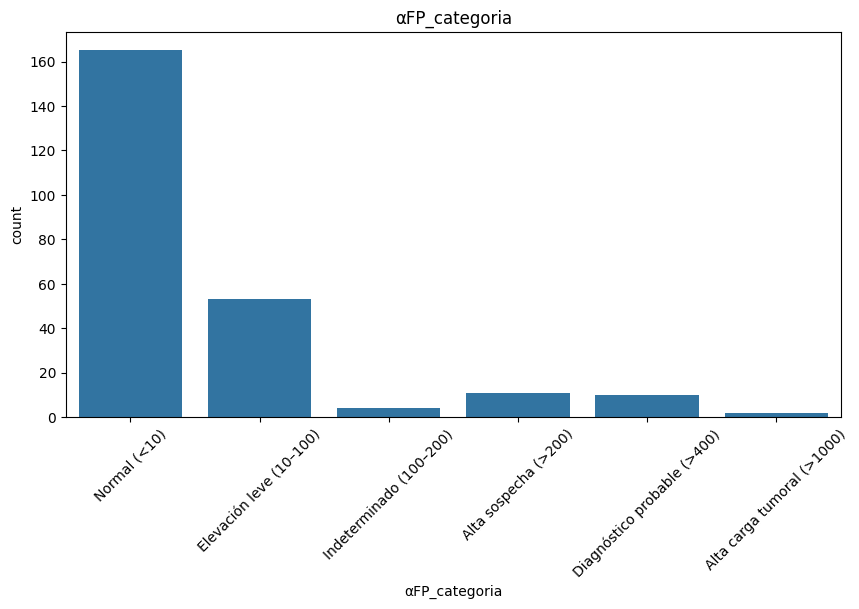

In [141]:
# tipo de reserva seg√∫n lead_time
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Œ±FP_categoria')
plt.xticks(rotation=45)
plt.title("Œ±FP_categoria")
plt.show()

En su mayoria los pacientestienen presencia de Alfa-Fetoprotenia en rangos considerados normales. Sin embargo se logran identificar pacientes con altas suspechas, diagnosticos probables y tambi√©n con alta carga tumoral

In [142]:
df["Œ±FP_Al_Dx"].describe()

count     245.000000
mean       59.458449
std       188.843439
min         0.900000
25%         3.400000
50%         6.000000
75%        15.370000
max      1924.000000
Name: Œ±FP_Al_Dx, dtype: float64

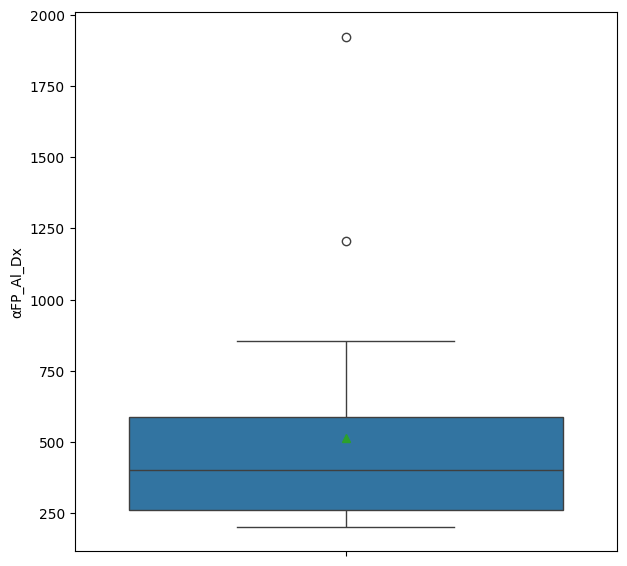

In [143]:
plt.figure(figsize=(7, 7))
sns.boxplot(
    data=df.loc[(df['Œ±FP_Al_Dx']> 200)],
    y='Œ±FP_Al_Dx',
    showmeans=True
)
plt.show()

El 75% de los pacientes tienen valores inferiores a 15.37 ng/mL, mientras que el valor m√°ximo (1924 ng/mL) representa un caso extremo con diagn√≥stico confirmado de Hepatocarcinoma (HCC).

Al tomar los pacientes dentro de los grupos relevantes, que son aquellos con valores de la proteina superiores a 200, podemos evidenciar que la media est√° al rededor de las 500 unidades, lo cual ya es indicativo de presencia de c√°ncer. Tambi√©n se evidencian los pacientes at√≠picos con un diagn√≥stico de hepatocarcinoma comprobado con valores superiores a 1000 unidades. 

## Grado Hepato carcinoma (HCC)
Clasifica el hepatocarcinoma seg√∫n el grado de diferenciaci√≥n celular del tumor, siendo un indicador histol√≥gico de agresividad. 

   1: "Bien diferenciado" <br/>
    2: "Moderadamente diferenciado", <br/>
    3: "Poco diferenciado", <br/>
    4: "Indiferenciado" 

In [144]:
df["Grado_HCC"].value_counts()

Grado_HCC
2.0    49
3.0    40
4.0     6
1.0     4
Name: count, dtype: int64

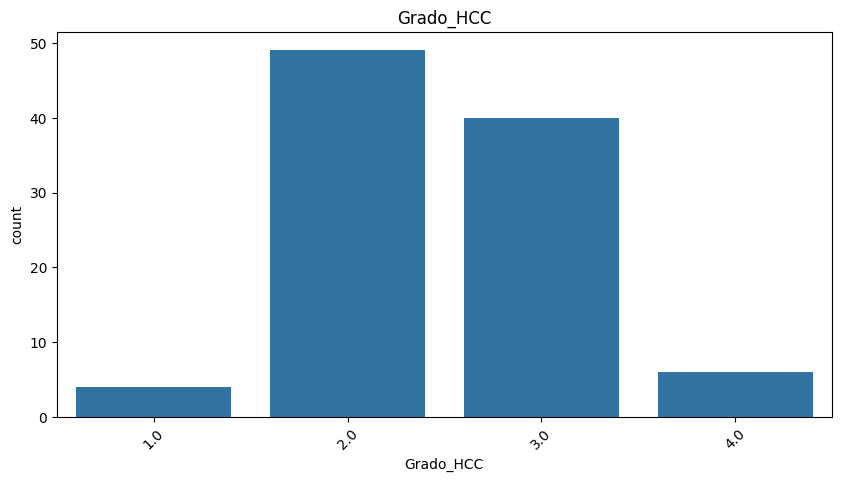

In [145]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Grado_HCC')
plt.xticks(rotation=45)
plt.title("Grado_HCC")
plt.show()

De los 99 pacientes con diagn√≥stico confirmado de hepatocarcinoma, la mayor√≠a presenta un grado 2, lo cual indica una diferenciaci√≥n celular moderada, es decir, las c√©lulas cancerosas a√∫n conservan ciertas caracter√≠sticas de las c√©lulas hep√°ticas normales.

Sin embargo, un grupo importante de pacientes (grados 3 y 4) exhibe poca o nula diferenciaci√≥n, lo que se asocia con tumores m√°s agresivos y con peor pron√≥stico cl√≠nico.

## Estadio

In [146]:
df["Estadio"].value_counts()

Estadio
ESTADIO 1    53
ESTADIO 2    37
ESTADIO 3     8
ESTADIO 4     1
Name: count, dtype: int64

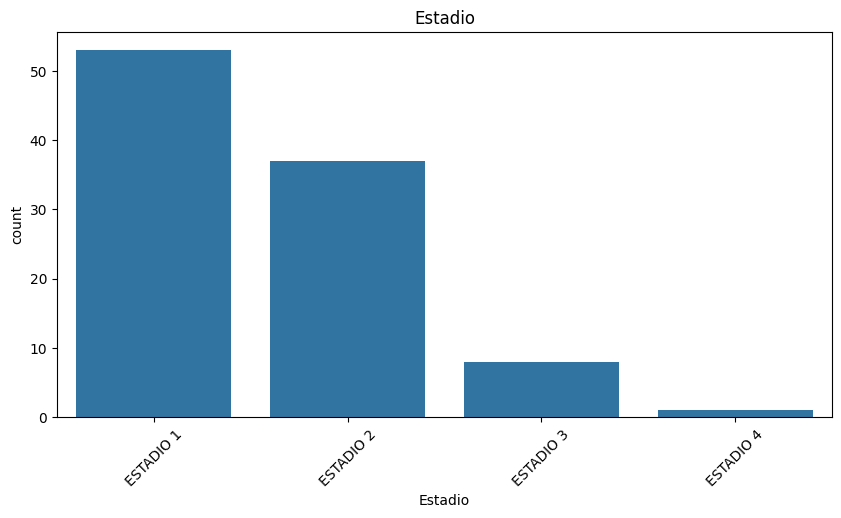

In [147]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Estadio', order=['ESTADIO 1','ESTADIO 2','ESTADIO 3','ESTADIO 4'])
plt.xticks(rotation=45)
plt.title("Estadio")
plt.show()

1: Tumor peque√±o y localizado, sin ganglios afectados ni met√°stasis. <br/>
2: Tumor un poco mas grande o con invasion m√≠nima, pero aun localizado. <br/>
3: Tumor grande o con invasi√≥n vascular, sin ganglios ni met√°stasis. <br/>
4: Tumor que invade estructuras adyacentes. <br/>

Los pacientes que el diagnostico del Estadio, en su mayoria presentan un tumor peque√±o y  localizado, lo que puede sugiere una detecci√≥n temprana. Mientras que los pacientes que presentan tumores grandes o invasivos se presentan como un grupo menor en la muestra.

## Subconjunto de variables booleanas
- Soporte_Vasopresor_PeriTx
- Levosimendan_PeriTx
- Noradrenalina_PeriTx
- Adrenalina_PeriTx
- Vasopresina_PeriTx
- Dopamina_PeriTx
- Amiodarona_PeriTx
- ¬øComplicaci√≥n?
- Rechazo_Agudo
- Rechazo_Cr√≥nico
- Infecci√≥n_POP
- Stent
- Requiri√≥_Reconstrucci√≥n_Biliar
- Profilaxis_Antitromb√≥tica
- Fast_Track

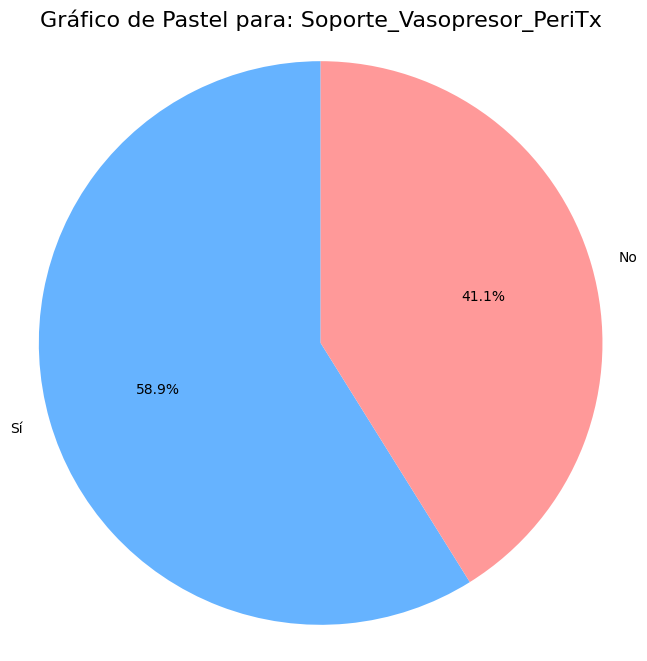

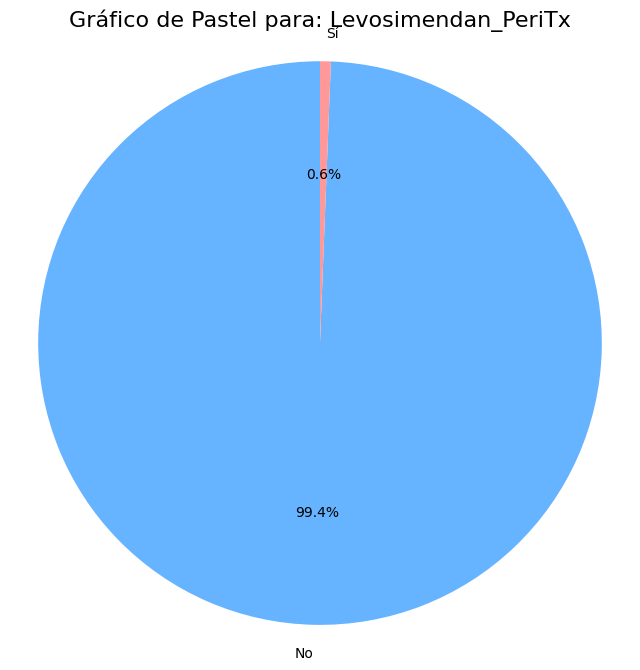

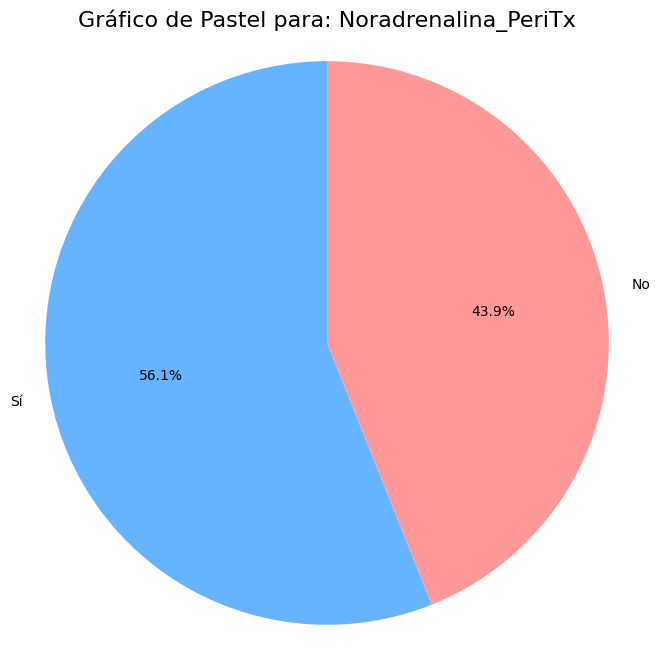

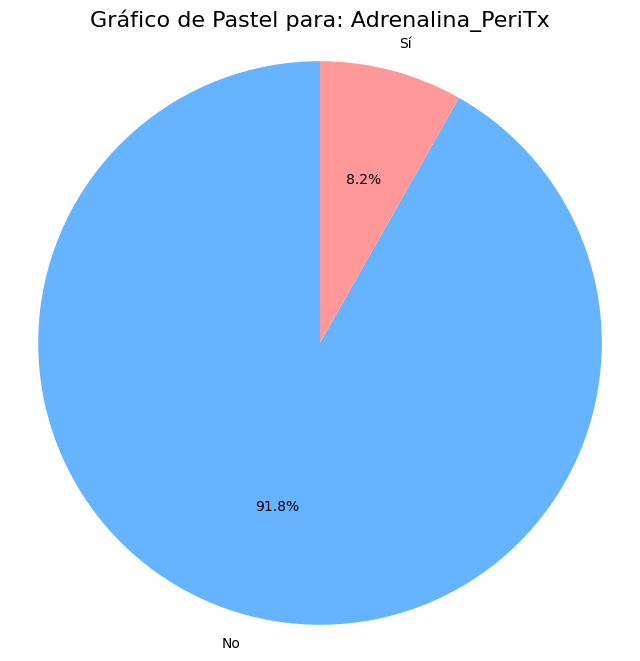

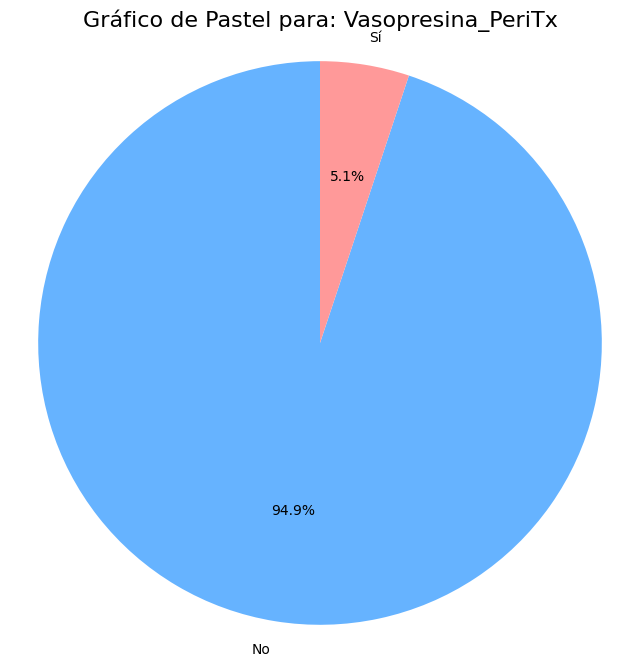

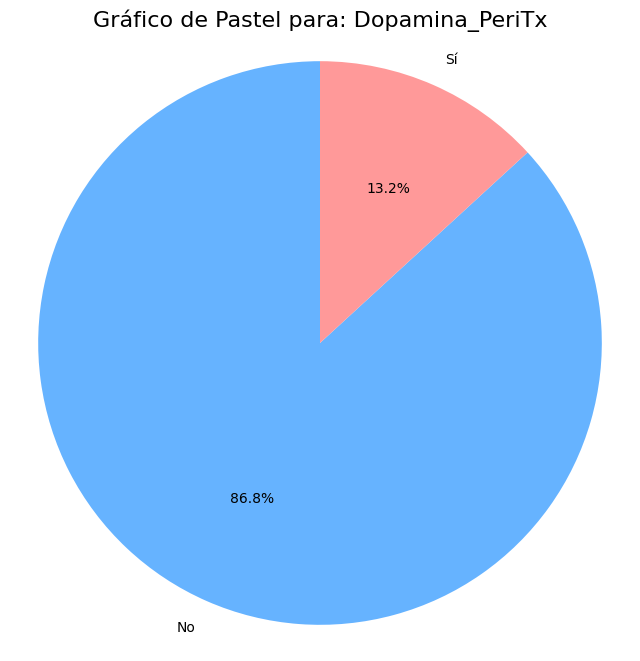

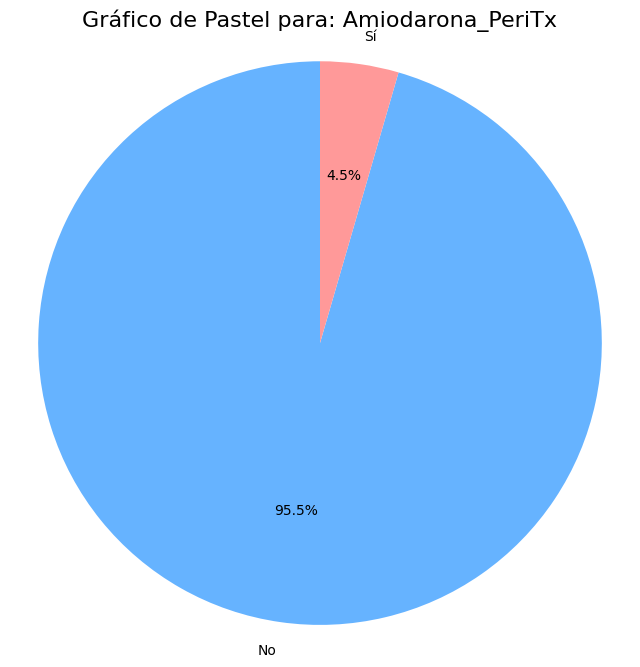

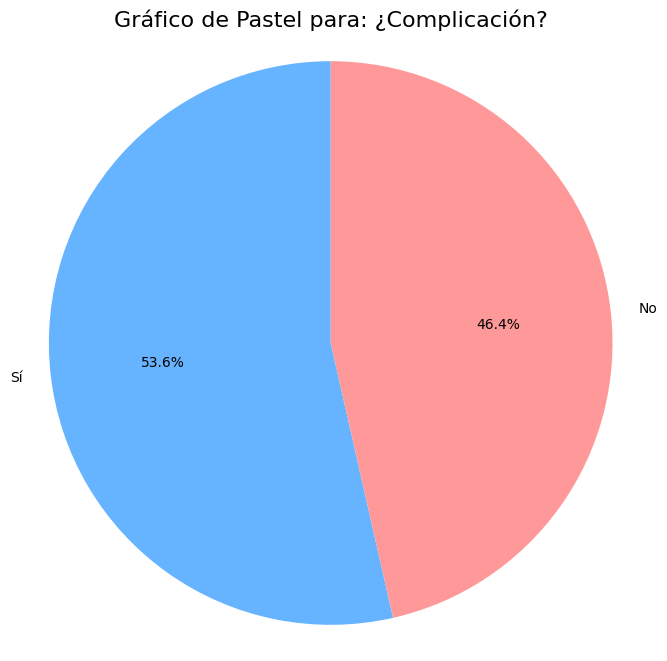

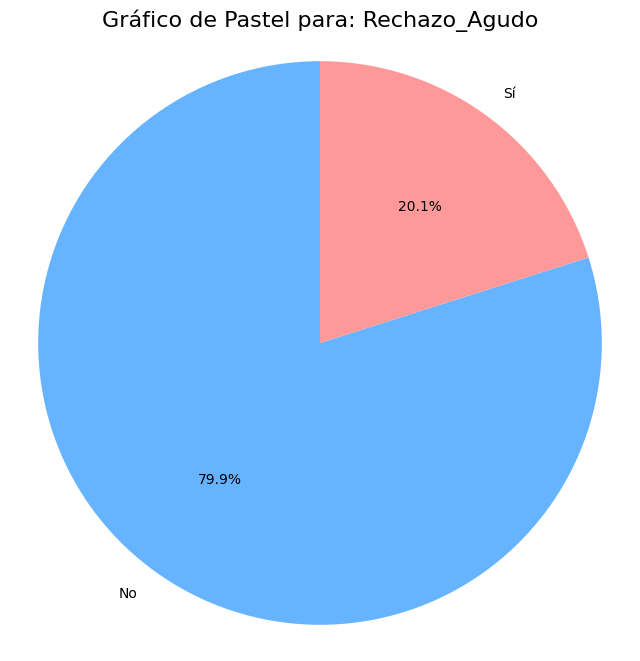

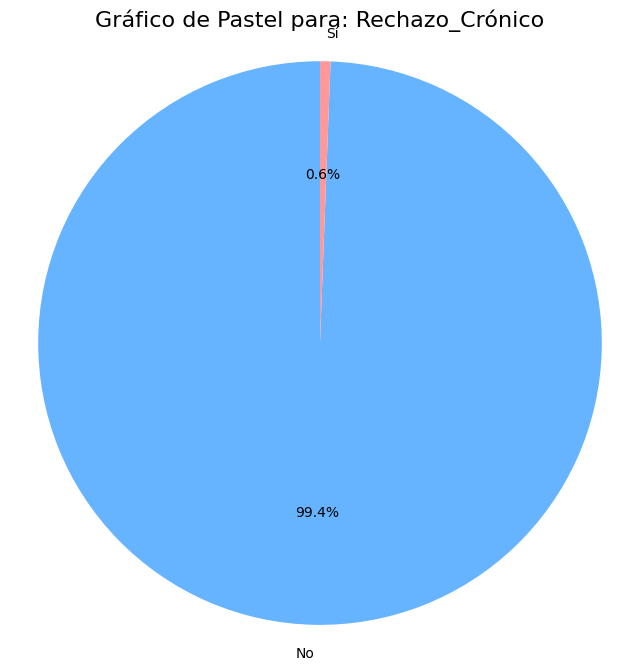

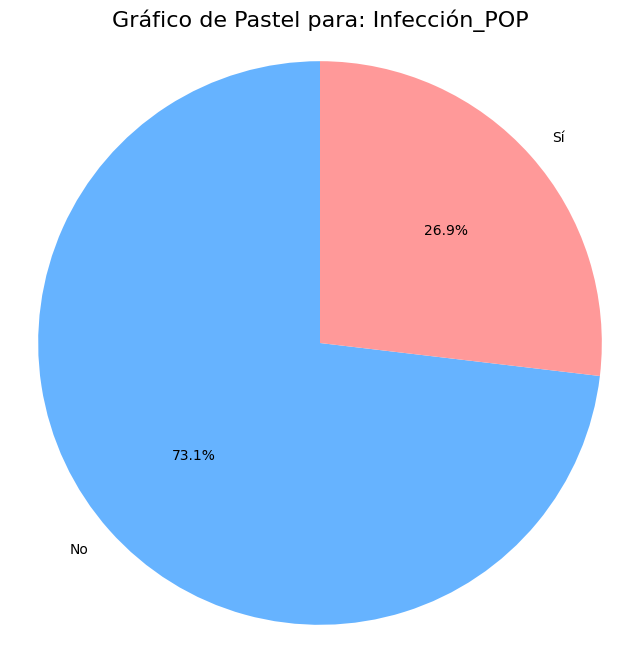

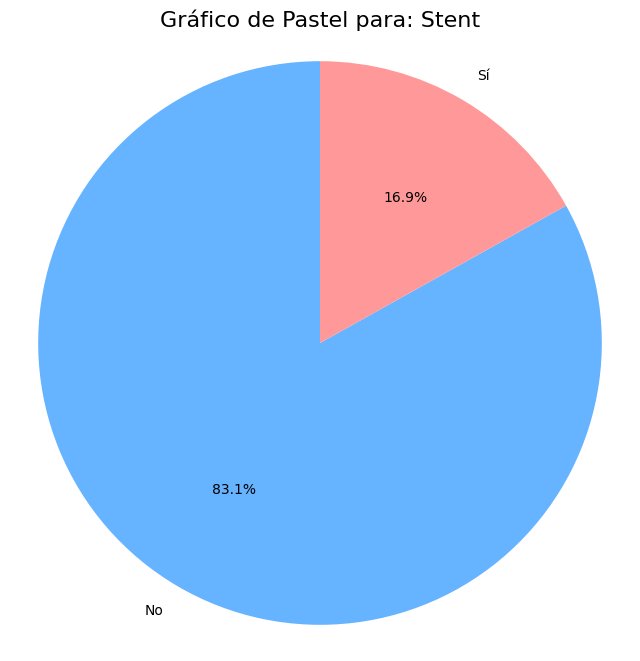

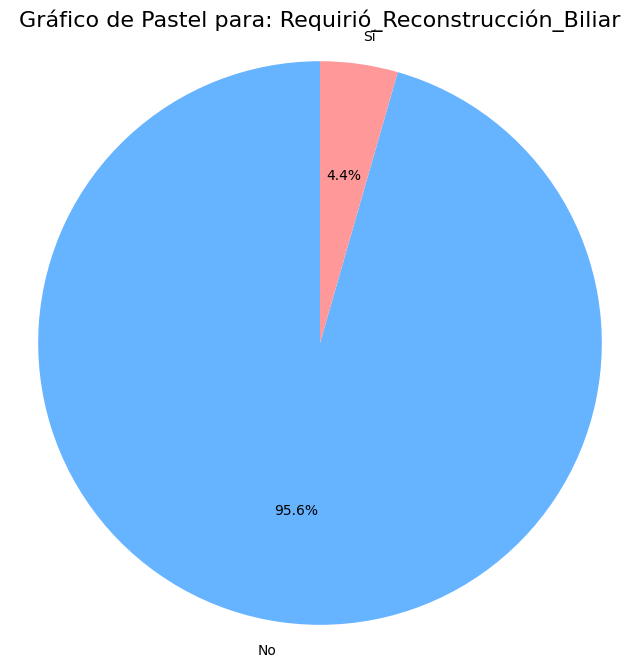

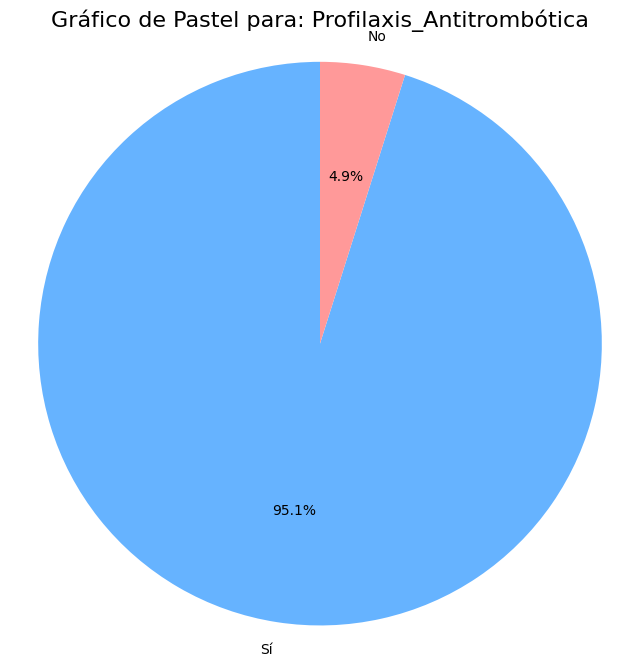

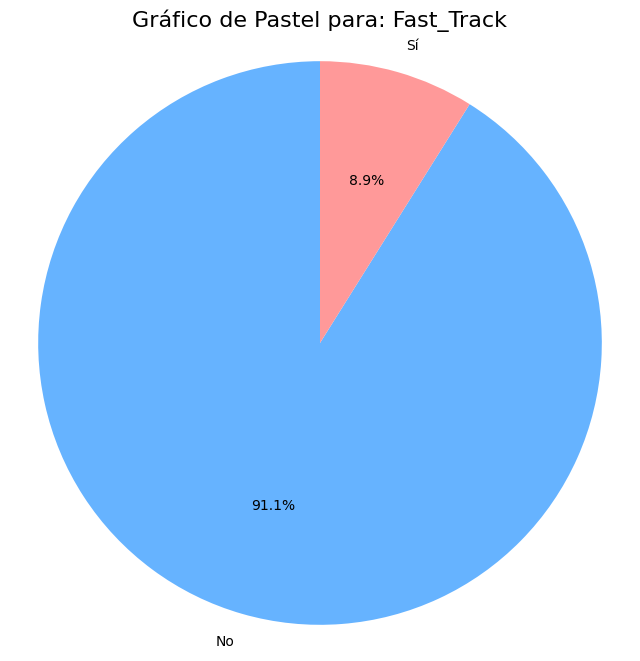

In [204]:
variables_categoricas = [
    'Soporte_Vasopresor_PeriTx', 'Levosimendan_PeriTx', 'Noradrenalina_PeriTx',
    'Adrenalina_PeriTx', 'Vasopresina_PeriTx', 'Dopamina_PeriTx',
    'Amiodarona_PeriTx', '¬øComplicaci√≥n?', 'Rechazo_Agudo', 'Rechazo_Cr√≥nico',
    'Infecci√≥n_POP', 'Stent', 'Requiri√≥_Reconstrucci√≥n_Biliar',
    'Profilaxis_Antitromb√≥tica', 'Fast_Track'
]

etiquetas_map = {0: 'No', 1: 'S√≠'}

for variable in variables_categoricas:

    conteo = df[variable].value_counts(dropna=True)

    if conteo.empty:
        print(f"La columna '{variable}' est√° vac√≠a o solo contiene valores nulos. Omitiendo gr√°fico.")
        continue

    etiquetas_grafico = [etiquetas_map.get(val, str(val)) for val in conteo.index]


    plt.figure(figsize=(8, 8))
    plt.pie(conteo,
            labels=etiquetas_grafico,
            autopct='%1.1f%%',
            startangle=90,
            colors=['#66b3ff', '#ff9999'],
            )

    plt.title(f'Gr√°fico de Pastel para: {variable}', fontsize=16)
    plt.axis('equal')
    plt.show()


En las variables graficadas se observa un desbalanceo entre las clases

## Subconjunto de variables cuantitativas
- Tiempo_CVC
- D√≠as_de_Profilaxis_Antitromb√≥tica
- D√≠as_En_UCI
- D√≠as_En_Hospitalizaci√≥n_Piso
- D√≠as_Totales_Intrahospitalarios

--- Generando Histogramas para Variables Cuantitativas ---


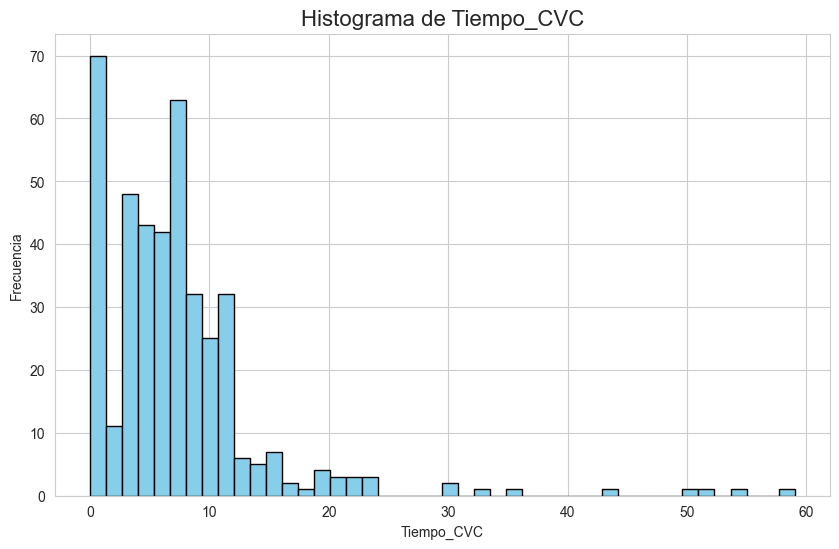

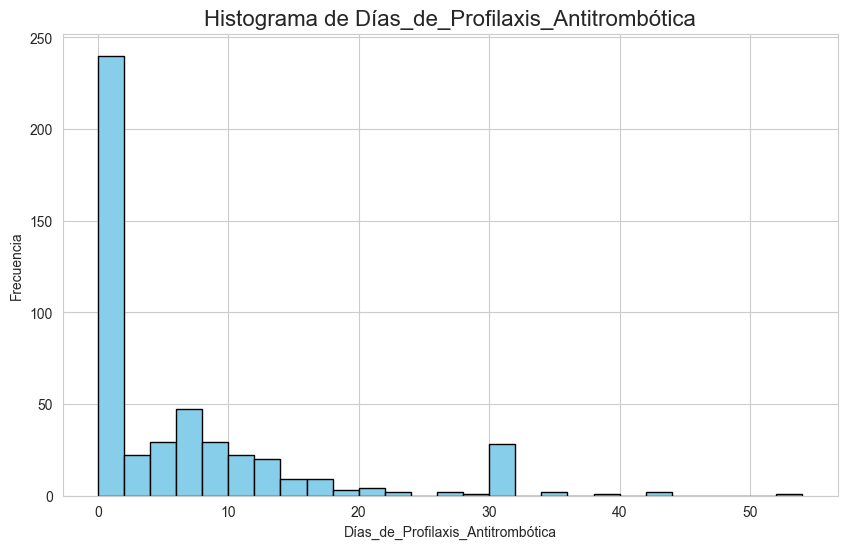

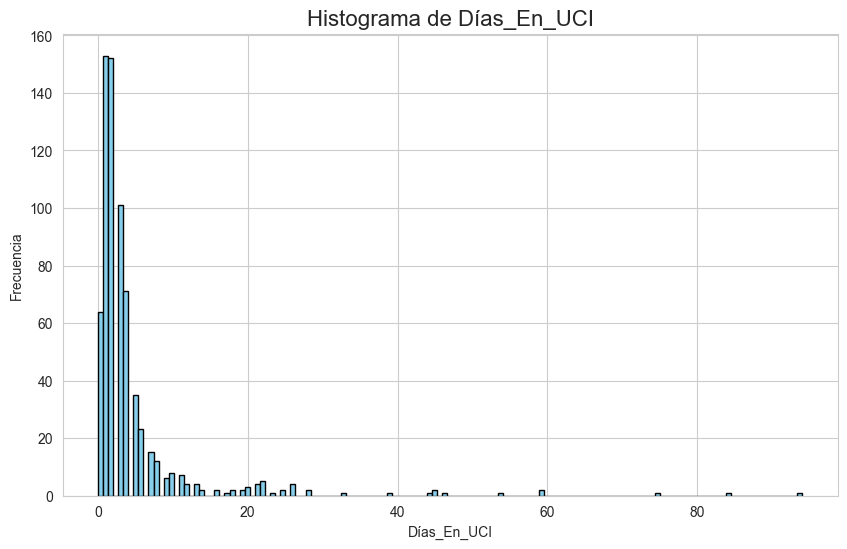

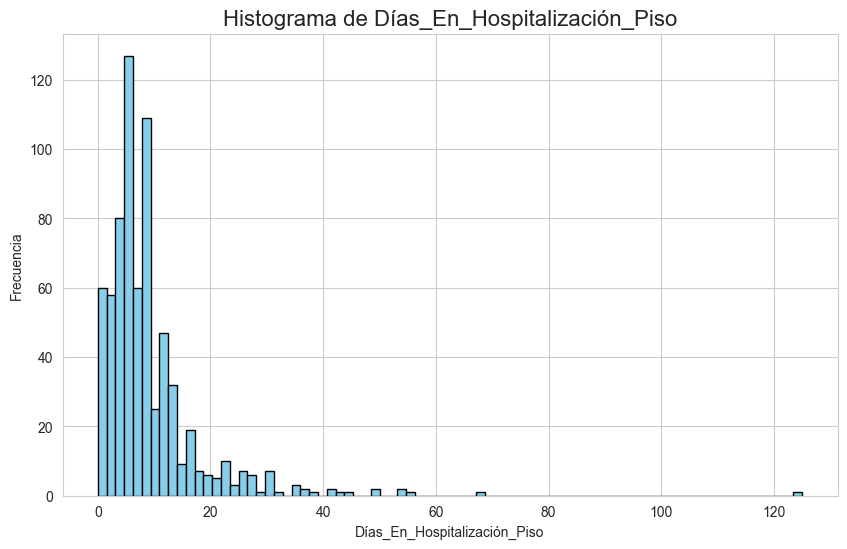

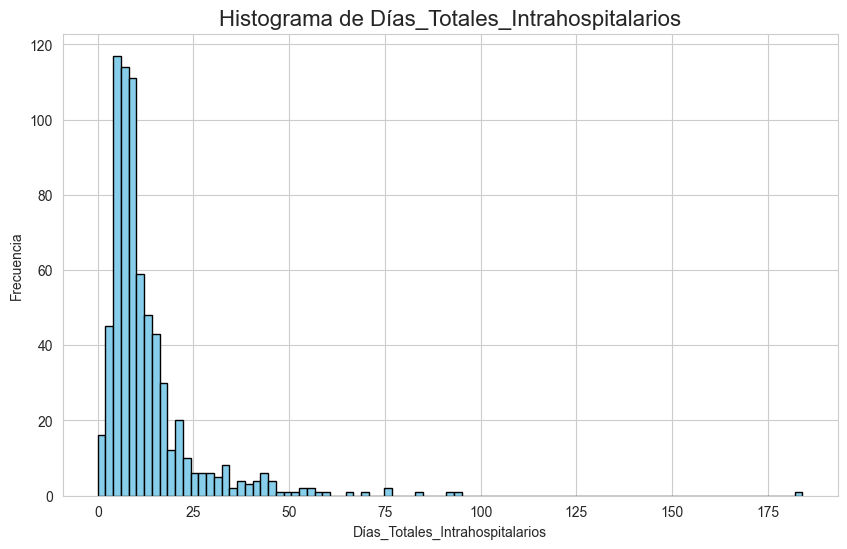

In [206]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

variables_cuantitativas = [
    'Tiempo_CVC', 'D√≠as_de_Profilaxis_Antitromb√≥tica',
    'D√≠as_En_UCI', 'D√≠as_En_Hospitalizaci√≥n_Piso', 'D√≠as_Totales_Intrahospitalarios'
]

print("--- Generando Histogramas para Variables Cuantitativas ---")
for variable in variables_cuantitativas:
    if variable not in df.columns:
        print(f"Advertencia: La columna '{variable}' no fue encontrada. Omitiendo.")
        continue

    datos = df[variable].dropna()
    if datos.empty:
        print(f"La columna '{variable}' est√° vac√≠a o solo contiene valores nulos. Omitiendo gr√°fico.")
        continue

    plt.figure()
    plt.hist(datos, bins='auto', color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {variable}', fontsize=16)
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.show()


* En la variable "Tiempo_CVC", que corresponde a los "D√≠as con cat√©ter central", se observ√≥ una mayor cantidad de casos alrededor de los 5 d√≠as.
* En la variable "D√≠as de Profilaxis Antitromb√≥tica", se observa que la mayor cantidad de casos corresponde a pacientes que la usaron durante aproximadamente un d√≠a.
* En la variable "D√≠as en UCI", se observa una mayor cantidad de casos entre los d√≠as 1 y 10, aproximadamente.
* En la variable "D√≠as en Hospitalizaci√≥n de Piso", se observa una tendencia alta entre los d√≠as 1 y 16, aproximadamente.
* En la variable "D√≠as Totales Intrahospitalarios", se observa un pico entre los 9 y 11 d√≠as, aproximadamente.

## Subconjunto de variables ordinales
- tipo_De_Complicaci√≥n_1
- Severidad_Rechazo_Agudo
- Tipo_Infecci√≥n_1
- Germen_1
- #_De_Complicaciones


--- Generando Gr√°ficos de Barras para Variables Codificadas ---


C:\Users\jmriv\AppData\Local\Temp\ipykernel_5776\265677471.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=etiquetas_descriptivas, y=conteo.values, palette='viridis')


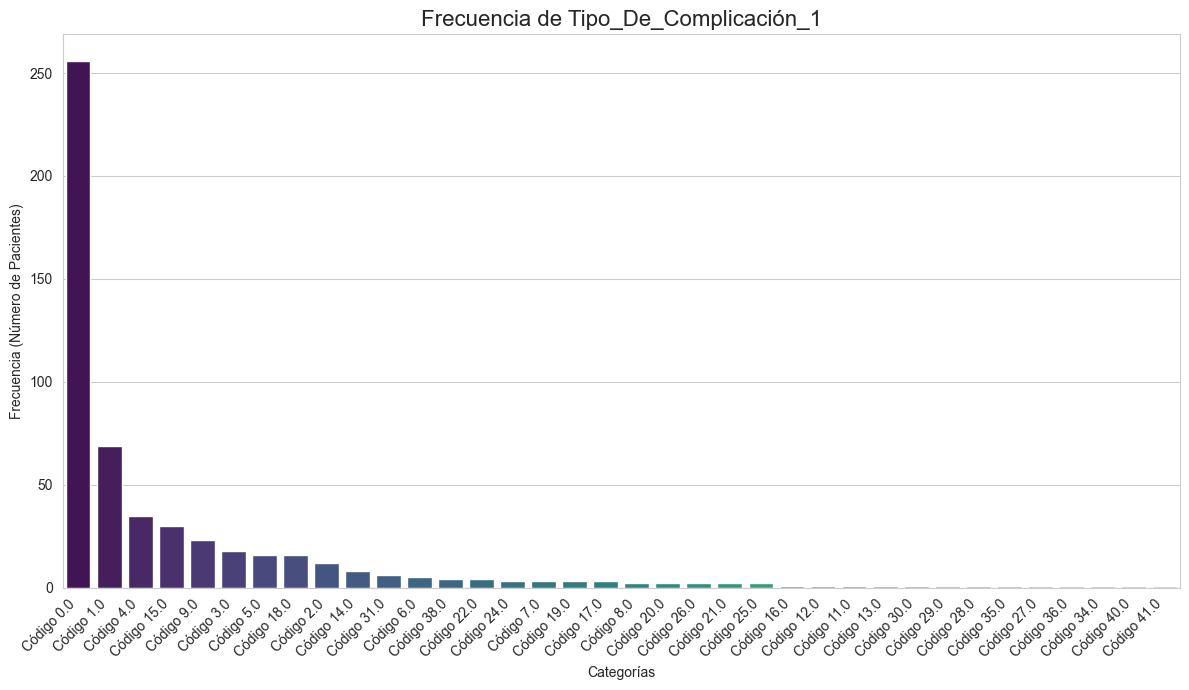

C:\Users\jmriv\AppData\Local\Temp\ipykernel_5776\265677471.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=etiquetas_descriptivas, y=conteo.values, palette='viridis')


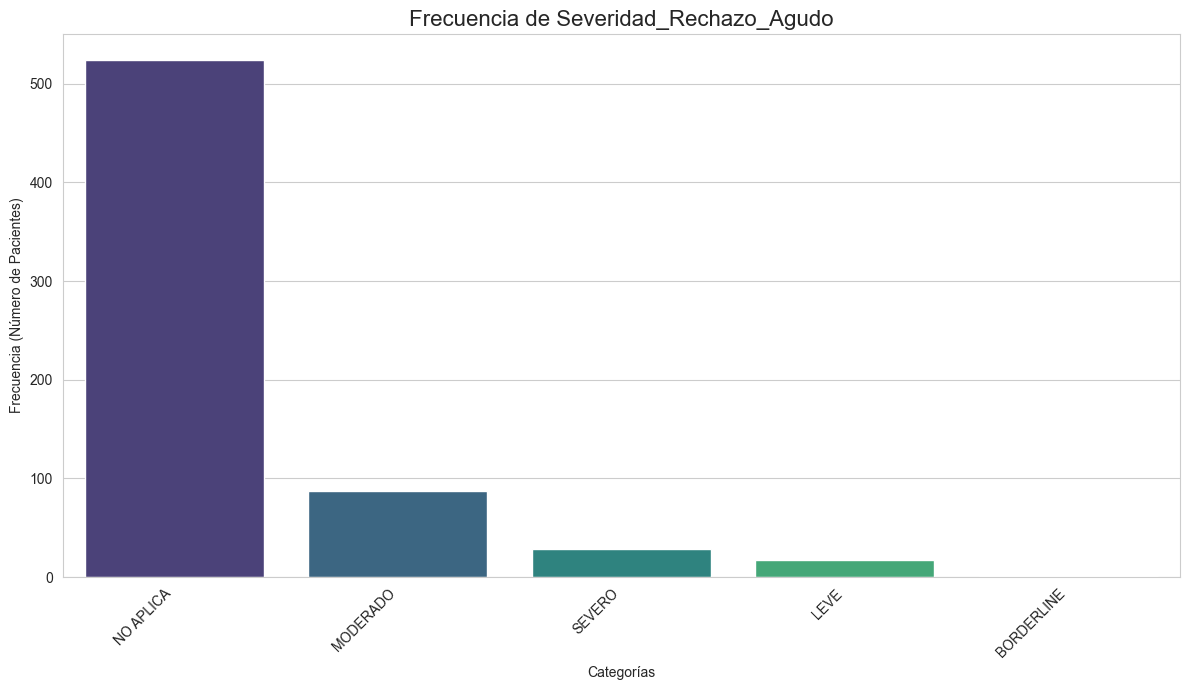

C:\Users\jmriv\AppData\Local\Temp\ipykernel_5776\265677471.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=etiquetas_descriptivas, y=conteo.values, palette='viridis')


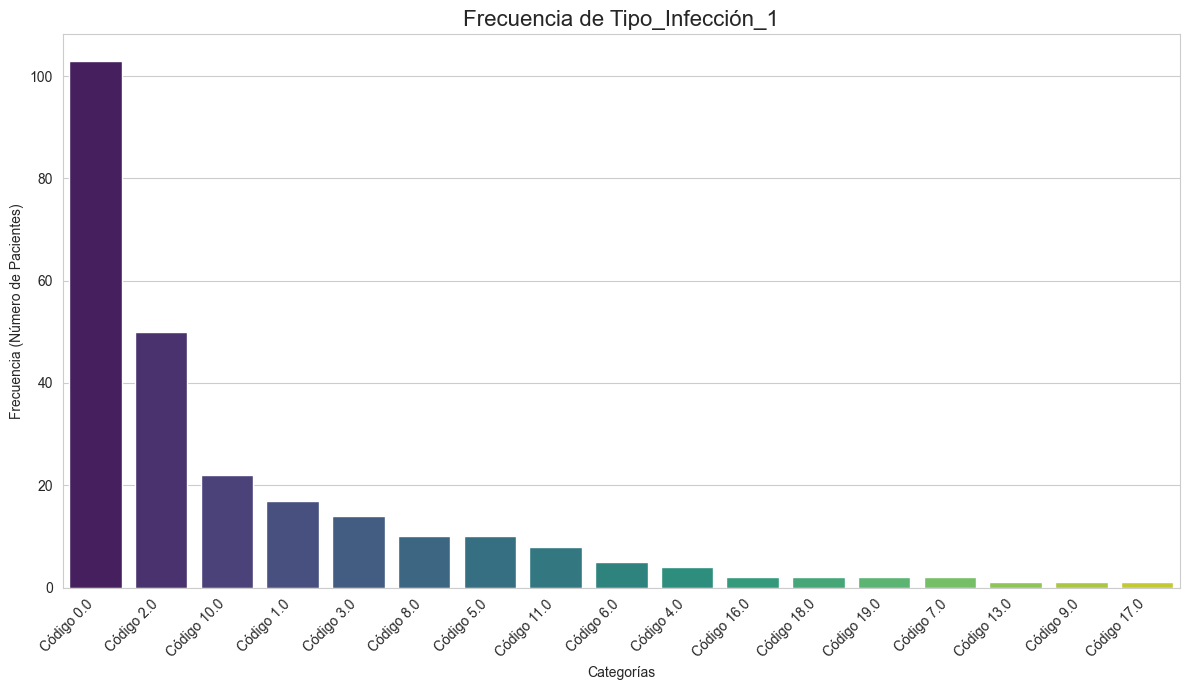

C:\Users\jmriv\AppData\Local\Temp\ipykernel_5776\265677471.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=etiquetas_descriptivas, y=conteo.values, palette='viridis')


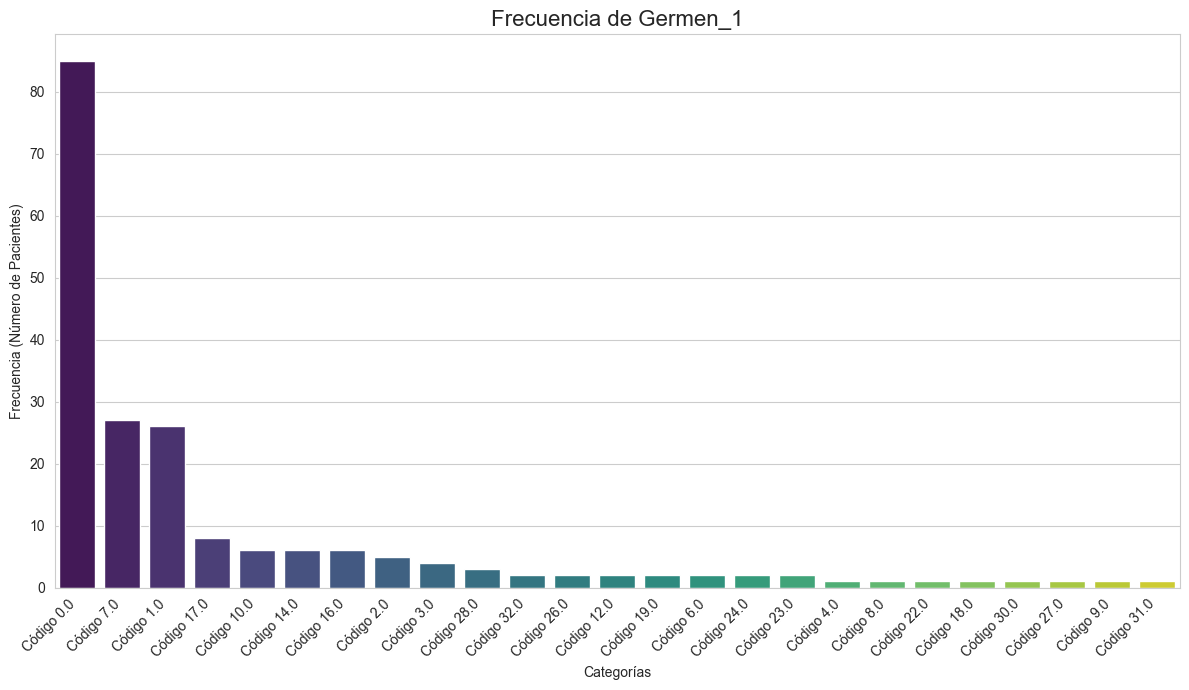

C:\Users\jmriv\AppData\Local\Temp\ipykernel_5776\265677471.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=etiquetas_descriptivas, y=conteo.values, palette='viridis')


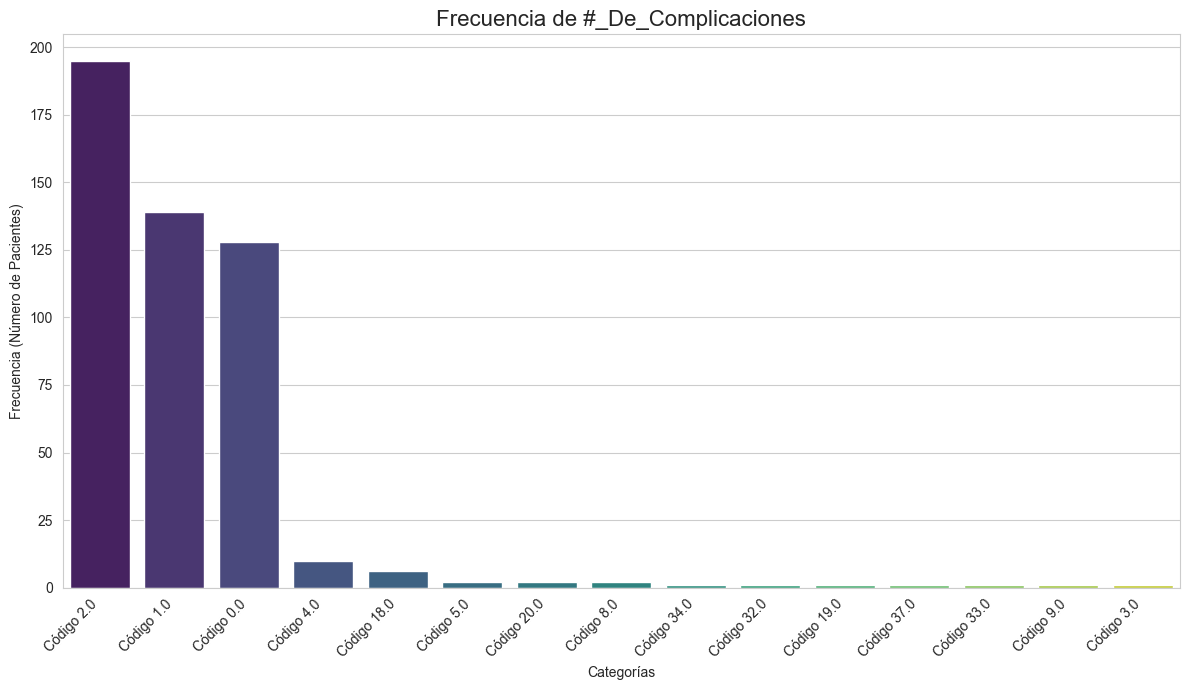

In [207]:
variables_ordinales = [
    'Tipo_De_Complicaci√≥n_1', 'Severidad_Rechazo_Agudo', 'Tipo_Infecci√≥n_1', 'Germen_1', '#_De_Complicaciones'
]

mapeo_etiquetas = {
    'Severidad_Rechazo_Agudo': {
        0: 'NO APLICA',
        1: 'LEVE',
        2: 'MODERADO',
        3: 'SEVERO',
        4: 'BORDERLINE'
    },
    'Tipo_De_Complicaci√≥n_1': {

    },
    'Tipo_Infecci√≥n_1': {

    },
    'Germen_1': {

    },
    '#_De_Complicaciones': {

    }
}

print("\n--- Generando Gr√°ficos de Barras para Variables Codificadas ---")
for variable in variables_ordinales:
    if variable not in df.columns:
        print(f"Advertencia: La columna '{variable}' no fue encontrada. Omitiendo.")
        continue

    conteo = df[variable].value_counts(dropna=True)
    if conteo.empty:
        print(f"La columna '{variable}' est√° vac√≠a o solo contiene valores nulos. Omitiendo gr√°fico.")
        continue

    mapa_actual = mapeo_etiquetas.get(variable, {})


    etiquetas_descriptivas = [mapa_actual.get(val, f'C√≥digo {val}') for val in conteo.index]

    plt.figure(figsize=(12, 7))
    sns.barplot(x=etiquetas_descriptivas, y=conteo.values, palette='viridis')
    plt.title(f'Frecuencia de {variable}', fontsize=16)
    plt.xlabel('Categor√≠as')
    plt.ylabel('Frecuencia (N√∫mero de Pacientes)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


En el caso de la variable "#_De_Complicaciones", se observ√≥ que la categor√≠a con la mayor cantidad de casos es la de 2 complicaciones.

## Subconjunto de variables de fechas
- Fecha_Egreso_UCI
- Fecha_Egreso_Hospitalario


--- Generando Histogramas para Variables de Fecha ---


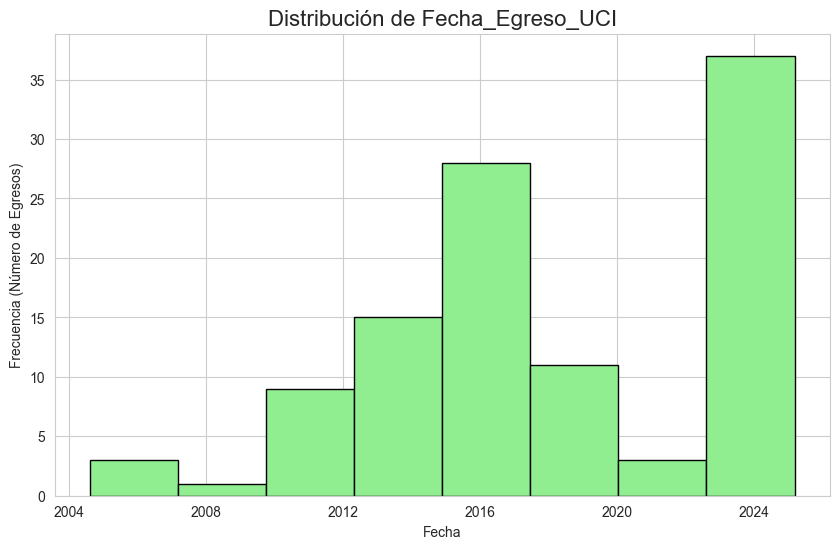

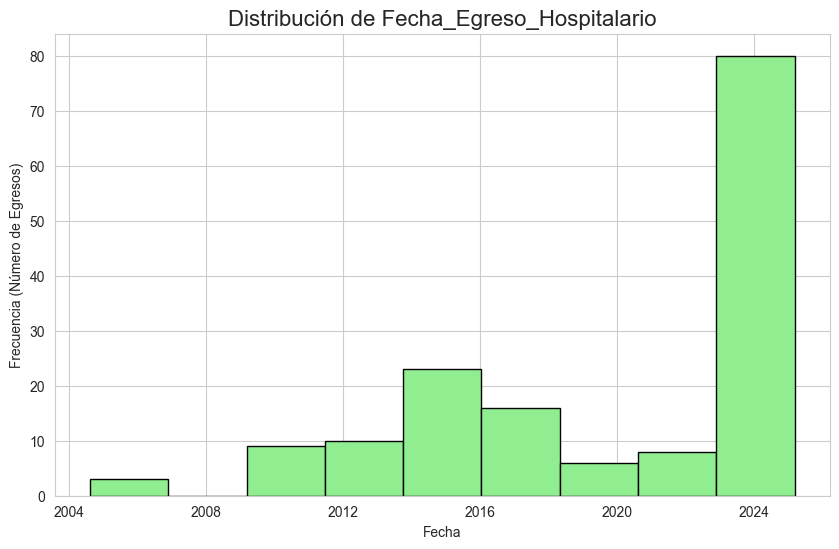

In [209]:
variables_fechas = [
    'Fecha_Egreso_UCI', 'Fecha_Egreso_Hospitalario'
]

print("\n--- Generando Histogramas para Variables de Fecha ---")
for variable in variables_fechas:
    if variable not in df.columns:
        print(f"Advertencia: La columna '{variable}' no fue encontrada. Omitiendo.")
        continue

    fechas_dt = pd.to_datetime(df[variable], errors='coerce').dropna()
    if fechas_dt.empty:
        print(f"No se pudieron convertir fechas v√°lidas en la columna '{variable}'. Omitiendo gr√°fico.")
        continue

    plt.figure()
    plt.hist(fechas_dt, bins='auto', color='lightgreen', edgecolor='black')
    plt.title(f'Distribuci√≥n de {variable}', fontsize=16)
    plt.xlabel('Fecha')
    plt.ylabel('Frecuencia (N√∫mero de Egresos)')
    plt.show()

*   En el caso de las fechas de egresos de UCI, se observa una alta tasa en 2020 y 2025.
*   Se puede observar que hubo un aumento en los egresos hospitalarios desde 2020 hasta 2025.

# An√°lisis bivariado

## Trombosis porta tumoral vs Complicaci√≥n

In [148]:
pd.crosstab(df['Trombosis_Porta_Tumoral'], df['¬øComplicaci√≥n?'], normalize='index')

¬øComplicaci√≥n?                0.0       1.0
Trombosis_Porta_Tumoral                    
0.0                      0.484043  0.515957
1.0                      0.612903  0.387097

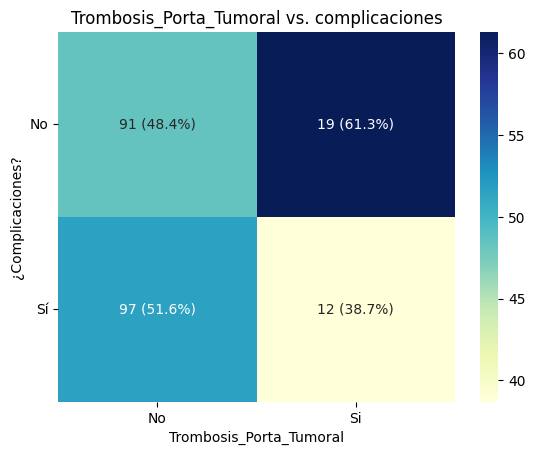

In [149]:
contingencia_vs_complicacion('Trombosis_Porta_Tumoral', 'Trombosis_Porta_Tumoral', ['No', 'Si'])

Teniendo en cuenta que solo 31 pacientes presentan esta condici√≥n de tener un coagulo en la vena porta, se puede evidenciar que aparentemente esta condici√≥n no implica necesariamente una complicaci√≥n dado que el 41% de los pacientes que presentaron este diagnostico, no presentaron complicaciones.

H‚ÇÄ (nula): No existe relaci√≥n entre la presencia de trombosis portal tumoral y la ocurrencia de complicaciones postrasplante. <br/>

H‚ÇÅ (alternativa): Existe relaci√≥n entre ambas variables.

In [150]:
from scipy.stats import chi2_contingency

tabla = pd.crosstab(df['Trombosis_Porta_Tumoral'], df['¬øComplicaci√≥n?'])
chi2, p, dof, expected = chi2_contingency(tabla)
print(f"Chi2: {chi2:.3f}, p-valor: {p:.3f}")

Chi2: 1.290, p-valor: 0.256


Dado que el p valor es mayor que 0,05 se rechaza la hipotesis nula, mostrando asi que no hay evidencia estadisticamente significativa de la asociaci√≥n entre complicaciones y trombosis en la vena portal. 

<span style="color:red"> Aunque cl√≠nicamente la trombosis portal tumoral podr√≠a asociarse con un mayor riesgo de complicaciones por la afectaci√≥n vascular, los resultados descriptivos no muestran diferencias contundentes entre los grupos.<span/>

## Tuvo_Inmunosupresi√≥n_con_Anticuerpos vs Complicacion

In [151]:
ct=pd.crosstab(df['Inmunosupresi√≥n_con_Anticuerpos'], df['¬øComplicaci√≥n?'], normalize='index')
print(ct)

¬øComplicaci√≥n?                        0.0       1.0
Inmunosupresi√≥n_con_Anticuerpos                    
NO                               0.359281  0.640719
SI                               0.464286  0.535714


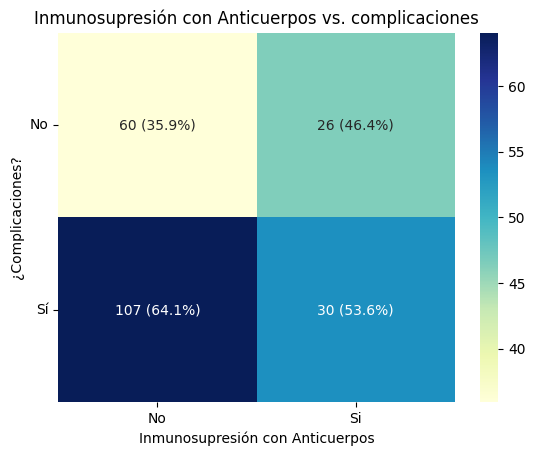

In [152]:
contingencia_vs_complicacion('Inmunosupresi√≥n_con_Anticuerpos', 'Inmunosupresi√≥n con Anticuerpos', ['No', 'Si'])

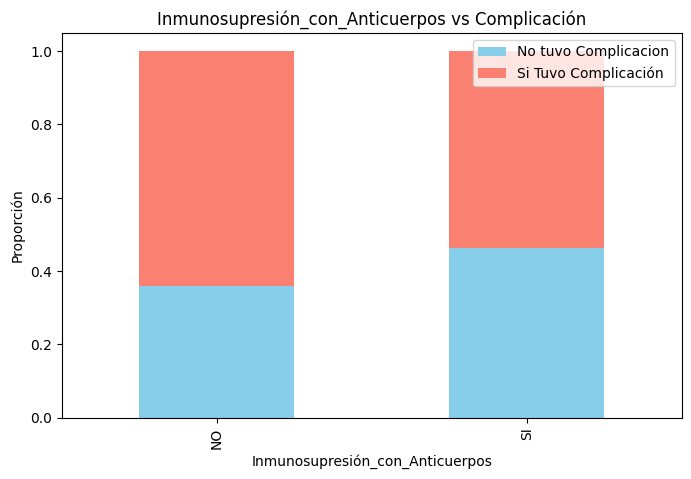

In [153]:
ct.plot(kind='bar', stacked=True, figsize=(8,5), color=['skyblue', 'salmon'])
plt.ylabel("Proporci√≥n")
plt.xlabel("Inmunosupresi√≥n_con_Anticuerpos")
plt.legend(["No tuvo Complicacion", "Si Tuvo Complicaci√≥n"], loc="upper right")
plt.title("Inmunosupresi√≥n_con_Anticuerpos vs Complicaci√≥n")
plt.show()

El 53.57% de los pacientes que recibieron inmunosupresi√≥n con anticuerpos presentaron alguna complicaci√≥n postrasplante.

En contraste, el 64% de los pacientes sin tratamiento inmunosupresor presentaron complicaciones.

Si bien la proporci√≥n es mayor en los no tratados, la diferencia no parece marcadamente amplia, lo cual sugiere que las complicaciones podr√≠an no depender exclusivamente del uso del tratamiento inmunosupresor, sino del estado cl√≠nico previo y del motivo de su administraci√≥n (prevenci√≥n vs. respuesta a rechazo).

H‚ÇÄ (nula): No existe asociaci√≥n entre el uso de inmunosupresores con anticuerpos y las complicaciones postrasplante.

H‚ÇÅ (alternativa): Existe asociaci√≥n entre ambas variables.

In [154]:
tabla = pd.crosstab(df['Inmunosupresi√≥n_con_Anticuerpos'], df['¬øComplicaci√≥n?'])
chi2, p, dof, expected = chi2_contingency(tabla)
print(f"Chi2: {chi2:.3f}, p-valor: {p:.3f}")

Chi2: 1.534, p-valor: 0.216


Dado que el p valor es mayor a 0,05 no se rechaza la hipotesis nula, lo que concluye que no hay evidencia estad√≠sticamente significativa de la asociacion entre el tratamiento con inmunosupresores y la presencia de complicaciones.

## Œ±-Fetoprote√≠na al momento del diagn√≥stico vs Complicaci√≥n

Para explorar la relaci√≥n entre los niveles de AFP y la presencia de complicaciones, se analizaron los pacientes con valores superiores a 200 ng/mL, considerados cl√≠nicamente relevantes como indicativos de tumor activo.

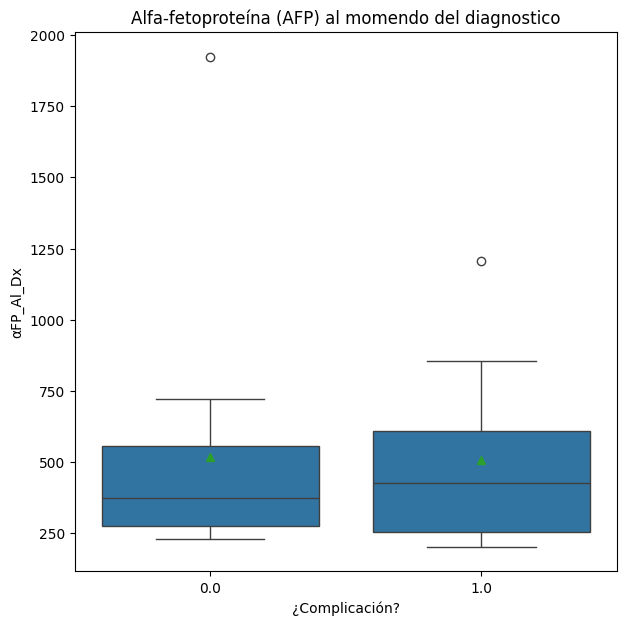

In [179]:
plt.figure(figsize=(7, 7))
sns.boxplot(
    x='¬øComplicaci√≥n?',
    y='Œ±FP_Al_Dx',
    data=df.loc[df['Œ±FP_Al_Dx'] >200],  #
    showmeans=True
)
plt.title("Alfa-fetoprote√≠na (AFP) al momendo del diagnostico")
plt.xlabel("¬øComplicaci√≥n?")
plt.ylabel("Œ±FP_Al_Dx")
plt.show()

El boxplot comparativo muestra que las medias de AFP en los grupos con y sin complicaciones son similares, y que el valor m√°s extremo de AFP se presenta, incluso, en pacientes que no desarrollaron complicaciones postrasplante.

Esto sugiere que, aunque niveles altos de AFP reflejan una mayor carga tumoral o un estadio m√°s avanzado del carcinoma hepatocelular, no se evidencia una asociaci√≥n directa con la aparici√≥n de complicaciones en el contexto postrasplante.

H‚ÇÄ: No existe diferencia significativa en los valores de AFP entre pacientes con y sin complicaciones.

H‚ÇÅ: Existe una diferencia significativa en los valores de AFP entre ambos grupos.

In [185]:
df[df['Œ±FP_Al_Dx'] >200]['Œ±FP_Al_Dx'].describe()

count      23.000000
mean      512.803913
std       391.244531
min       202.000000
25%       260.460000
50%       401.970000
75%       588.490000
max      1924.000000
Name: Œ±FP_Al_Dx, dtype: float64

In [180]:
import scipy.stats as stats

# Filtrar los grupos seg√∫n si tuvieron o no complicaciones
grupo_sin_comp = df[df["¬øComplicaci√≥n?"] == 0]["Œ±FP_Al_Dx"].dropna()
grupo_con_comp = df[df["¬øComplicaci√≥n?"] == 1]["Œ±FP_Al_Dx"].dropna()

# Aplicar prueba de Mann-Whitney U (no param√©trica)
stat, p_value = stats.mannwhitneyu(grupo_sin_comp, grupo_con_comp, alternative='two-sided')

print("üìä Resultado prueba Mann-Whitney U")
print(f"Estad√≠stico U: {stat:.2f}")
print(f"Valor p: {p_value:.4f}")

üìä Resultado prueba Mann-Whitney U
Estad√≠stico U: 7856.00
Valor p: 0.5179


Dado que el p valor es superior a 0,05 podemos concluir que no hay evidencia suficiente para afirmar que los valores de Œ±FP difieran entre los grupos con y sin complicaciones. No hay diferencia significativa entre los valores de Œ±FP para pacientes con complicaciones vs sin complicaciones

## Grado Hepatocarcinoma vs Complicaciones

In [186]:
pd.crosstab(df["Grado_HCC"], df["¬øComplicaci√≥n?"], normalize='index') 

¬øComplicaci√≥n?       0.0       1.0
Grado_HCC                         
1.0             0.500000  0.500000
2.0             0.510204  0.489796
3.0             0.350000  0.650000
4.0             0.666667  0.333333

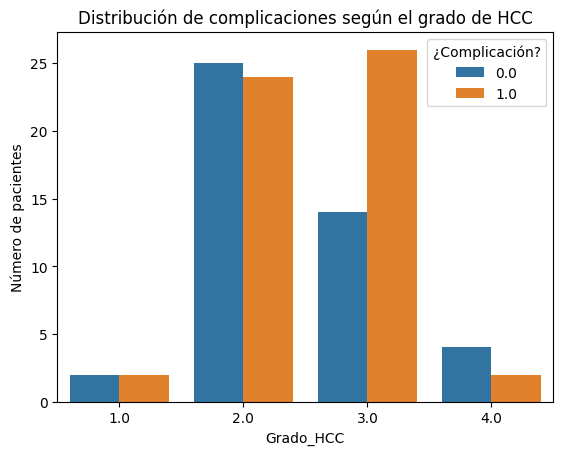

In [188]:
sns.countplot(data=df, x="Grado_HCC", hue="¬øComplicaci√≥n?")
plt.title("Distribuci√≥n de complicaciones seg√∫n el grado de HCC")
plt.ylabel("N√∫mero de pacientes")
plt.show()

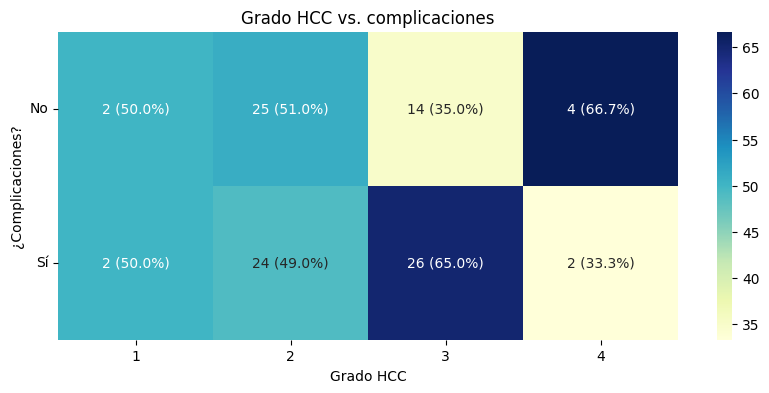

In [189]:
contingencia_vs_complicacion('Grado_HCC', 'Grado HCC', [1,2,3,4], (10,4))

<span style="color:red"> Se observa una tendencia ascendente: los pacientes con grado 3 presentan una mayor proporci√≥n de complicaciones postrasplante.<span/>

En el grado I, el 50 % de los pacientes tuvo complicaciones, mientras que en el grado III la proporci√≥n asciende al 65 % y en el grado IV al 66.7 %.

Este comportamiento sugiere que la severidad histol√≥gica del tumor podr√≠a estar asociada con un mayor riesgo de eventos adversos tras el trasplante.

H‚ÇÄ (nula): No existe relaci√≥n entre el grado histol√≥gico del hepatocarcinoma y la presencia de complicaciones postrasplante.

H‚ÇÅ (alternativa): Existe una relaci√≥n entre el grado histol√≥gico del hepatocarcinoma y la presencia de complicaciones postrasplante.

In [190]:
# Prueba de Chi-cuadrado
tabla = pd.crosstab(df["Grado_HCC"], df["¬øComplicaci√≥n?"])
chi2, p_value, dof, expected = stats.chi2_contingency(tabla)

print(f"\nChi-cuadrado: {chi2:.3f}")
print(f"p-valor: {p_value:.4f}")


Chi-cuadrado: 3.498
p-valor: 0.3210


A pesar de que se identific√≥ una tendencia ascendente en donde a medida que aumenta el Grado_HCC se incrementa la proporci√≥n  de pacientes con complicacion, la prueba de hipotesis arroja un p value superior a 0,05, por lo cual no se tiene evidencia suficiente para afirmar una relaci√≥n estadisticamente significativa.

## Estadio vs Complicaciones

In [192]:
pd.crosstab(df["Estadio"], df["¬øComplicaci√≥n?"], normalize='index') 

¬øComplicaci√≥n?       0.0       1.0
Estadio                           
ESTADIO 1       0.547170  0.452830
ESTADIO 2       0.324324  0.675676
ESTADIO 3       0.500000  0.500000
ESTADIO 4       1.000000  0.000000

In [194]:
df["Estadio"].unique()

array([nan, 'ESTADIO 2', 'ESTADIO 3', 'ESTADIO 1', 'ESTADIO 4'],
      dtype=object)

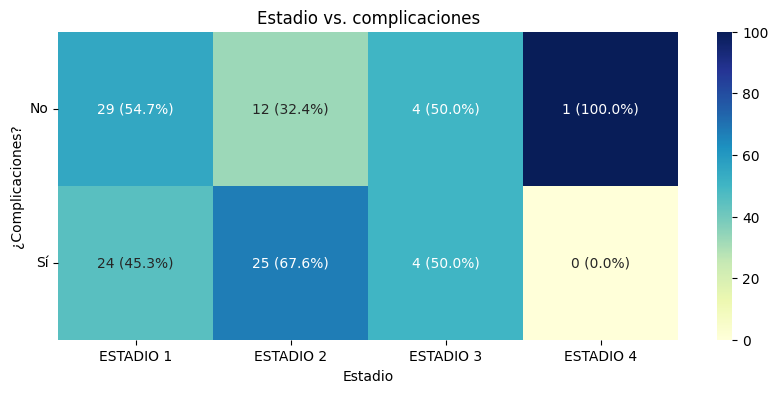

In [195]:
contingencia_vs_complicacion('Estadio', 'Estadio', ['ESTADIO 1', 'ESTADIO 2', 'ESTADIO 3', 'ESTADIO 4'], (10,4))

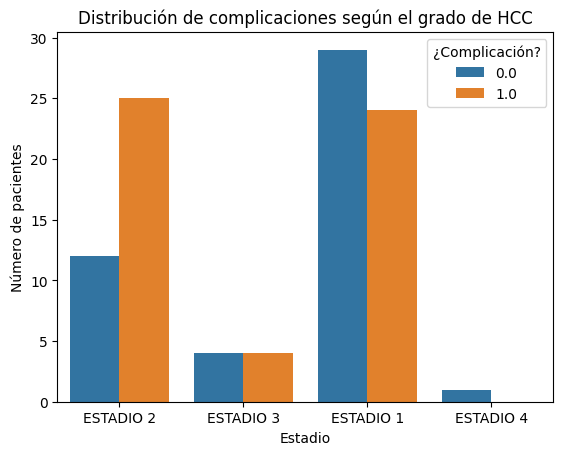

In [197]:
sns.countplot(data=df, x="Estadio", hue="¬øComplicaci√≥n?")
plt.title("Distribuci√≥n de complicaciones seg√∫n el grado de HCC")
plt.ylabel("N√∫mero de pacientes")
plt.show()

Se puede evidenciar que a medida que el tumor es mas invasivo, se presentan mas complicaciones en el paciente dado que 

En el estadio 1, poco m√°s de la mitad presenta complicaciones (56.6%). <br/>
En el estadio 2, las complicaciones suben a 70%. <br/>
En el estadio 3, casi el 90% presenta complicaciones. <br/>
En el estadio 4, todos los pacientes tuvieron complicaciones. <br/>


H‚ÇÄ (nula): No existe asociaci√≥n entre el estadio del hepatocarcinoma y la presencia de complicaciones postrasplante.

H‚ÇÅ (alternativa): Existe una asociaci√≥n entre el estadio del hepatocarcinoma y la presencia de complicaciones postrasplante

In [201]:
# Prueba Chi-cuadrado
tabla = pd.crosstab(df["Estadio"], df["¬øComplicaci√≥n?"])
chi2, p_value, dof, expected = stats.chi2_contingency(tabla)

print(f"\nChi-cuadrado: {chi2:.3f}")
print(f"p-valor: {p_value:.4f}")


Chi-cuadrado: 5.572
p-valor: 0.1344


Dado que el p valor es superior a 0,05 no es posible rechazar la hipotesis nula, por lo cual se acepta que no existe asociacion estadisticamente significativa entre el estadio y las complicaciones.

## Edad al momento del transplante vs Complicaciones

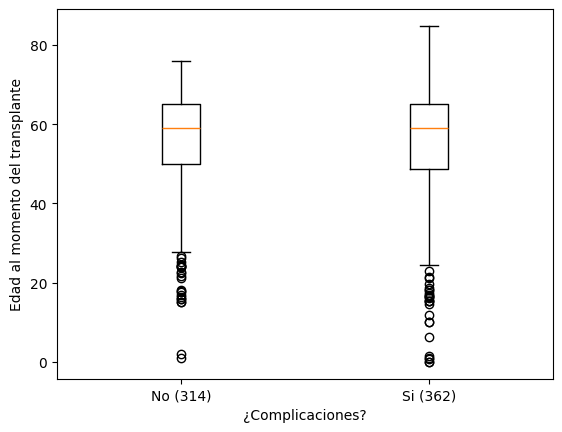

In [155]:
box_plot_vs_complicacion('Edad_Al_Tx','Edad al momento del transplante')

## Grupo etario vs complicaciones

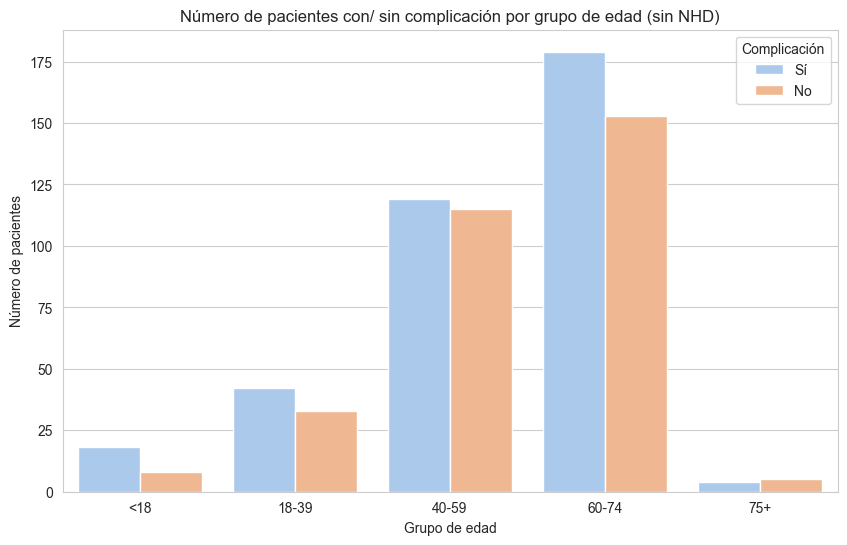

In [230]:
complicaciones1 = df['¬øComplicaci√≥n?'].replace({0: "No", 1: "S√≠"})
mask = complicaciones1.notna()

plt.figure(figsize=(10,6))
sns.countplot(
    data=df.loc[mask],
    x="Grupo_Edad",
    hue=complicaciones1[mask],  # S√≠ / No
    palette="pastel"
)

plt.title("N√∫mero de pacientes con/ sin complicaci√≥n por grupo de edad (sin NHD)")
plt.xlabel("Grupo de edad")
plt.ylabel("N√∫mero de pacientes")
plt.legend(title="Complicaci√≥n")
plt.show()

## BMI al momento del transplante

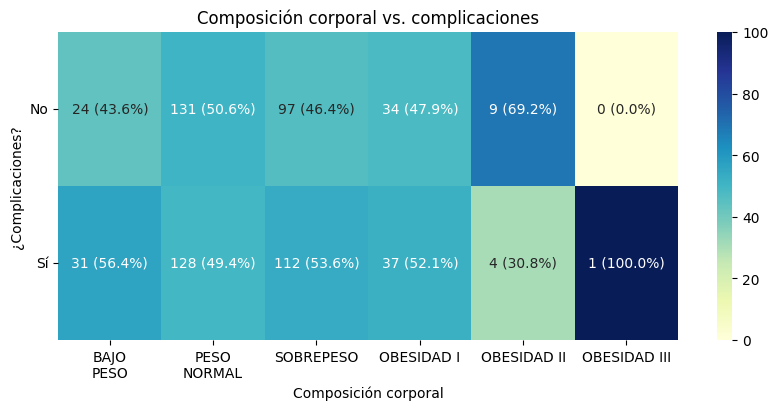

In [156]:
contingencia_vs_complicacion('Composici√≥n_Corporal', 'Composici√≥n corporal', ['BAJO\nPESO','PESO\nNORMAL','SOBREPESO','OBESIDAD I','OBESIDAD II','OBESIDAD III'], (10,4))

## D√≠as que se dej√≥ la sonda vesical

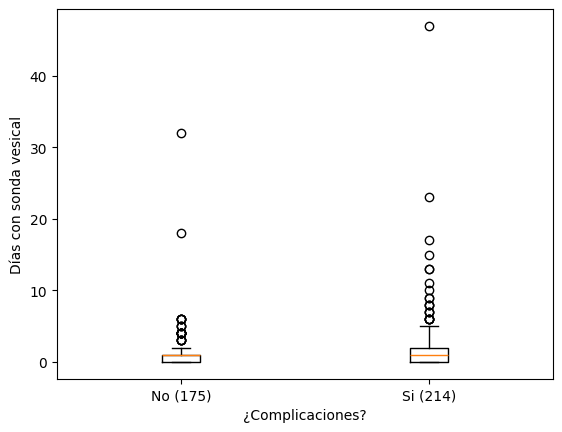

In [157]:
box_plot_vs_complicacion('Tiempo_Sonda_Vesical',"D√≠as con sonda vesical")

## D√≠as que se dejo el cateter central (CVC)

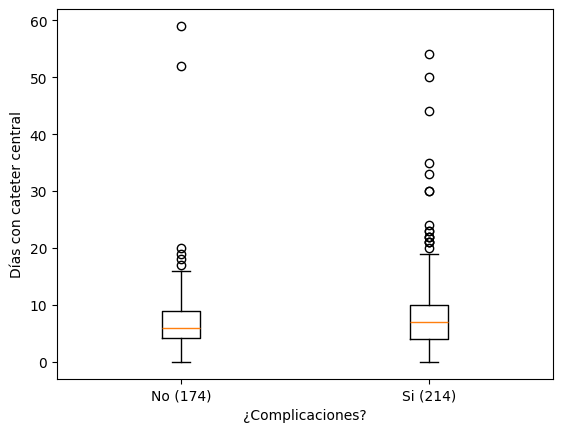

In [158]:
box_plot_vs_complicacion('Tiempo_CVC',"D√≠as con cateter central")

## ¬øEl receptor ten√≠a antocuerpos IGG contra Citomegalovirus?

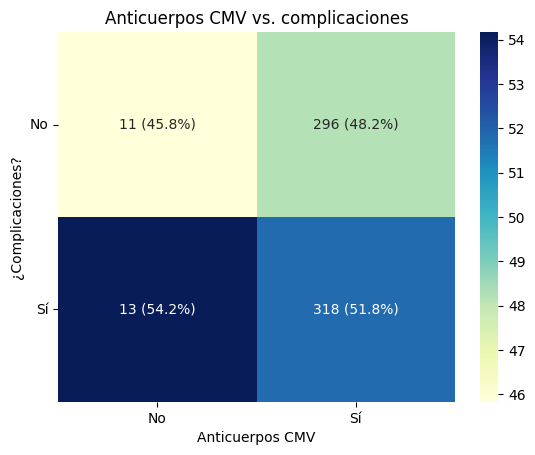

In [159]:
contingencia_vs_complicacion('CMV_Receptor', 'Anticuerpos CMV', ['No', 'S√≠'])

## ¬øEl receptor ten√≠a alguna valvulopat√≠a pre quir√∫rgica?

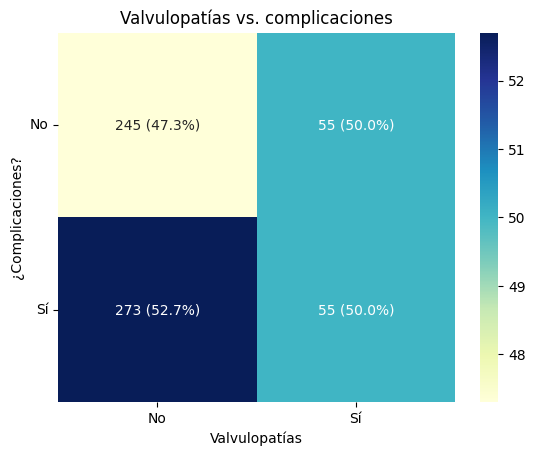

In [160]:
contingencia_vs_complicacion('Valvulopat√≠a_SiNo', 'Valvulopat√≠as', ['No', 'S√≠'])

## Fracci√≥n de Eyecci√≥n EKG

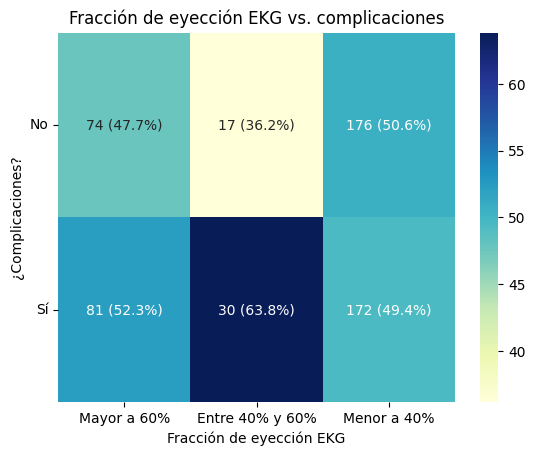

In [161]:
contingencia_vs_complicacion('Ecocardiograma_PreQx-FE_Cod', 'Fracci√≥n de eyecci√≥n EKG', ['Mayor a 60%', 'Entre 40% y 60%', 'Menor a 40%'])

## Respuesta cronotr√≥pica m√°xima por ecostress

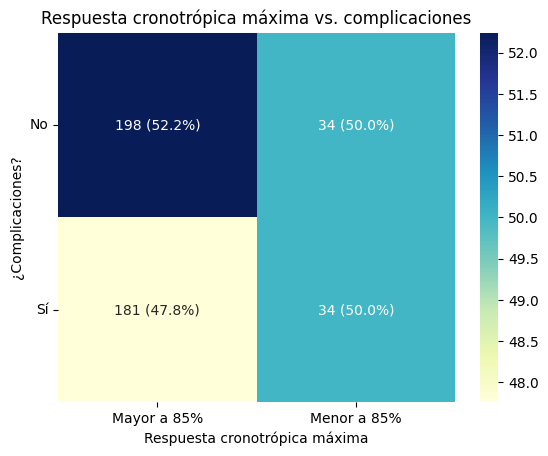

In [162]:
contingencia_vs_complicacion(
    'Ecocardiograma_PreQx_RC',
    'Respuesta cronotr√≥pica m√°xima',
    ['Mayor a 85%', 'Menor a 85%'])

## Hipertensi√≥n pulmonar en EKG

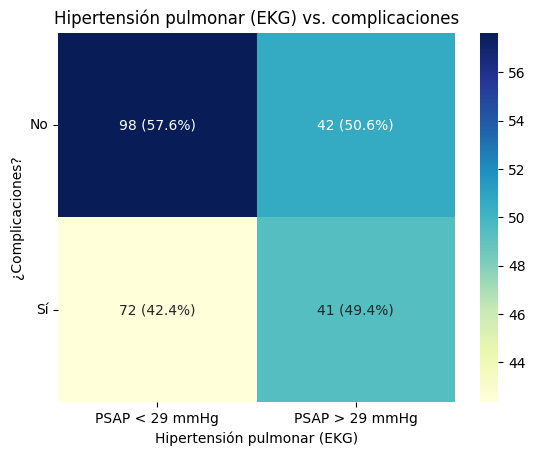

In [163]:
contingencia_vs_complicacion(
    'Ecocardiograma_PreQx_Hipertensi√≥n_Pulmonar',
    'Hipertensi√≥n pulmonar (EKG)',
    ['PSAP < 29 mmHg', 'PSAP > 29 mmHg'])

## TAPSE (Ecocardiograma)

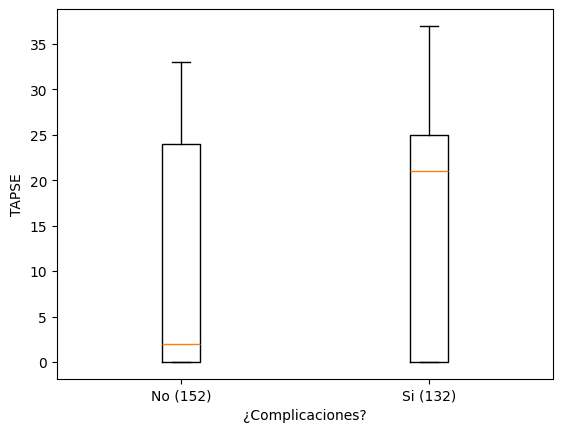

In [164]:
box_plot_vs_complicacion('Ecocardiograma_PreQx_TAPSE',"TAPSE")

## TAVSE (Ecocardiograma)

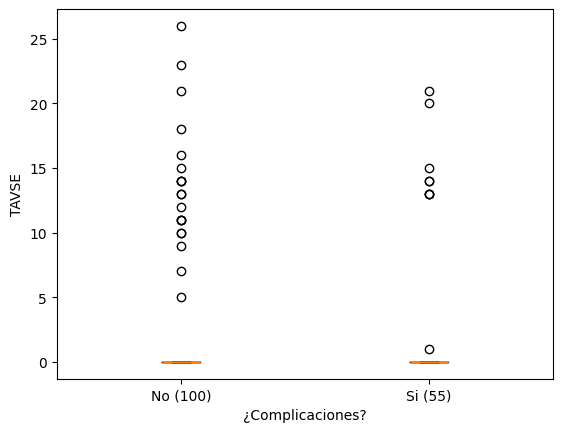

In [165]:
box_plot_vs_complicacion('Ecocardiograma_PreQx_TASVE',"TAVSE")

## Disfunci√≥n diast√≥lica (EKG)

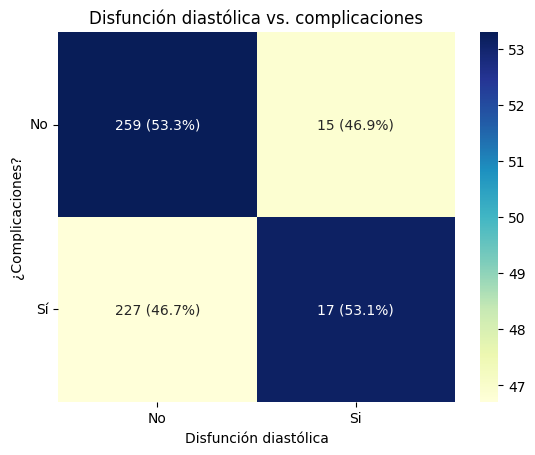

In [166]:
contingencia_vs_complicacion(
    'Ecocardiograma_PreQx_Disfunci√≥n_Diast√≥lica',
    'Disfunci√≥n diast√≥lica',
    ['No','Si'])

## METs (Unidades metab√≥licas de tarea)

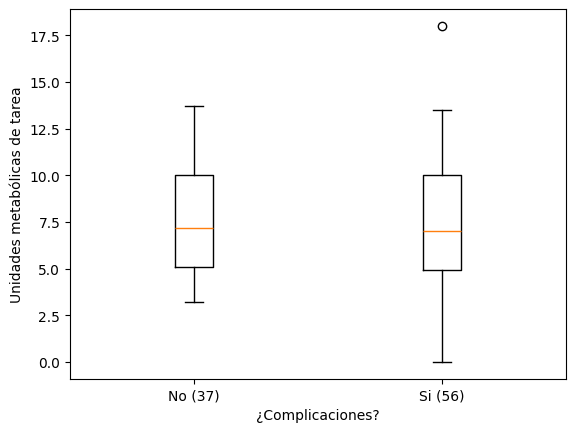

In [167]:
box_plot_vs_complicacion('METS',"Unidades metab√≥licas de tarea")

## Edad del donante

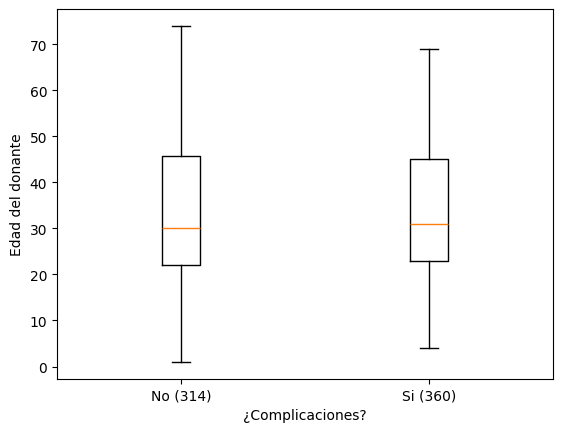

In [168]:
box_plot_vs_complicacion('Edad_Donante_Tx#1','Edad del donante')

## Transplante combinado h√≠gado-ri√±√≥n

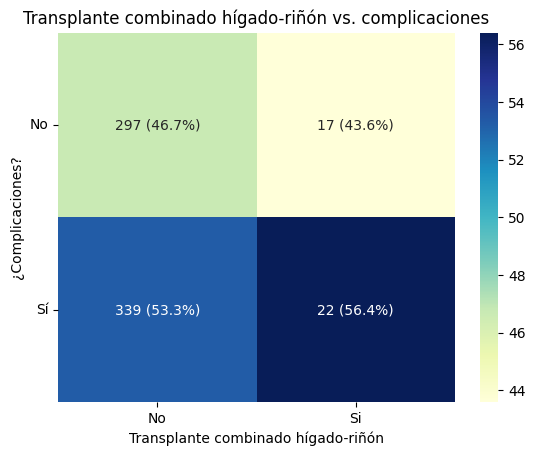

In [169]:
contingencia_vs_complicacion(
    'Trasplante_Combinado-H√≠gado-Ri√±√≥n_Tx#1',
    'Transplante combinado h√≠gado-ri√±√≥n',
    ['No','Si'])

## # de unidades de gl√≥bulos rojos usadas en Tx

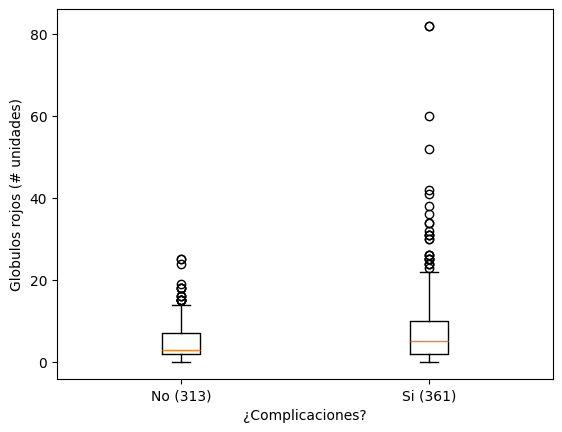

In [170]:
box_plot_vs_complicacion('#_Unidades_Gl√≥bulos_Rojos_Tx#1','Globulos rojos (# unidades)')

## # de unidades de plasma fresco congelado usadas en Tx

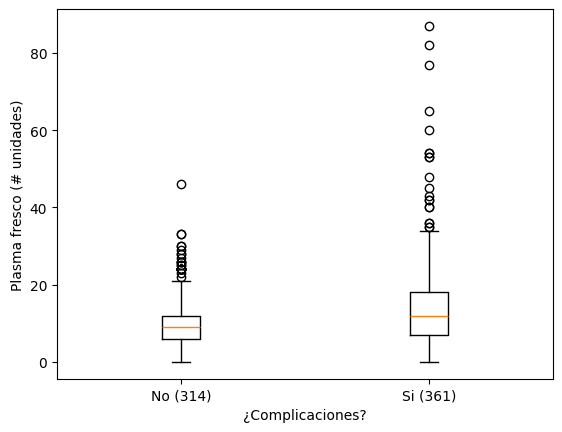

In [171]:
box_plot_vs_complicacion('#_Unidades_Plasma_Fresco_Congelado_Tx#1','Plasma fresco (# unidades)')

## # de unidades crioprecipitados usadas en Tx

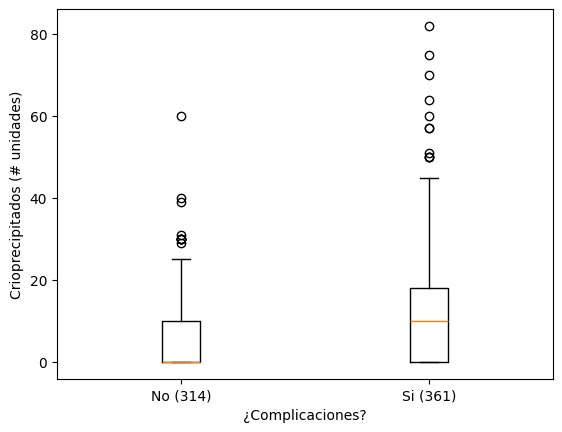

In [172]:
box_plot_vs_complicacion('#_Unidades_Crioprecipitados_Tx#1','Crioprecipitados (# unidades)')

## # de unidades de plaquetas usadas en Tx

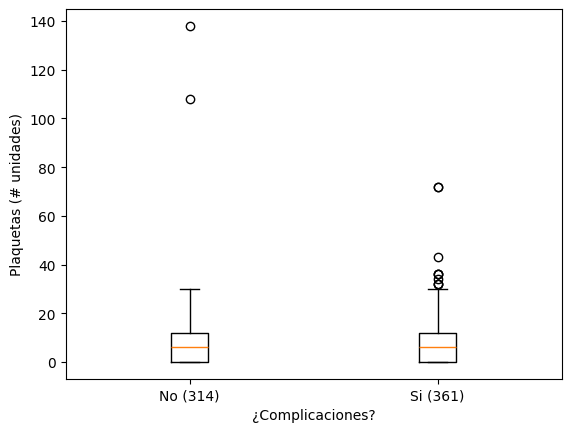

In [173]:
box_plot_vs_complicacion('#_Unidades_Plaquetas_Tx#1','Plaquetas (# unidades)')

## Tiempo quir√∫rgico (horas)

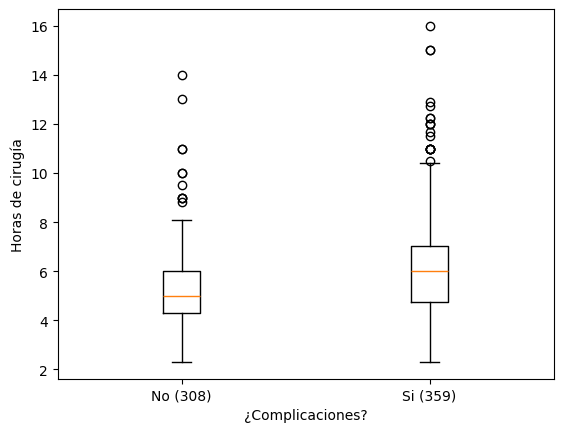

In [174]:
box_plot_vs_complicacion('Tiempo_Quir√∫rgico_Tx#1','Horas de cirug√≠a')

## Antibi√≥tico_Profil√°ctico_VS_Terap√©utico

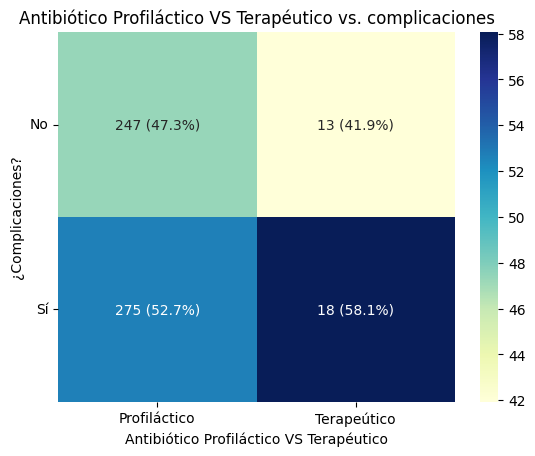

In [175]:
contingencia_vs_complicacion(
    'Antibi√≥tico_Profil√°ctico_VS_Terap√©utico',
    'Antibi√≥tico Profil√°ctico VS Terap√©utico',
    ['Profil√°ctico','Terape√∫tico'])

## N√∫mero de d√≠as que recibi√≥ antibi√≥tico pretransplante en caso de infecci√≥n

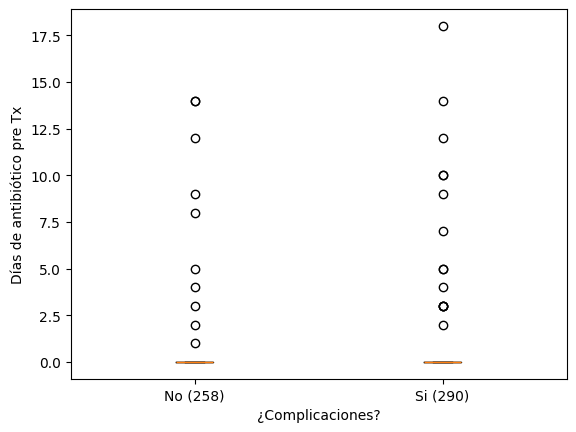

In [176]:
box_plot_vs_complicacion('D√≠as_Tratamiento_Antibi√≥tico_Previo_A_Tx#1','D√≠as de antibi√≥tico pre Tx')

## Tiempo entre profilaxis antibi√≥tica y la incisi√≥n

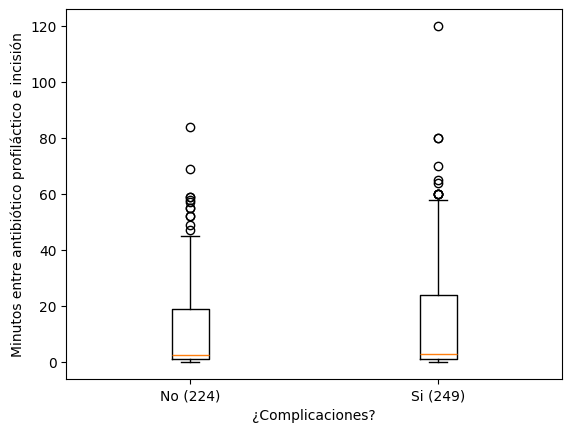

In [202]:
box_plot_vs_complicacion('Tiempo_De_Dosis_Hasta_Tx#1','Minutos entre antibi√≥tico profil√°ctico e incisi√≥n')

## Pruebas de hip√≥tesis para el subconjunto de variables booleanas y ordinales

In [210]:
from scipy.stats import chi2_contingency, fisher_exact

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

variables_categoricas = [
    'Soporte_Vasopresor_PeriTx', 'Levosimendan_PeriTx', 'Noradrenalina_PeriTx',
    'Adrenalina_PeriTx', 'Vasopresina_PeriTx', 'Dopamina_PeriTx',
    'Amiodarona_PeriTx', 'Rechazo_Agudo', 'Rechazo_Cr√≥nico',
    'Infecci√≥n_POP', 'Stent', 'Requiri√≥_Reconstrucci√≥n_Biliar',
    'Profilaxis_Antitromb√≥tica', 'Fast_Track'
]

variables_ordinales = [
    'Tipo_De_Complicaci√≥n_1', 'Severidad_Rechazo_Agudo',
    'Tipo_Infecci√≥n_1', 'Germen_1', '#_De_Complicaciones'
]

variable_objetivo = '¬øComplicaci√≥n?'
variables_a_analizar = variables_categoricas + variables_ordinales

### Variables categ√≥ricas


An√°lisis CATEG√ìRICO: 'Soporte_Vasopresor_PeriTx' vs. '¬øComplicaci√≥n?'

üìä Tabla de Contingencia:
¬øComplicaci√≥n?             0.0  1.0
Soporte_Vasopresor_PeriTx          
0.0                        151  111
1.0                        155  219


<Figure size 1200x700 with 0 Axes>

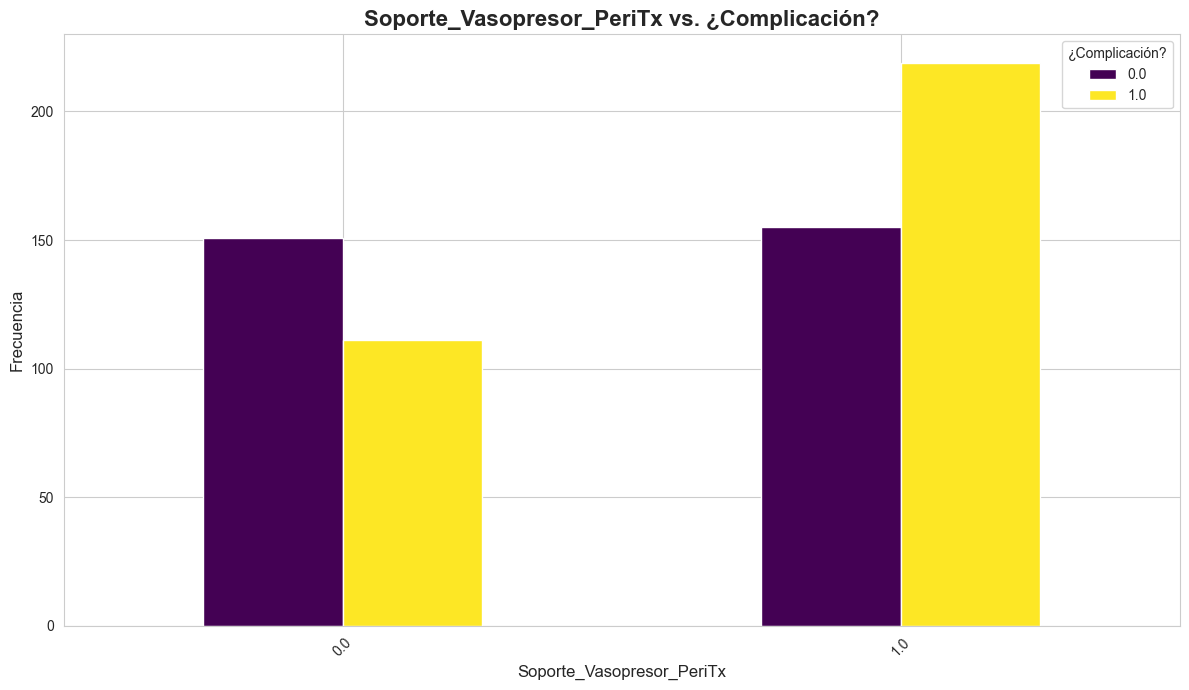


üìà Resultados de Chi-cuadrado:
   Chi¬≤ = 15.5341
   p-valor = 0.0001
   Grados de libertad = 1

üí° Interpretaci√≥n:
   ‚úì ASOCIACI√ìN SIGNIFICATIVA (p=0.0001 < 0.05)
   Existe relaci√≥n estad√≠stica entre 'Soporte_Vasopresor_PeriTx' y '¬øComplicaci√≥n?'

An√°lisis CATEG√ìRICO: 'Levosimendan_PeriTx' vs. '¬øComplicaci√≥n?'

üìä Tabla de Contingencia:
¬øComplicaci√≥n?       0.0  1.0
Levosimendan_PeriTx          
0.0                  306  332
1.0                    0    4


<Figure size 1200x700 with 0 Axes>

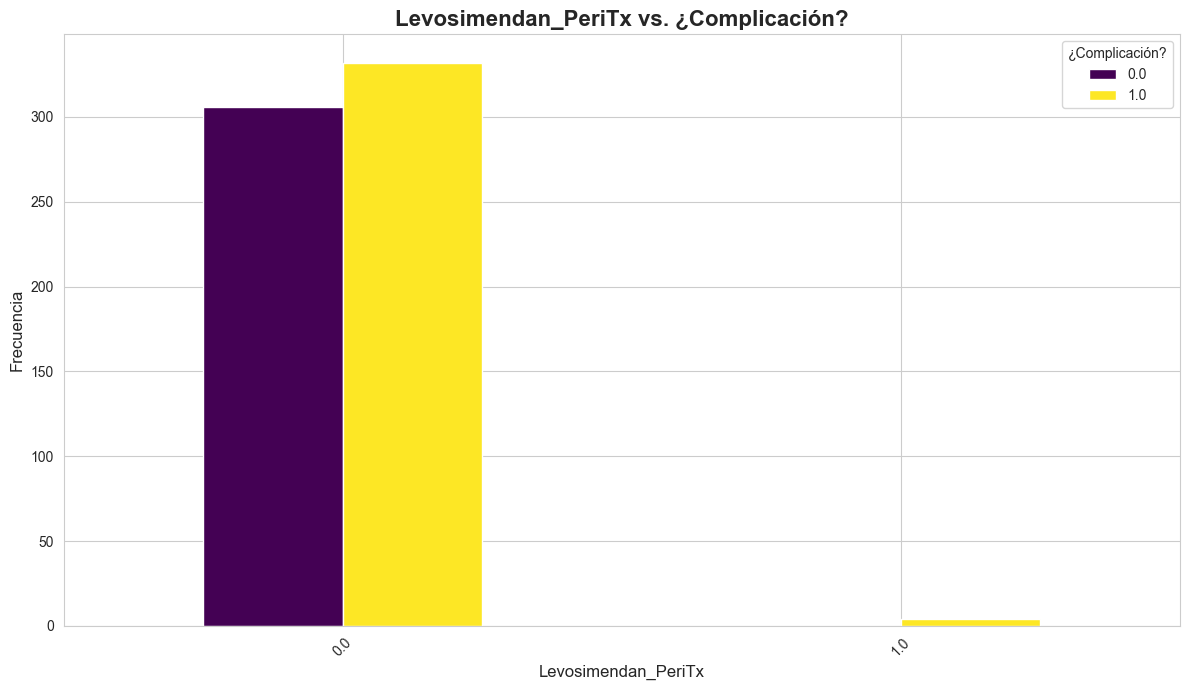


üìà Resultados de Chi-cuadrado:
   Chi¬≤ = 1.9951
   p-valor = 0.1578
   Grados de libertad = 1

‚ö†Ô∏è Advertencia: 50.0% de celdas tienen frecuencia esperada < 5
   Los resultados pueden no ser confiables.

üî¨ Prueba Exacta de Fisher (alternativa para muestras peque√±as):
   Odds Ratio = inf
   p-valor (Fisher) = 0.1255

üí° Interpretaci√≥n (Fisher):
   ‚úó No significativo (p=0.1255 ‚â• 0.05)
   No hay evidencia de asociaci√≥n entre las variables

üí° Interpretaci√≥n:
   ‚úó No significativo (p=0.1578 ‚â• 0.05)
   No hay evidencia de asociaci√≥n entre las variables

An√°lisis CATEG√ìRICO: 'Noradrenalina_PeriTx' vs. '¬øComplicaci√≥n?'

üìä Tabla de Contingencia:
¬øComplicaci√≥n?        0.0  1.0
Noradrenalina_PeriTx          
0.0                   157  124
1.0                   147  210


<Figure size 1200x700 with 0 Axes>

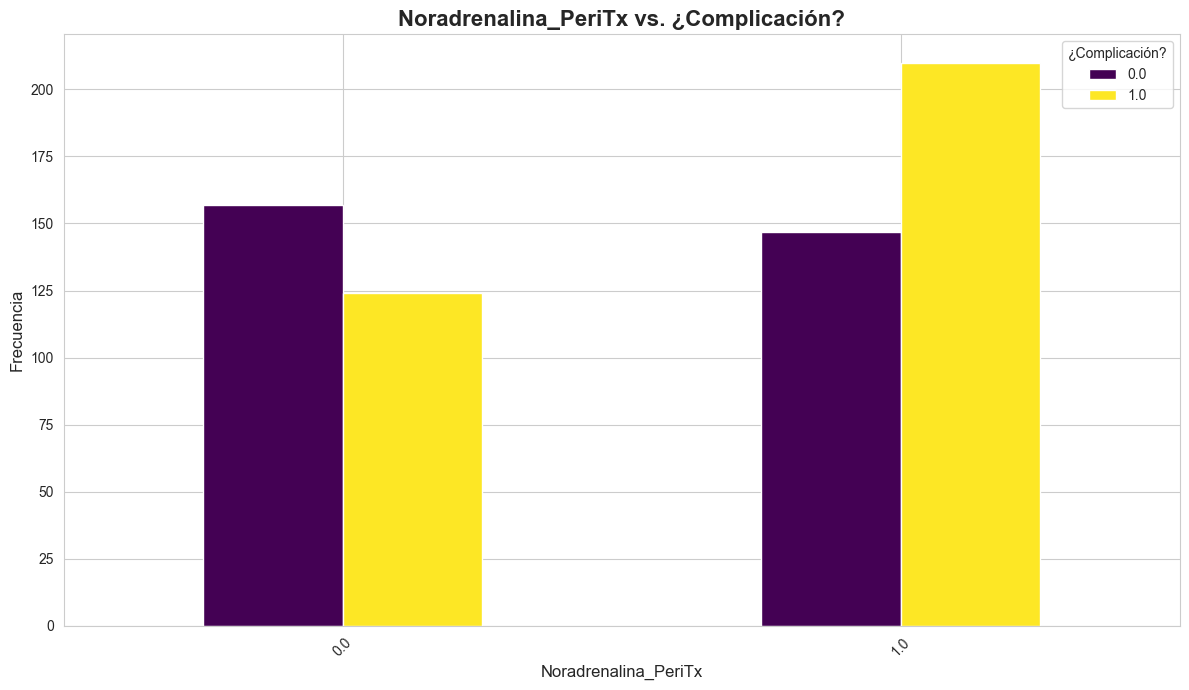


üìà Resultados de Chi-cuadrado:
   Chi¬≤ = 13.0298
   p-valor = 0.0003
   Grados de libertad = 1

üí° Interpretaci√≥n:
   ‚úì ASOCIACI√ìN SIGNIFICATIVA (p=0.0003 < 0.05)
   Existe relaci√≥n estad√≠stica entre 'Noradrenalina_PeriTx' y '¬øComplicaci√≥n?'

An√°lisis CATEG√ìRICO: 'Adrenalina_PeriTx' vs. '¬øComplicaci√≥n?'

üìä Tabla de Contingencia:
¬øComplicaci√≥n?     0.0  1.0
Adrenalina_PeriTx          
0.0                288  299
1.0                 17   36


<Figure size 1200x700 with 0 Axes>

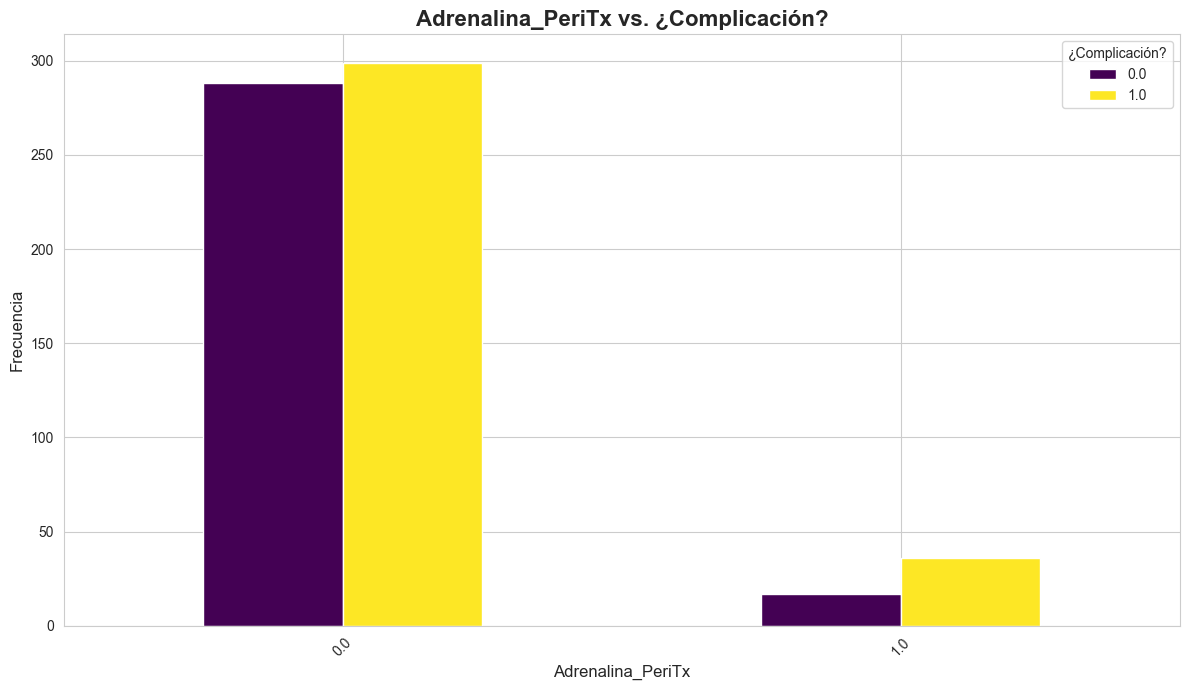


üìà Resultados de Chi-cuadrado:
   Chi¬≤ = 4.9632
   p-valor = 0.0259
   Grados de libertad = 1

üí° Interpretaci√≥n:
   ‚úì ASOCIACI√ìN SIGNIFICATIVA (p=0.0259 < 0.05)
   Existe relaci√≥n estad√≠stica entre 'Adrenalina_PeriTx' y '¬øComplicaci√≥n?'

An√°lisis CATEG√ìRICO: 'Vasopresina_PeriTx' vs. '¬øComplicaci√≥n?'

üìä Tabla de Contingencia:
¬øComplicaci√≥n?      0.0  1.0
Vasopresina_PeriTx          
0.0                 302  305
1.0                   3   30


<Figure size 1200x700 with 0 Axes>

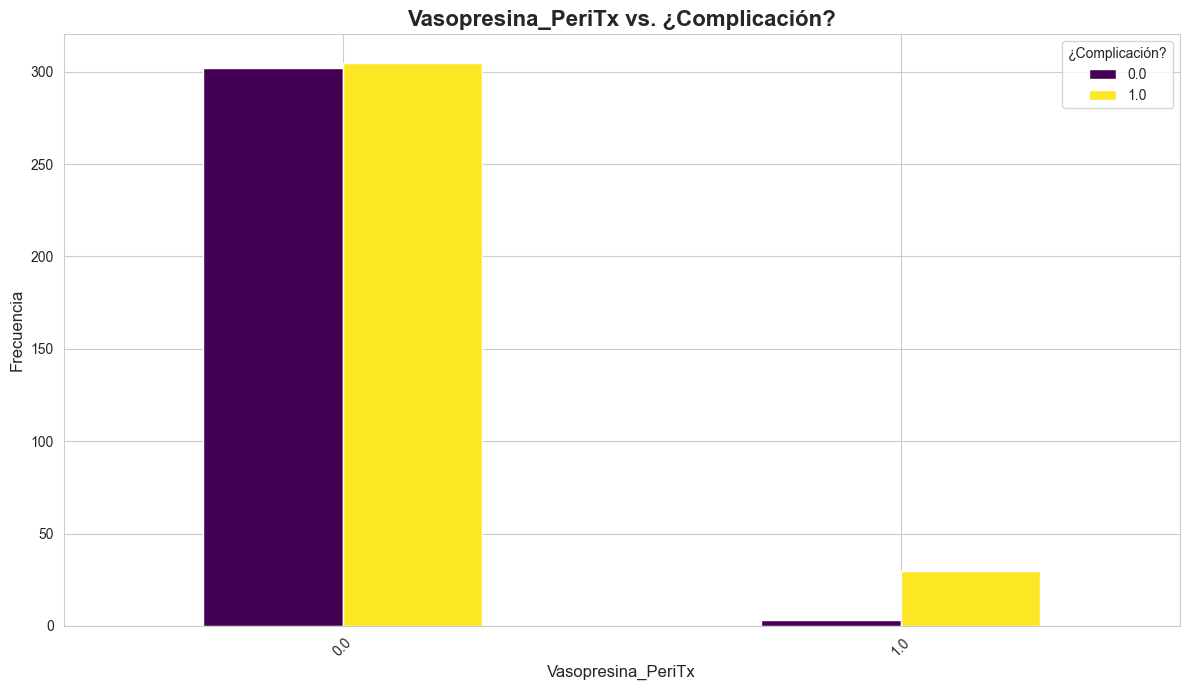


üìà Resultados de Chi-cuadrado:
   Chi¬≤ = 19.1470
   p-valor = 0.0000
   Grados de libertad = 1

üí° Interpretaci√≥n:
   ‚úì ASOCIACI√ìN SIGNIFICATIVA (p=0.0000 < 0.05)
   Existe relaci√≥n estad√≠stica entre 'Vasopresina_PeriTx' y '¬øComplicaci√≥n?'

An√°lisis CATEG√ìRICO: 'Dopamina_PeriTx' vs. '¬øComplicaci√≥n?'

üìä Tabla de Contingencia:
¬øComplicaci√≥n?   0.0  1.0
Dopamina_PeriTx          
0.0              271  283
1.0               33   52


<Figure size 1200x700 with 0 Axes>

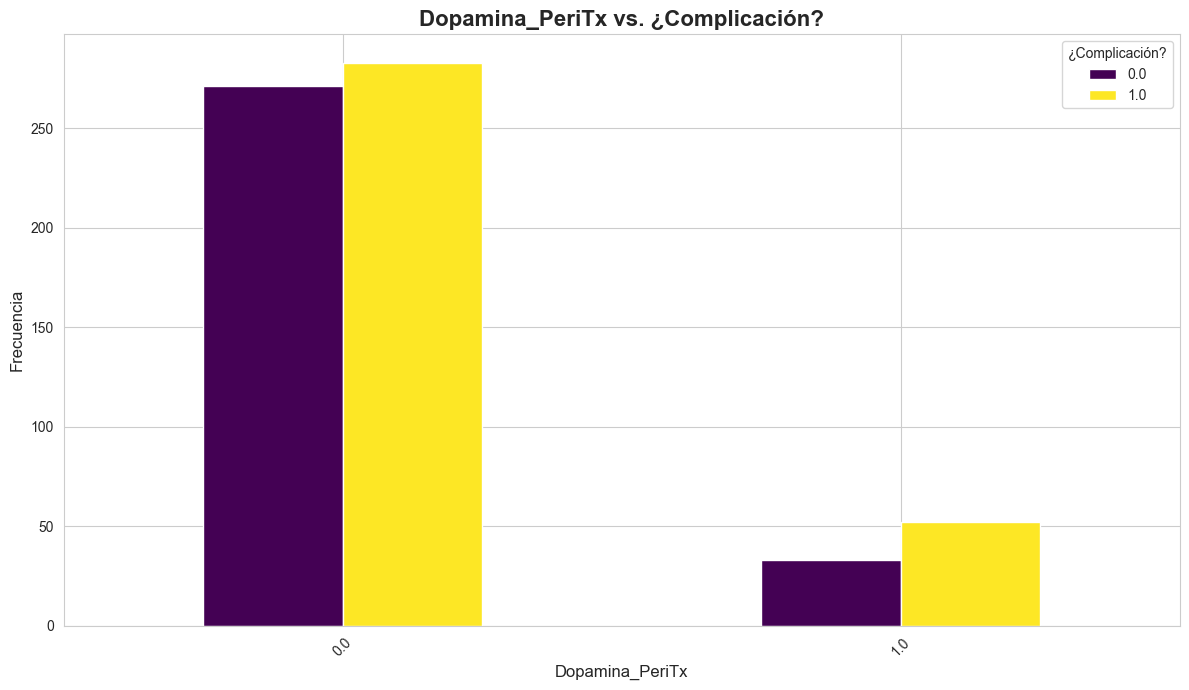


üìà Resultados de Chi-cuadrado:
   Chi¬≤ = 2.6191
   p-valor = 0.1056
   Grados de libertad = 1

üí° Interpretaci√≥n:
   ‚úó No significativo (p=0.1056 ‚â• 0.05)
   No hay evidencia de asociaci√≥n entre las variables

An√°lisis CATEG√ìRICO: 'Amiodarona_PeriTx' vs. '¬øComplicaci√≥n?'

üìä Tabla de Contingencia:
¬øComplicaci√≥n?     0.0  1.0
Amiodarona_PeriTx          
0.0                297  313
1.0                  7   22


<Figure size 1200x700 with 0 Axes>

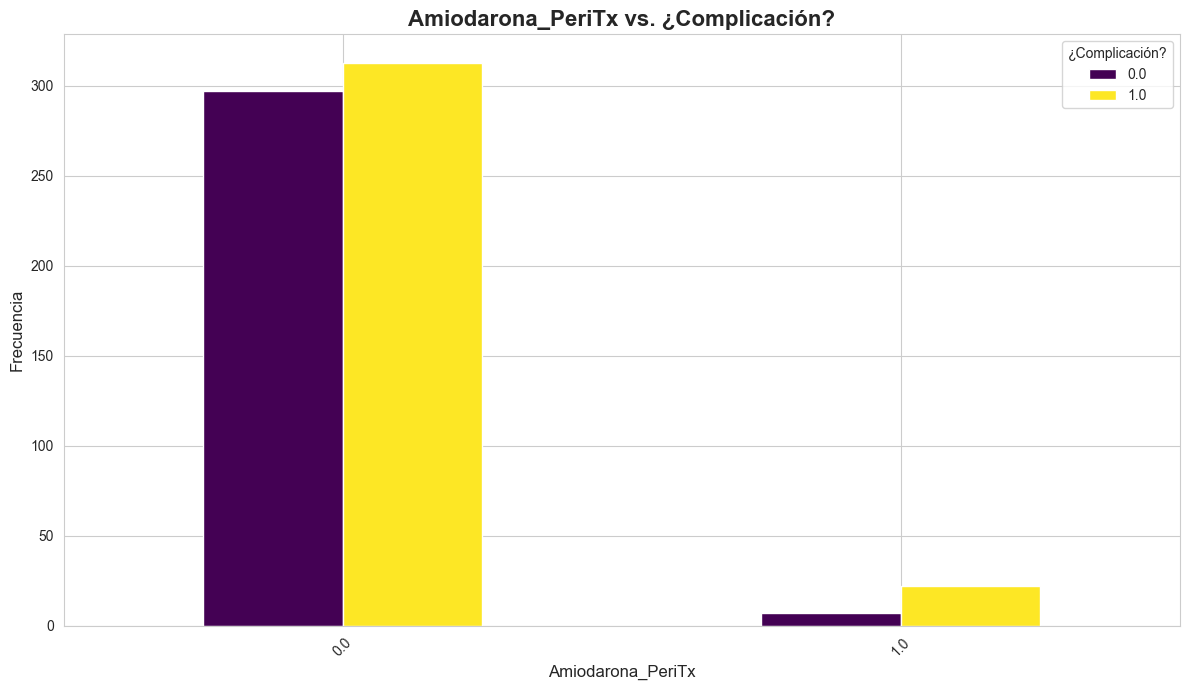


üìà Resultados de Chi-cuadrado:
   Chi¬≤ = 5.7420
   p-valor = 0.0166
   Grados de libertad = 1

üí° Interpretaci√≥n:
   ‚úì ASOCIACI√ìN SIGNIFICATIVA (p=0.0166 < 0.05)
   Existe relaci√≥n estad√≠stica entre 'Amiodarona_PeriTx' y '¬øComplicaci√≥n?'

An√°lisis CATEG√ìRICO: 'Rechazo_Agudo' vs. '¬øComplicaci√≥n?'

üìä Tabla de Contingencia:
¬øComplicaci√≥n?  0.0  1.0
Rechazo_Agudo           
0.0             257  275
1.0              54   79


<Figure size 1200x700 with 0 Axes>

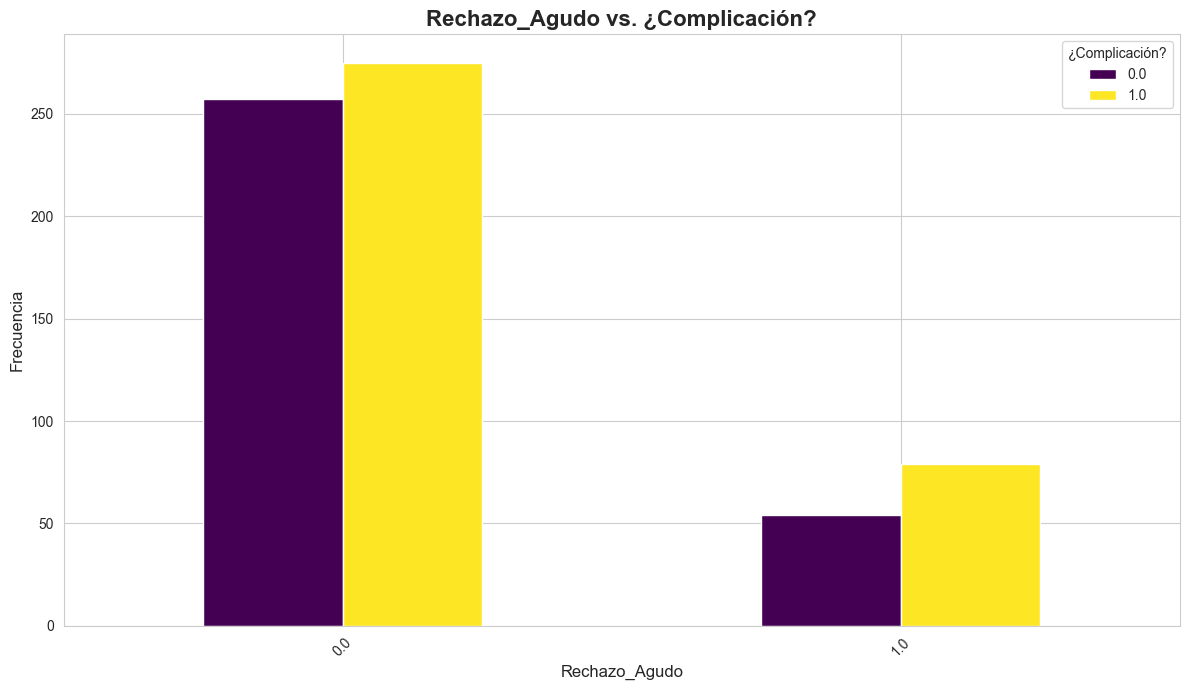


üìà Resultados de Chi-cuadrado:
   Chi¬≤ = 2.2383
   p-valor = 0.1346
   Grados de libertad = 1

üí° Interpretaci√≥n:
   ‚úó No significativo (p=0.1346 ‚â• 0.05)
   No hay evidencia de asociaci√≥n entre las variables

An√°lisis CATEG√ìRICO: 'Rechazo_Cr√≥nico' vs. '¬øComplicaci√≥n?'

üìä Tabla de Contingencia:
¬øComplicaci√≥n?   0.0  1.0
Rechazo_Cr√≥nico          
0.0              309  351
1.0                1    3


<Figure size 1200x700 with 0 Axes>

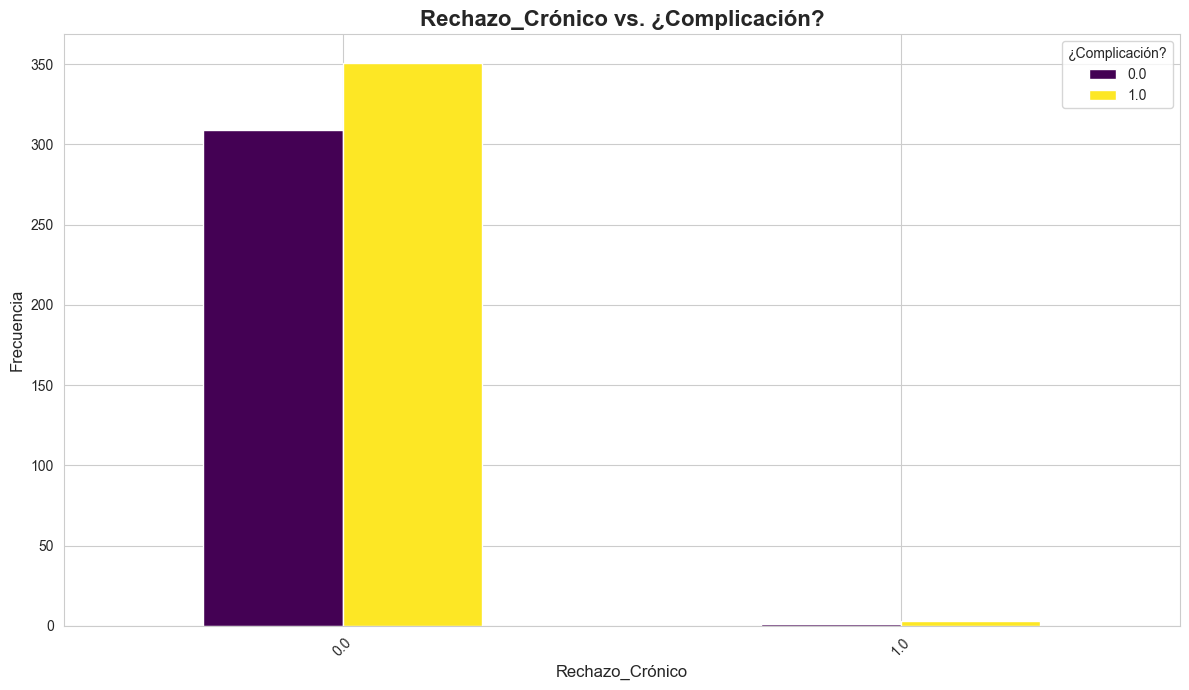


üìà Resultados de Chi-cuadrado:
   Chi¬≤ = 0.1365
   p-valor = 0.7118
   Grados de libertad = 1

‚ö†Ô∏è Advertencia: 50.0% de celdas tienen frecuencia esperada < 5
   Los resultados pueden no ser confiables.

üî¨ Prueba Exacta de Fisher (alternativa para muestras peque√±as):
   Odds Ratio = 2.6410
   p-valor (Fisher) = 0.6272

üí° Interpretaci√≥n (Fisher):
   ‚úó No significativo (p=0.6272 ‚â• 0.05)
   No hay evidencia de asociaci√≥n entre las variables

üí° Interpretaci√≥n:
   ‚úó No significativo (p=0.7118 ‚â• 0.05)
   No hay evidencia de asociaci√≥n entre las variables

An√°lisis CATEG√ìRICO: 'Infecci√≥n_POP' vs. '¬øComplicaci√≥n?'

üìä Tabla de Contingencia:
¬øComplicaci√≥n?  0.0  1.0
Infecci√≥n_POP           
0.0             209  195
1.0              53   96


<Figure size 1200x700 with 0 Axes>

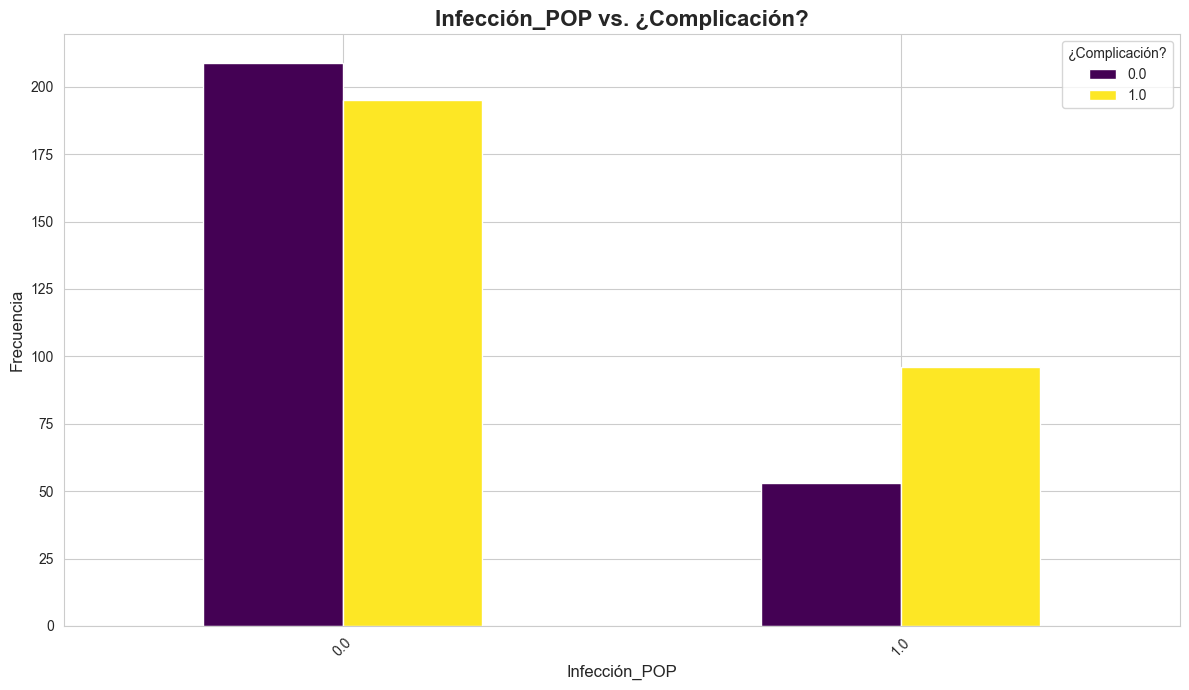


üìà Resultados de Chi-cuadrado:
   Chi¬≤ = 10.7661
   p-valor = 0.0010
   Grados de libertad = 1

üí° Interpretaci√≥n:
   ‚úì ASOCIACI√ìN SIGNIFICATIVA (p=0.0010 < 0.05)
   Existe relaci√≥n estad√≠stica entre 'Infecci√≥n_POP' y '¬øComplicaci√≥n?'

An√°lisis CATEG√ìRICO: 'Stent' vs. '¬øComplicaci√≥n?'

üìä Tabla de Contingencia:
¬øComplicaci√≥n?  0.0  1.0
Stent                   
0.0             270  267
1.0              27   83


<Figure size 1200x700 with 0 Axes>

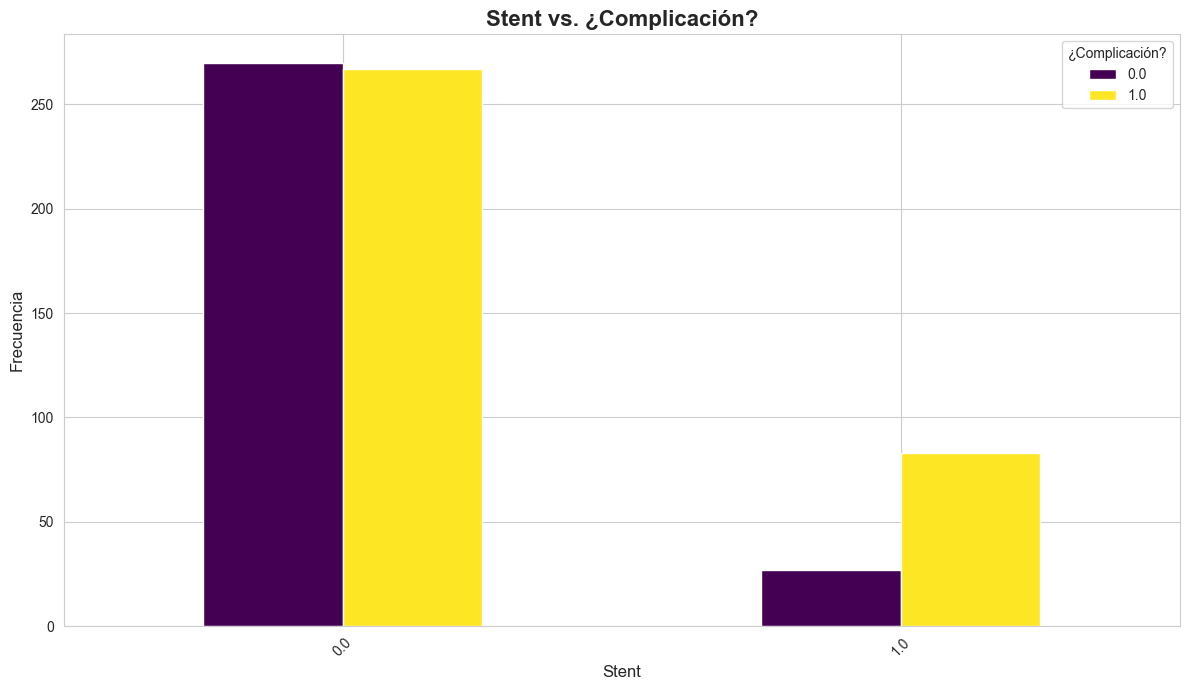


üìà Resultados de Chi-cuadrado:
   Chi¬≤ = 23.3224
   p-valor = 0.0000
   Grados de libertad = 1

üí° Interpretaci√≥n:
   ‚úì ASOCIACI√ìN SIGNIFICATIVA (p=0.0000 < 0.05)
   Existe relaci√≥n estad√≠stica entre 'Stent' y '¬øComplicaci√≥n?'

An√°lisis CATEG√ìRICO: 'Requiri√≥_Reconstrucci√≥n_Biliar' vs. '¬øComplicaci√≥n?'

üìä Tabla de Contingencia:
¬øComplicaci√≥n?                  0.0  1.0
Requiri√≥_Reconstrucci√≥n_Biliar          
0.0                             290  328
1.0                               7   22


<Figure size 1200x700 with 0 Axes>

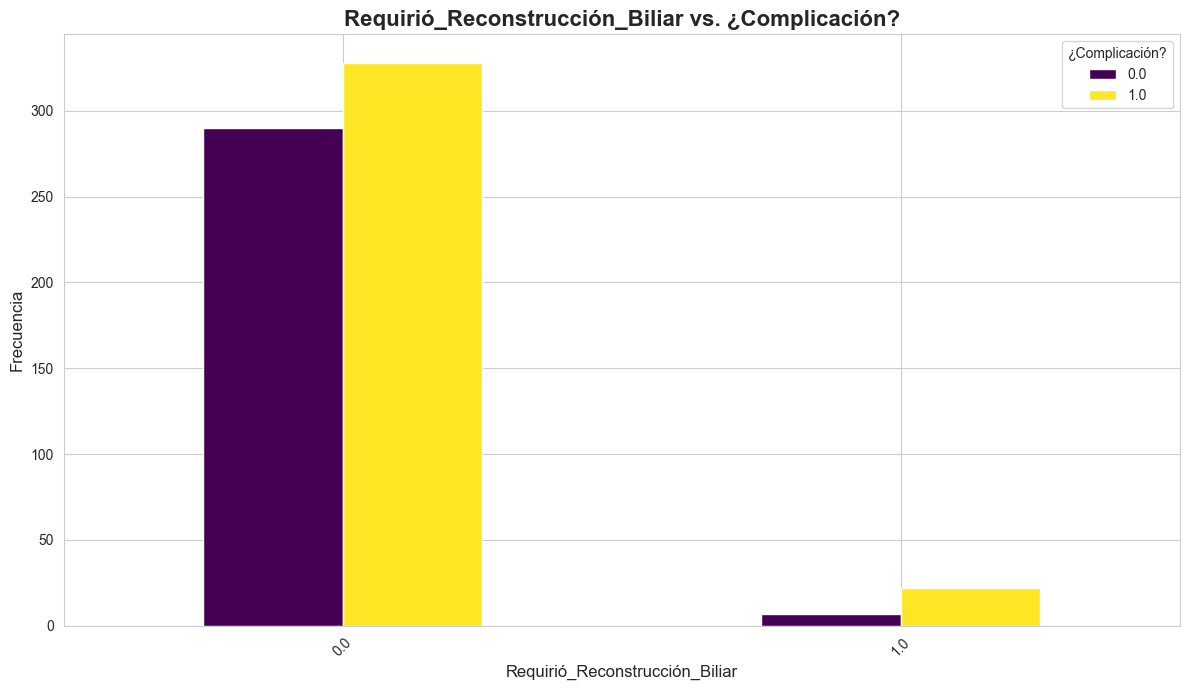


üìà Resultados de Chi-cuadrado:
   Chi¬≤ = 4.9112
   p-valor = 0.0267
   Grados de libertad = 1

üí° Interpretaci√≥n:
   ‚úì ASOCIACI√ìN SIGNIFICATIVA (p=0.0267 < 0.05)
   Existe relaci√≥n estad√≠stica entre 'Requiri√≥_Reconstrucci√≥n_Biliar' y '¬øComplicaci√≥n?'

An√°lisis CATEG√ìRICO: 'Profilaxis_Antitromb√≥tica' vs. '¬øComplicaci√≥n?'

üìä Tabla de Contingencia:
¬øComplicaci√≥n?             0.0  1.0
Profilaxis_Antitromb√≥tica          
0.0                          6   20
1.0                        247  254


<Figure size 1200x700 with 0 Axes>

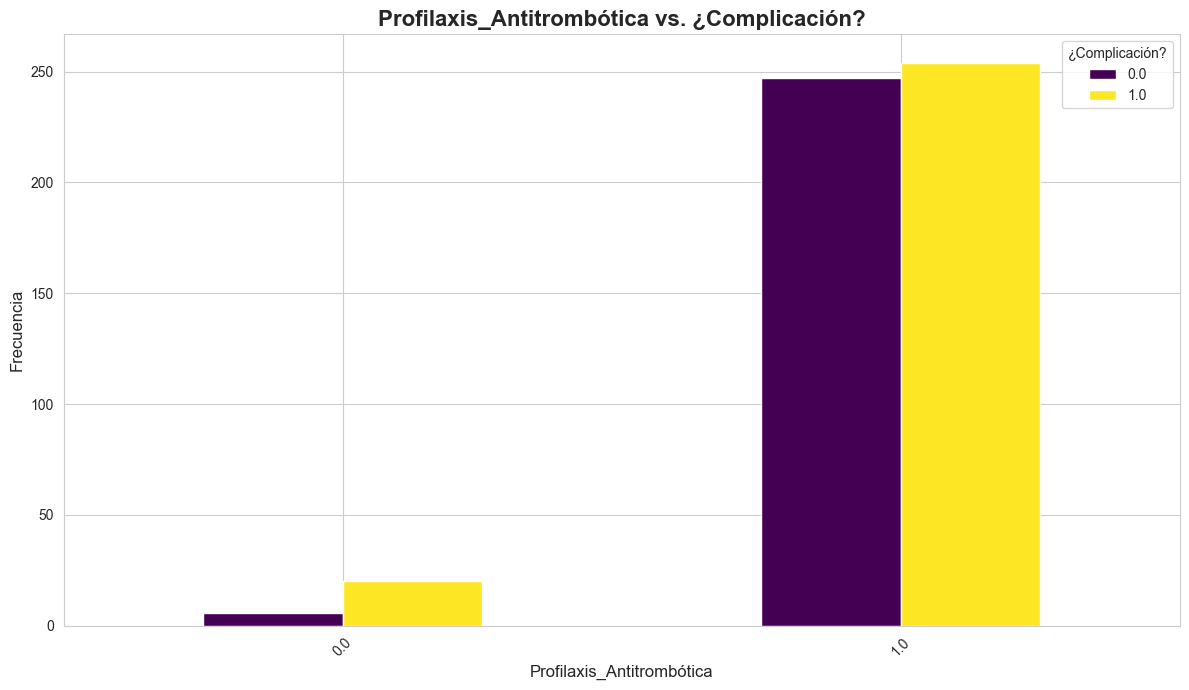


üìà Resultados de Chi-cuadrado:
   Chi¬≤ = 5.8001
   p-valor = 0.0160
   Grados de libertad = 1

üí° Interpretaci√≥n:
   ‚úì ASOCIACI√ìN SIGNIFICATIVA (p=0.0160 < 0.05)
   Existe relaci√≥n estad√≠stica entre 'Profilaxis_Antitromb√≥tica' y '¬øComplicaci√≥n?'

An√°lisis CATEG√ìRICO: 'Fast_Track' vs. '¬øComplicaci√≥n?'

üìä Tabla de Contingencia:
¬øComplicaci√≥n?  0.0  1.0
Fast_Track              
0.0             285  340
1.0              29   20


<Figure size 1200x700 with 0 Axes>

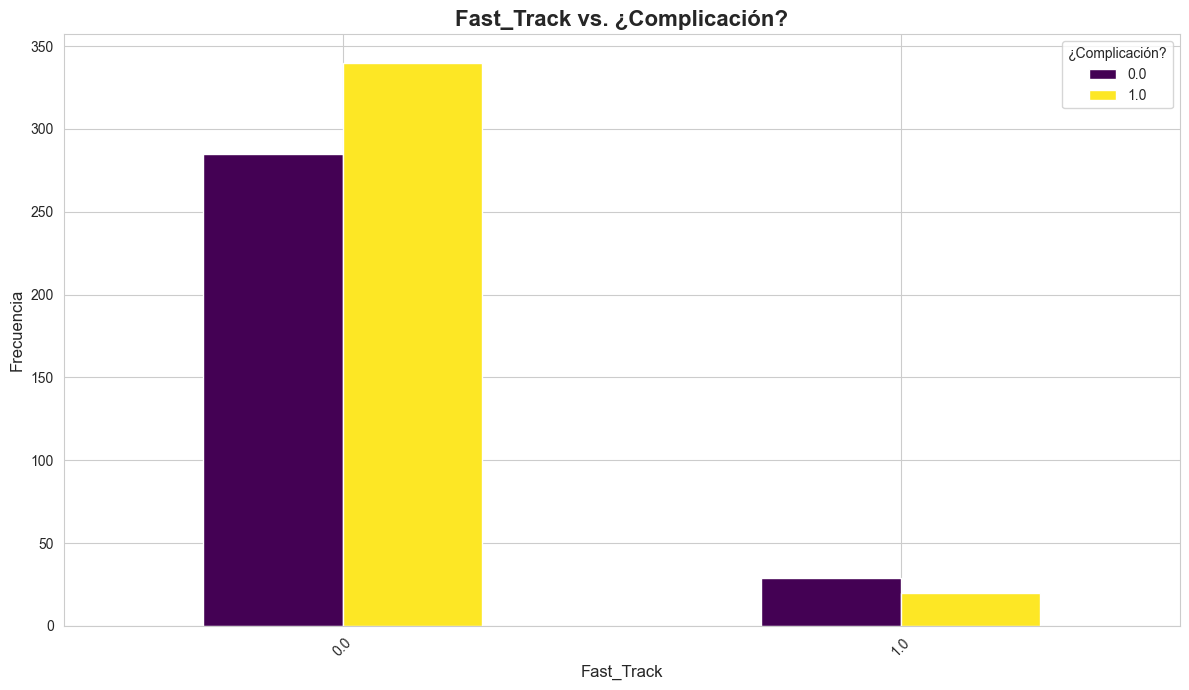


üìà Resultados de Chi-cuadrado:
   Chi¬≤ = 2.8455
   p-valor = 0.0916
   Grados de libertad = 1

üí° Interpretaci√≥n:
   ‚úó No significativo (p=0.0916 ‚â• 0.05)
   No hay evidencia de asociaci√≥n entre las variables


In [211]:
for variable in variables_categoricas:
    print(f"\n{'='*60}")
    print(f"An√°lisis CATEG√ìRICO: '{variable}' vs. '{variable_objetivo}'")
    print(f"{'='*60}")

    if variable not in df.columns or variable_objetivo not in df.columns:
        print(f"‚ö†Ô∏è Columna '{variable}' o '{variable_objetivo}' no encontrada. Omitiendo.")
        continue

    df_limpio = df[[variable, variable_objetivo]].dropna()

    if df_limpio.empty:
        print("‚ö†Ô∏è No hay datos v√°lidos despu√©s de eliminar valores nulos.")
        continue

    tabla_contingencia = pd.crosstab(df_limpio[variable], df_limpio[variable_objetivo])

    if tabla_contingencia.shape[0] < 2 or tabla_contingencia.shape[1] < 2:
        print("‚ö†Ô∏è Tabla de contingencia insuficiente (necesita al menos 2x2).")
        continue

    print("\nüìä Tabla de Contingencia:")
    print(tabla_contingencia)

    plt.figure()
    tabla_contingencia.plot(kind='bar', rot=45, colormap='viridis')
    plt.title(f'{variable} vs. {variable_objetivo}', fontsize=16, fontweight='bold')
    plt.xlabel(variable, fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.legend(title=variable_objetivo, title_fontsize=10)
    plt.tight_layout()
    plt.show()
    plt.close()

    try:
        chi2, p_value, dof, expected = chi2_contingency(tabla_contingencia)

        celdas_invalidas = (expected < 5).sum()
        porcentaje_invalido = (celdas_invalidas / expected.size) * 100

        print("\nüìà Resultados de Chi-cuadrado:")
        print(f"   Chi¬≤ = {chi2:.4f}")
        print(f"   p-valor = {p_value:.4f}")
        print(f"   Grados de libertad = {dof}")

        if porcentaje_invalido > 20:
            print(f"\n‚ö†Ô∏è Advertencia: {porcentaje_invalido:.1f}% de celdas tienen frecuencia esperada < 5")
            print("   Los resultados pueden no ser confiables.")

            # Realizar prueba de Fisher si es tabla 2x2
            if tabla_contingencia.shape == (2, 2):
                try:
                    oddsratio, fisher_p = fisher_exact(tabla_contingencia)
                    print("\nüî¨ Prueba Exacta de Fisher (alternativa para muestras peque√±as):")
                    print(f"   Odds Ratio = {oddsratio:.4f}")
                    print(f"   p-valor (Fisher) = {fisher_p:.4f}")

                    alpha = 0.05
                    print("\nüí° Interpretaci√≥n (Fisher):")
                    if fisher_p < alpha:
                        print(f"   ‚úì ASOCIACI√ìN SIGNIFICATIVA (p={fisher_p:.4f} < {alpha})")
                        print(f"   Existe relaci√≥n estad√≠stica entre '{variable}' y '{variable_objetivo}'")
                    else:
                        print(f"   ‚úó No significativo (p={fisher_p:.4f} ‚â• {alpha})")
                        print(f"   No hay evidencia de asociaci√≥n entre las variables")
                except Exception as e:
                    print(f"\n‚ùå Error en Prueba de Fisher: {e}")
            else:
                print("   ‚ÑπÔ∏è Prueba de Fisher solo disponible para tablas 2x2.")

        alpha = 0.05
        print("\nüí° Interpretaci√≥n:")
        if p_value < alpha:
            print(f"   ‚úì ASOCIACI√ìN SIGNIFICATIVA (p={p_value:.4f} < {alpha})")
            print(f"   Existe relaci√≥n estad√≠stica entre '{variable}' y '{variable_objetivo}'")
        else:
            print(f"   ‚úó No significativo (p={p_value:.4f} ‚â• {alpha})")
            print(f"   No hay evidencia de asociaci√≥n entre las variables")
    except Exception as e:
        print(f"\n‚ùå Error en Chi-cuadrado: {e}")

### Variables ordinales


An√°lisis ORDINAL: 'Tipo_De_Complicaci√≥n_1' vs. '¬øComplicaci√≥n?'

üìä Tabla de Contingencia:
¬øComplicaci√≥n?          0.0  1.0
Tipo_De_Complicaci√≥n_1          
0.0                     199   57
1.0                       0   69
2.0                       0   12
3.0                       0   18
4.0                       0   35
5.0                       0   16
6.0                       0    5
7.0                       0    3
8.0                       0    2
9.0                       0   23
11.0                      0    1
12.0                      0    1
13.0                      0    1
14.0                      0    8
15.0                      0   30
16.0                      0    1
17.0                      0    3
18.0                      0   16
19.0                      0    3
20.0                      0    2
21.0                      0    2
22.0                      0    4
24.0                      0    3
25.0                      0    2
26.0                      0    2
27.0    

<Figure size 1200x700 with 0 Axes>

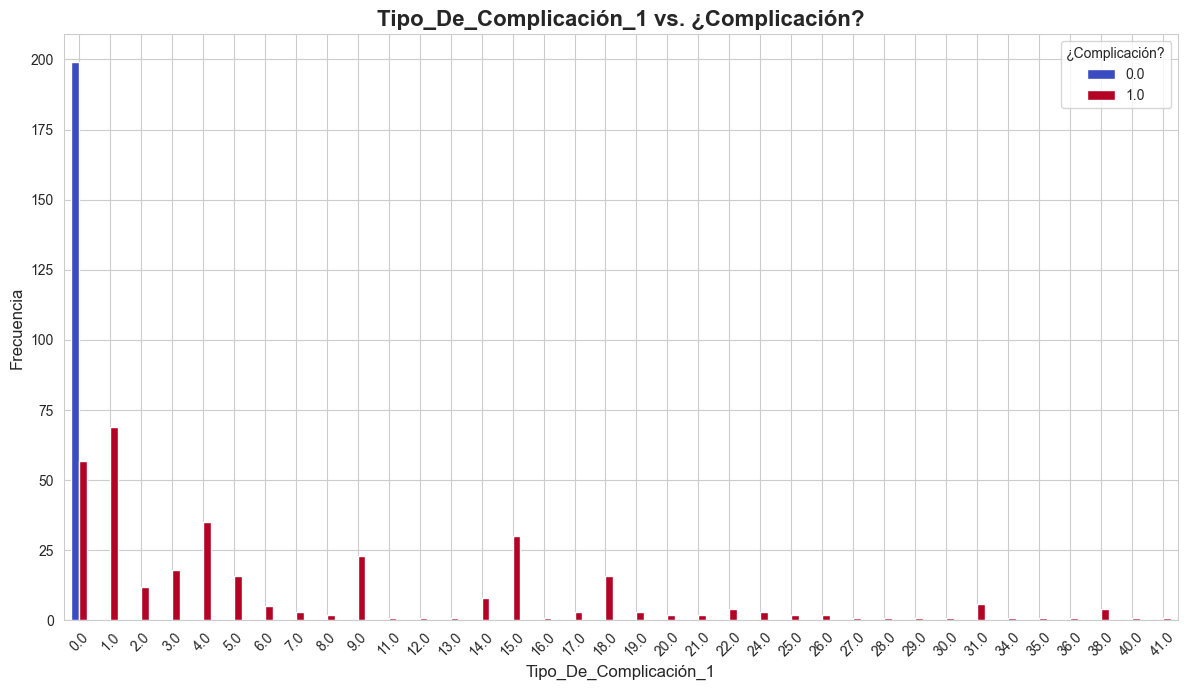


üìà Resultados de Chi-cuadrado:
   Chi¬≤ = 347.0380
   p-valor = 0.0000
   Grados de libertad = 35

‚ö†Ô∏è Advertencia: 75.0% de celdas tienen frecuencia esperada < 5
   ‚ÑπÔ∏è Prueba de Fisher solo disponible para tablas 2x2.

üí° Interpretaci√≥n:
   ‚úì ASOCIACI√ìN SIGNIFICATIVA (p=0.0000 < 0.05)
   Existe relaci√≥n estad√≠stica entre 'Tipo_De_Complicaci√≥n_1' y '¬øComplicaci√≥n?'

An√°lisis ORDINAL: 'Severidad_Rechazo_Agudo' vs. '¬øComplicaci√≥n?'

üìä Tabla de Contingencia:
¬øComplicaci√≥n?           0.0  1.0
Severidad_Rechazo_Agudo          
0.0                      250  269
1.0                        6   10
2.0                       34   53
3.0                       14   14
4.0                        1    0


<Figure size 1200x700 with 0 Axes>

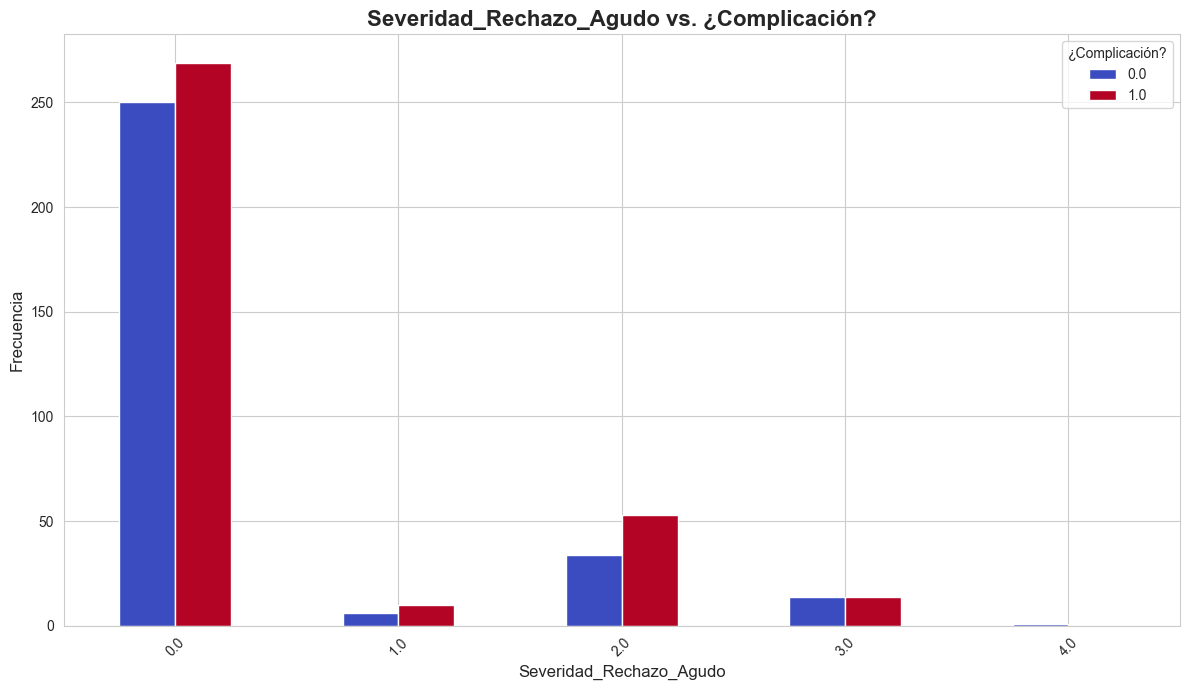


üìà Resultados de Chi-cuadrado:
   Chi¬≤ = 4.2798
   p-valor = 0.3695
   Grados de libertad = 4

üí° Interpretaci√≥n:
   ‚úó No significativo (p=0.3695 ‚â• 0.05)
   No hay evidencia de asociaci√≥n entre las variables

An√°lisis ORDINAL: 'Tipo_Infecci√≥n_1' vs. '¬øComplicaci√≥n?'

üìä Tabla de Contingencia:
¬øComplicaci√≥n?    0.0  1.0
Tipo_Infecci√≥n_1          
0.0                28   70
1.0                 3   14
2.0                23   27
3.0                 3   11
4.0                 1    2
5.0                 5    5
6.0                 1    3
7.0                 1    1
8.0                 6    4
9.0                 0    1
10.0                6   16
11.0                0    8
13.0                0    1
16.0                2    0
17.0                0    1
18.0                1    1
19.0                1    1


<Figure size 1200x700 with 0 Axes>

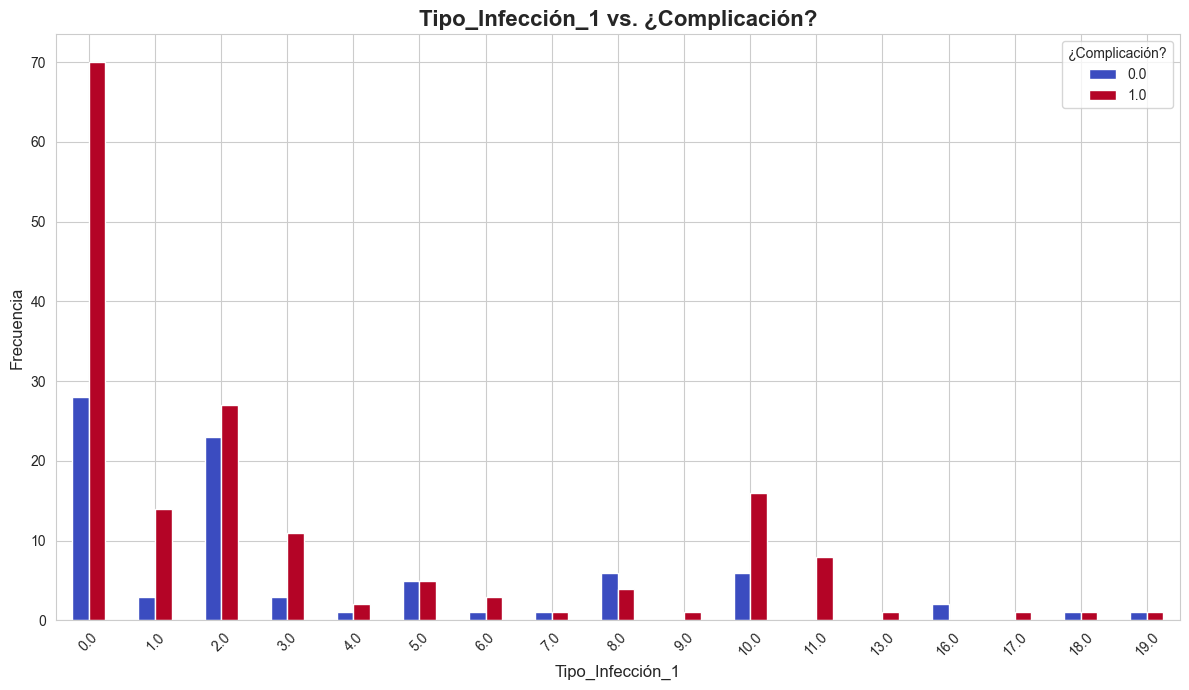


üìà Resultados de Chi-cuadrado:
   Chi¬≤ = 22.7285
   p-valor = 0.1212
   Grados de libertad = 16

‚ö†Ô∏è Advertencia: 64.7% de celdas tienen frecuencia esperada < 5
   ‚ÑπÔ∏è Prueba de Fisher solo disponible para tablas 2x2.

üí° Interpretaci√≥n:
   ‚úó No significativo (p=0.1212 ‚â• 0.05)
   No hay evidencia de asociaci√≥n entre las variables

An√°lisis ORDINAL: 'Germen_1' vs. '¬øComplicaci√≥n?'

üìä Tabla de Contingencia:
¬øComplicaci√≥n?  0.0  1.0
Germen_1                
0.0              28   56
1.0               6   19
2.0               1    3
3.0               2    2
4.0               1    0
6.0               1    1
7.0              12   15
8.0               0    1
9.0               0    1
10.0              3    3
12.0              1    1
14.0              5    1
16.0              0    6
17.0              6    2
18.0              0    1
19.0              2    0
22.0              1    0
23.0              1    1
24.0              0    2
26.0              0    2
27.0           

<Figure size 1200x700 with 0 Axes>

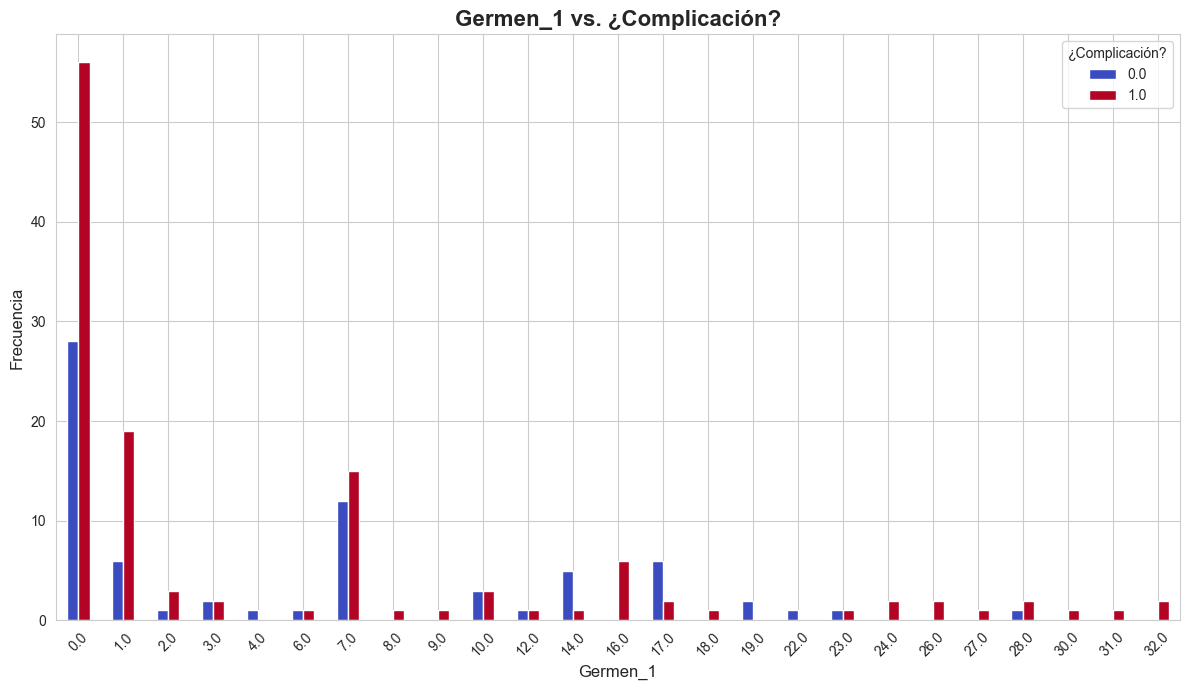


üìà Resultados de Chi-cuadrado:
   Chi¬≤ = 32.4162
   p-valor = 0.1170
   Grados de libertad = 24

‚ö†Ô∏è Advertencia: 86.0% de celdas tienen frecuencia esperada < 5
   ‚ÑπÔ∏è Prueba de Fisher solo disponible para tablas 2x2.

üí° Interpretaci√≥n:
   ‚úó No significativo (p=0.1170 ‚â• 0.05)
   No hay evidencia de asociaci√≥n entre las variables

An√°lisis ORDINAL: '#_De_Complicaciones' vs. '¬øComplicaci√≥n?'

üìä Tabla de Contingencia:
¬øComplicaci√≥n?       0.0  1.0
#_De_Complicaciones          
0.0                   47   80
1.0                   86   53
2.0                   73  122
3.0                    0    1
4.0                    0   10
5.0                    0    2
8.0                    0    2
9.0                    0    1
18.0                   0    6
19.0                   0    1
20.0                   0    2
32.0                   0    1
33.0                   0    1
34.0                   0    1
37.0                   0    1


<Figure size 1200x700 with 0 Axes>

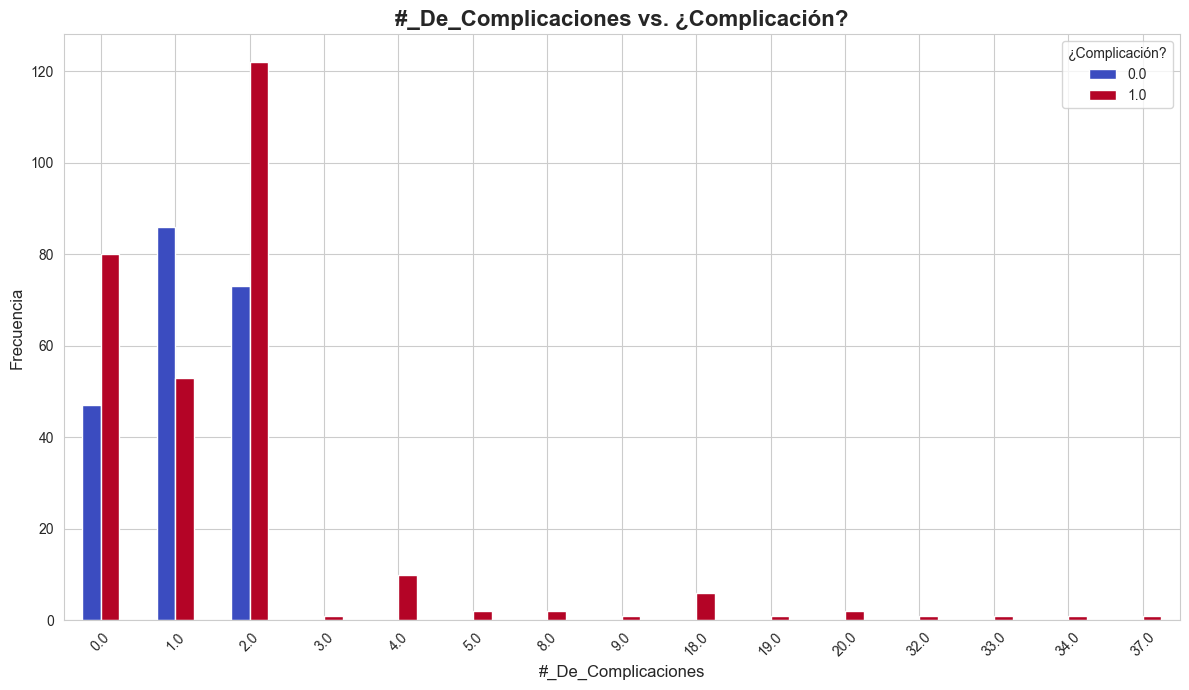


üìà Resultados de Chi-cuadrado:
   Chi¬≤ = 46.4837
   p-valor = 0.0000
   Grados de libertad = 14

‚ö†Ô∏è Advertencia: 76.7% de celdas tienen frecuencia esperada < 5
   ‚ÑπÔ∏è Prueba de Fisher solo disponible para tablas 2x2.

üí° Interpretaci√≥n:
   ‚úì ASOCIACI√ìN SIGNIFICATIVA (p=0.0000 < 0.05)
   Existe relaci√≥n estad√≠stica entre '#_De_Complicaciones' y '¬øComplicaci√≥n?'


In [212]:

for variable in variables_ordinales:
    print(f"\n{'='*60}")
    print(f"An√°lisis ORDINAL: '{variable}' vs. '{variable_objetivo}'")
    print(f"{'='*60}")

    if variable not in df.columns or variable_objetivo not in df.columns:
        print(f"‚ö†Ô∏è Columna '{variable}' o '{variable_objetivo}' no encontrada. Omitiendo.")
        continue

    df_limpio = df[[variable, variable_objetivo]].dropna()

    if df_limpio.empty:
        print("‚ö†Ô∏è No hay datos v√°lidos despu√©s de eliminar valores nulos.")
        continue

    if len(df_limpio[variable_objetivo].unique()) < 2:
        print("‚ö†Ô∏è No hay suficiente variabilidad en la variable objetivo.")
        continue

    tabla_contingencia = pd.crosstab(df_limpio[variable], df_limpio[variable_objetivo])

    if tabla_contingencia.shape[0] < 2 or tabla_contingencia.shape[1] < 2:
        print("‚ö†Ô∏è Tabla de contingencia insuficiente.")
        continue

    print("\nüìä Tabla de Contingencia:")
    print(tabla_contingencia)

    plt.figure()
    tabla_contingencia.plot(kind='bar', rot=45, colormap='coolwarm')
    plt.title(f'{variable} vs. {variable_objetivo}', fontsize=16, fontweight='bold')
    plt.xlabel(variable, fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.legend(title=variable_objetivo, title_fontsize=10)
    plt.tight_layout()
    plt.show()
    plt.close()

    try:
        chi2, p_value, dof, expected = chi2_contingency(tabla_contingencia)

        celdas_invalidas = (expected < 5).sum()
        porcentaje_invalido = (celdas_invalidas / expected.size) * 100

        print("\nüìà Resultados de Chi-cuadrado:")
        print(f"   Chi¬≤ = {chi2:.4f}")
        print(f"   p-valor = {p_value:.4f}")
        print(f"   Grados de libertad = {dof}")

        if porcentaje_invalido > 20:
            print(f"\n‚ö†Ô∏è Advertencia: {porcentaje_invalido:.1f}% de celdas tienen frecuencia esperada < 5")

            # Realizar prueba de Fisher si es tabla 2x2
            if tabla_contingencia.shape == (2, 2):
                try:
                    oddsratio, fisher_p = fisher_exact(tabla_contingencia)
                    print("\nüî¨ Prueba Exacta de Fisher (alternativa para muestras peque√±as):")
                    print(f"   Odds Ratio = {oddsratio:.4f}")
                    print(f"   p-valor (Fisher) = {fisher_p:.4f}")

                    alpha = 0.05
                    print("\nüí° Interpretaci√≥n (Fisher):")
                    if fisher_p < alpha:
                        print(f"   ‚úì ASOCIACI√ìN SIGNIFICATIVA (p={fisher_p:.4f} < {alpha})")
                        print(f"   Existe relaci√≥n estad√≠stica entre '{variable}' y '{variable_objetivo}'")
                    else:
                        print(f"   ‚úó No significativo (p={fisher_p:.4f} ‚â• {alpha})")
                        print(f"   No hay evidencia de asociaci√≥n entre las variables")
                except Exception as e:
                    print(f"\n‚ùå Error en Prueba de Fisher: {e}")
            else:
                print("   ‚ÑπÔ∏è Prueba de Fisher solo disponible para tablas 2x2.")

        alpha = 0.05
        print("\nüí° Interpretaci√≥n:")
        if p_value < alpha:
            print(f"   ‚úì ASOCIACI√ìN SIGNIFICATIVA (p={p_value:.4f} < {alpha})")
            print(f"   Existe relaci√≥n estad√≠stica entre '{variable}' y '{variable_objetivo}'")
        else:
            print(f"   ‚úó No significativo (p={p_value:.4f} ‚â• {alpha})")
            print(f"   No hay evidencia de asociaci√≥n entre las variables")
    except Exception as e:
        print(f"\n‚ùå Error en Chi-cuadrado: {e}")

### Fechas


üìä Rango de fechas en Fecha_Egreso_UCI:
   M√≠nima: 2004-08-14 00:00:00
   M√°xima: 2025-03-05 00:00:00
   Total registros: 100


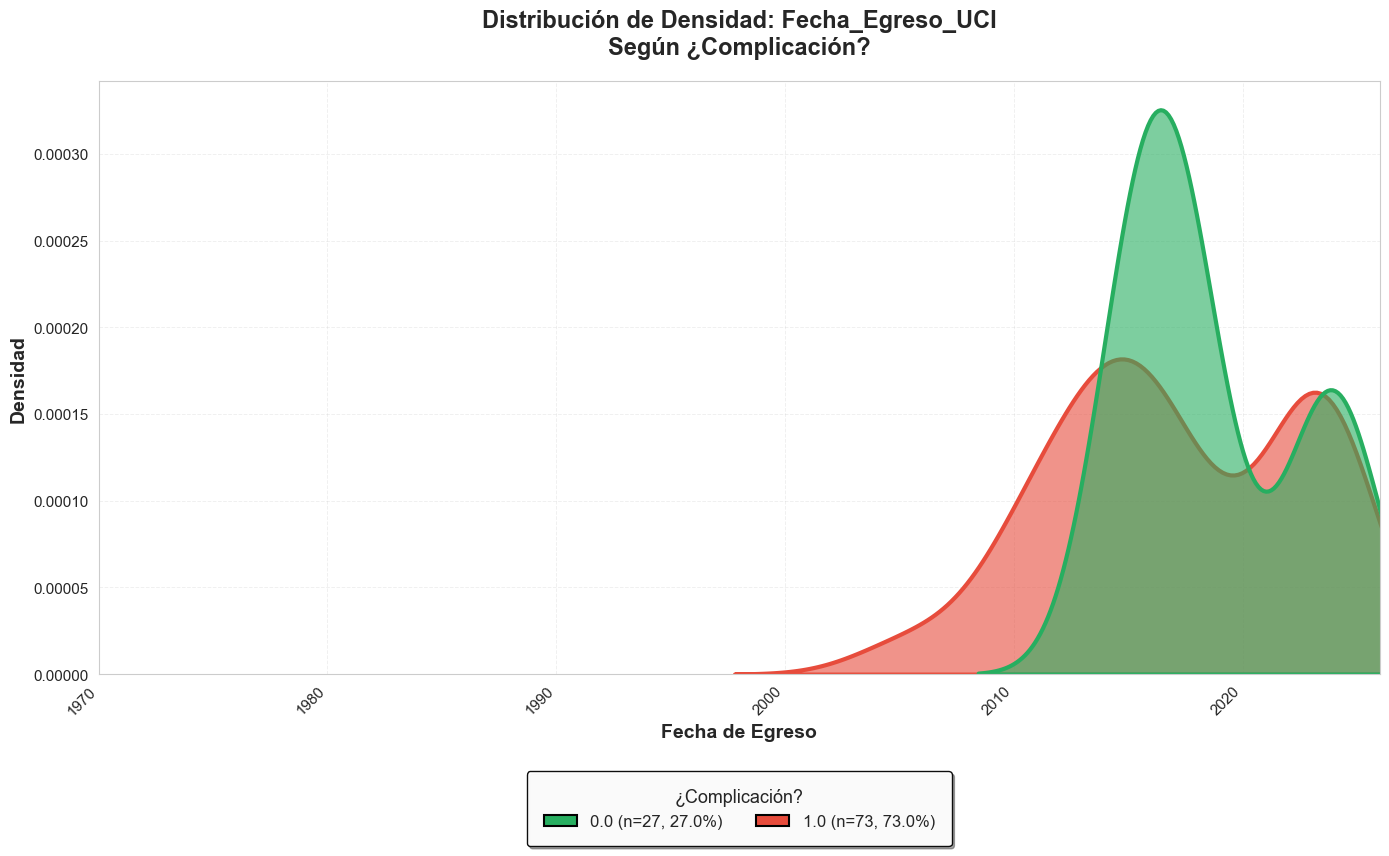


üìä Rango de fechas en Fecha_Egreso_Hospitalario:
   M√≠nima: 2004-08-14 00:00:00
   M√°xima: 2025-03-13 00:00:00
   Total registros: 137


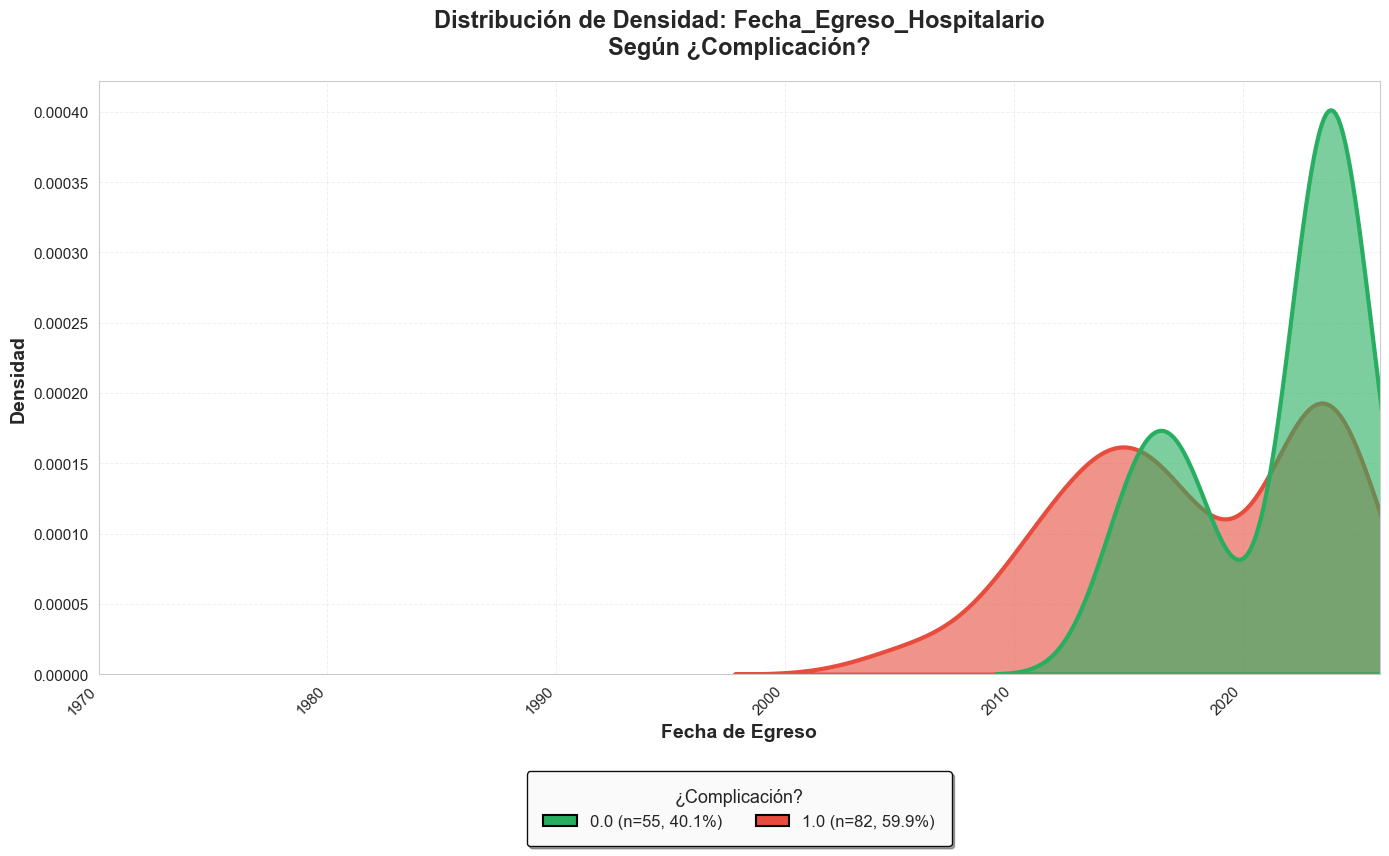

In [214]:
from matplotlib.patches import Patch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 9)

variables_fechas = [
    'Fecha_Egreso_UCI', 'Fecha_Egreso_Hospitalario'
]

variable_objetivo = '¬øComplicaci√≥n?'

colores_personalizados = ['#27ae60', '#e74c3c', '#3498db', '#f39c12']
palette = sns.color_palette(colores_personalizados)

for variable in variables_fechas:

    if variable not in df.columns or variable_objetivo not in df.columns:
        print(f"‚ö†Ô∏è Columna no encontrada.")
        continue

    df_plot = df[[variable, variable_objetivo]].copy()
    df_plot[variable] = pd.to_datetime(df_plot[variable], errors='coerce')
    df_plot.dropna(inplace=True)

    fecha_minima = pd.Timestamp('1970-01-01')
    fecha_maxima = pd.Timestamp('2025-12-31')
    df_plot = df_plot[
        (df_plot[variable] >= fecha_minima) &
        (df_plot[variable] <= fecha_maxima)
    ]

    if df_plot.empty:
        print("‚ö†Ô∏è No hay datos v√°lidos despu√©s de filtrar.")
        continue

    print(f"\nüìä Rango de fechas en {variable}:")
    print(f"   M√≠nima: {df_plot[variable].min()}")
    print(f"   M√°xima: {df_plot[variable].max()}")
    print(f"   Total registros: {len(df_plot)}")

    categorias = sorted(df_plot[variable_objetivo].unique())
    palette_ajustada = palette[:len(categorias)]

    fig, ax = plt.subplots(figsize=(14, 8))

    sns.kdeplot(
        data=df_plot,
        x=variable,
        hue=variable_objetivo,
        fill=True,
        common_norm=False,
        alpha=0.6,
        linewidth=3,
        palette=palette_ajustada,
        ax=ax
    )

    legend_elements = []
    for i, cat in enumerate(categorias):
        count = (df_plot[variable_objetivo] == cat).sum()
        pct = (count / len(df_plot)) * 100
        legend_elements.append(
            Patch(
                facecolor=palette_ajustada[i],
                edgecolor='black',
                linewidth=1.5,
                label=f'{cat} (n={count}, {pct:.1f}%)'
            )
        )

    ax.legend(
        handles=legend_elements,
        title=f'{variable_objetivo}',
        title_fontsize=13,
        fontsize=12,
        loc='upper center',
        bbox_to_anchor=(0.5, -0.15),
        ncol=len(categorias),
        frameon=True,
        shadow=True,
        fancybox=True,
        framealpha=0.95,
        edgecolor='black',
        borderpad=1
    )

    plt.title(
        f'Distribuci√≥n de Densidad: {variable}\nSeg√∫n {variable_objetivo}',
        fontsize=17,
        fontweight='bold',
        pad=20
    )
    plt.xlabel('Fecha de Egreso', fontsize=14, fontweight='bold')
    plt.ylabel('Densidad', fontsize=14, fontweight='bold')

    ax.set_xlim(fecha_minima, fecha_maxima)

    ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.7)
    plt.xticks(rotation=45, ha='right', fontsize=11)
    plt.yticks(fontsize=11)

    plt.tight_layout()
    plt.subplots_adjust(bottom=0.15)

    plt.show()
    plt.close()

En la variable "Fecha_Egreso_UCI", entre los a√±os 2010 y 2025, se observa una mayor cantidad de casos de complicaciones.

### Variables de tiempo


üìä Estad√≠sticas Descriptivas:
   Sin complicaci√≥n (n=174): Media=7.01, DE=6.45
   Con complicaci√≥n (n=214): Media=8.43, DE=7.90


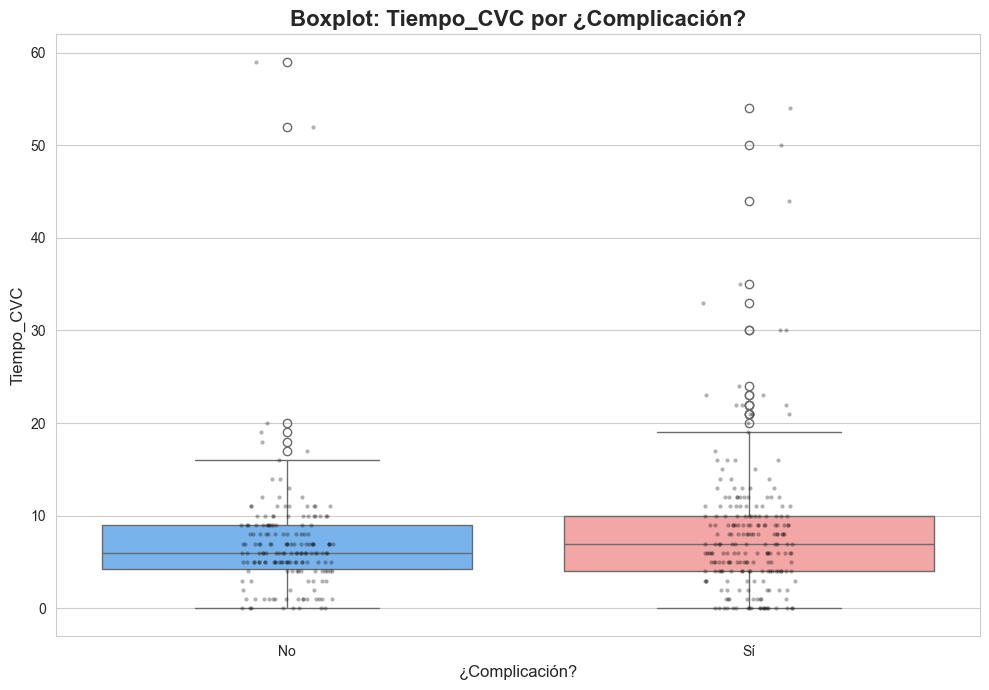


üìà Resultados de la Prueba T:
   Estad√≠stico T: 1.9086
   P-valor: 0.0571

üí° Interpretaci√≥n:
   ‚úó No significativo (p=0.0571 ‚â• 0.05)
   No hay evidencia de diferencia significativa en 'Tiempo_CVC' entre grupos.

üìä Estad√≠sticas Descriptivas:
   Sin complicaci√≥n (n=241): Media=6.67, DE=8.40
   Con complicaci√≥n (n=228): Media=6.46, DE=9.25


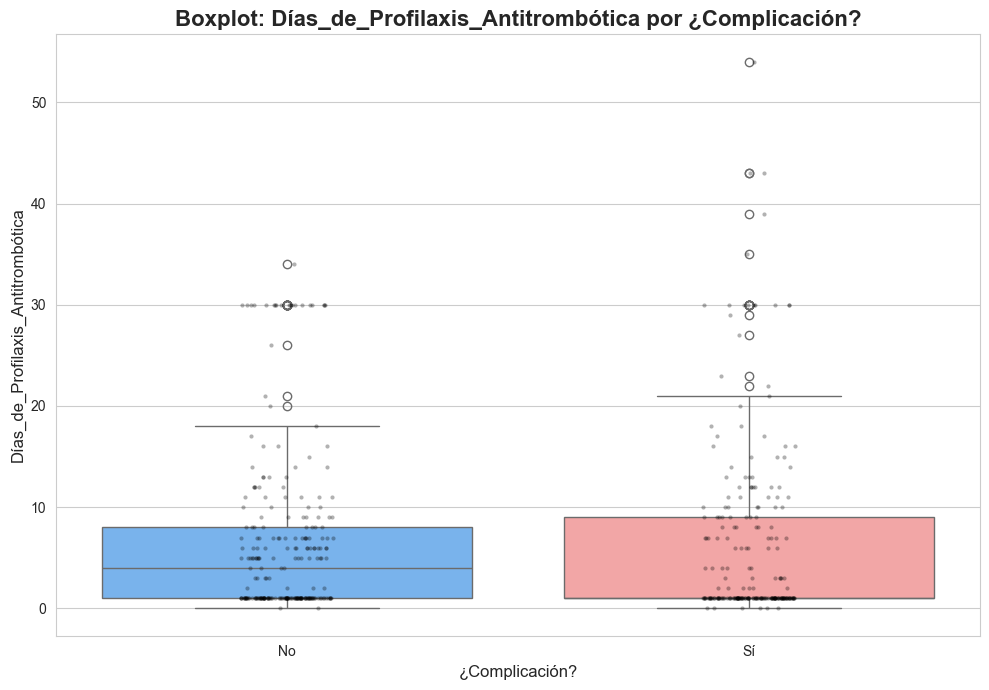


üìà Resultados de la Prueba T:
   Estad√≠stico T: -0.2547
   P-valor: 0.7991

üí° Interpretaci√≥n:
   ‚úó No significativo (p=0.7991 ‚â• 0.05)
   No hay evidencia de diferencia significativa en 'D√≠as_de_Profilaxis_Antitromb√≥tica' entre grupos.

üìä Estad√≠sticas Descriptivas:
   Sin complicaci√≥n (n=314): Media=2.51, DE=2.68
   Con complicaci√≥n (n=361): Media=6.51, DE=11.23


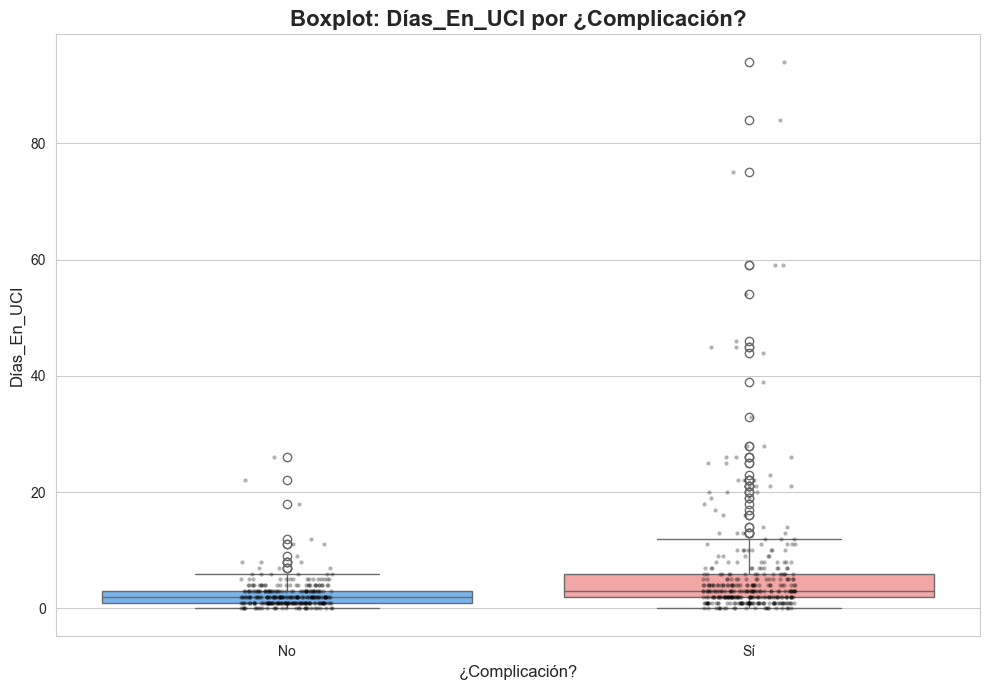


üìà Resultados de la Prueba T:
   Estad√≠stico T: 6.1655
   P-valor: 0.0000

üí° Interpretaci√≥n:
   ‚úì DIFERENCIA SIGNIFICATIVA (p=0.0000 < 0.05)
   Existe diferencia estad√≠sticamente significativa en 'D√≠as_En_UCI' entre grupos.

üìä Estad√≠sticas Descriptivas:
   Sin complicaci√≥n (n=313): Media=7.37, DE=5.36
   Con complicaci√≥n (n=361): Media=10.52, DE=11.73


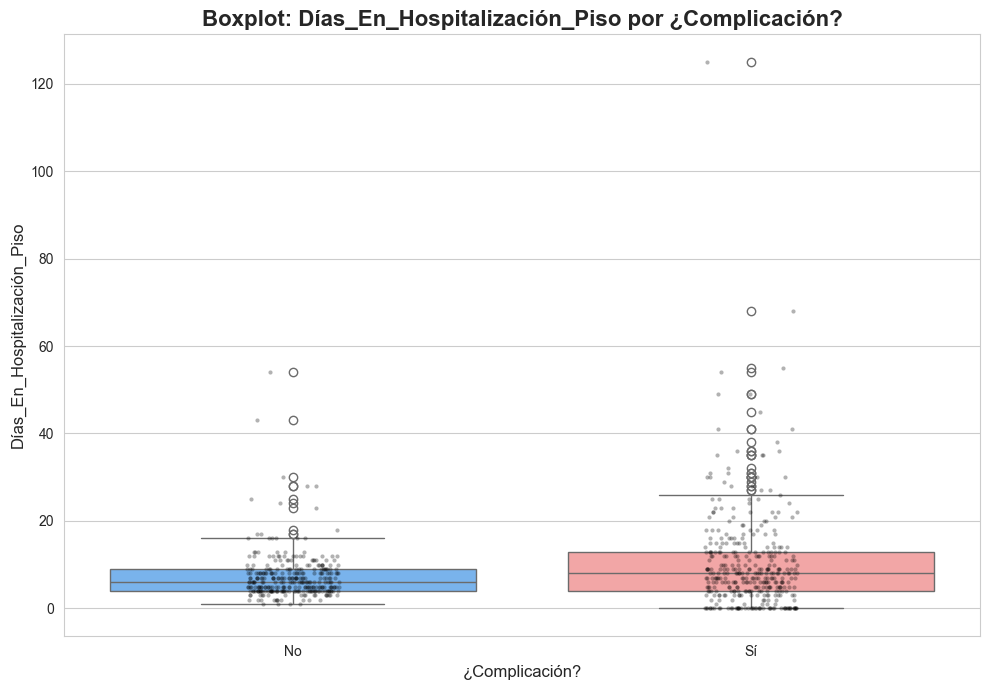


üìà Resultados de la Prueba T:
   Estad√≠stico T: 4.3772
   P-valor: 0.0000

üí° Interpretaci√≥n:
   ‚úì DIFERENCIA SIGNIFICATIVA (p=0.0000 < 0.05)
   Existe diferencia estad√≠sticamente significativa en 'D√≠as_En_Hospitalizaci√≥n_Piso' entre grupos.

üìä Estad√≠sticas Descriptivas:
   Sin complicaci√≥n (n=313): Media=9.74, DE=6.84
   Con complicaci√≥n (n=361): Media=16.55, DE=16.69


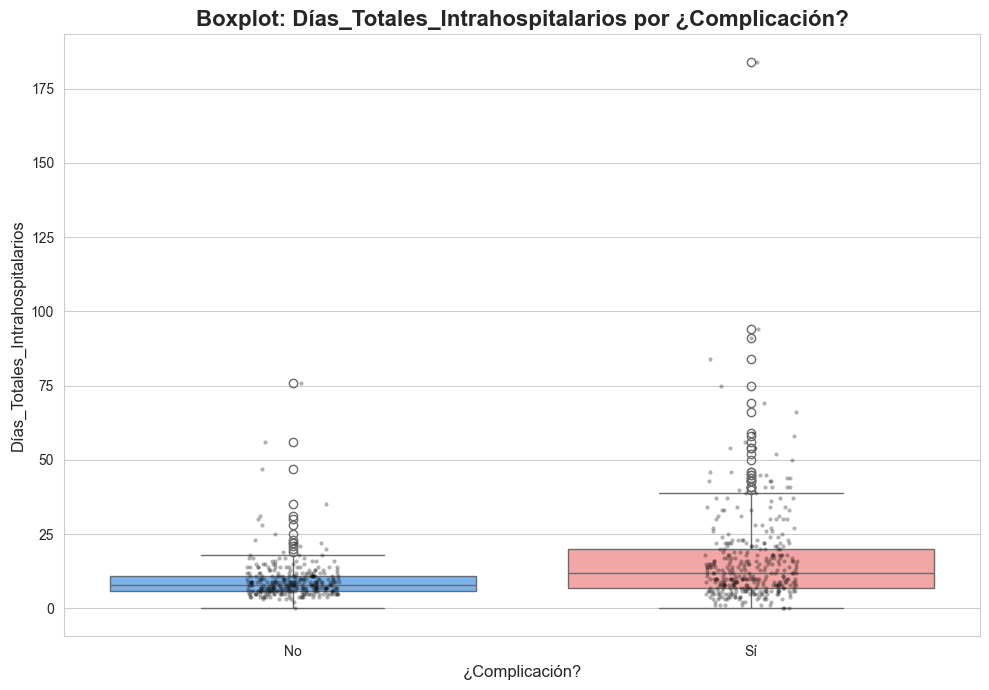


üìà Resultados de la Prueba T:
   Estad√≠stico T: 6.7415
   P-valor: 0.0000

üí° Interpretaci√≥n:
   ‚úì DIFERENCIA SIGNIFICATIVA (p=0.0000 < 0.05)
   Existe diferencia estad√≠sticamente significativa en 'D√≠as_Totales_Intrahospitalarios' entre grupos.


In [217]:
from scipy.stats import ttest_ind

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 7)


variables_cuantitativas = [
    'Tiempo_CVC', 'D√≠as_de_Profilaxis_Antitromb√≥tica',
    'D√≠as_En_UCI', 'D√≠as_En_Hospitalizaci√≥n_Piso', 'D√≠as_Totales_Intrahospitalarios'
]

variable_objetivo = '¬øComplicaci√≥n?'

for variable in variables_cuantitativas:

    if variable not in df.columns or variable_objetivo not in df.columns:
        print(f"‚ö†Ô∏è Advertencia: Columna no encontrada. Omitiendo an√°lisis.")
        continue

    df_limpio = df[[variable, variable_objetivo]].dropna().copy()
    df_limpio = df_limpio.reset_index(drop=True)

    if df_limpio.empty:
        print("‚ö†Ô∏è No hay datos v√°lidos despu√©s de eliminar valores nulos.")
        continue

    grupo_con_complicacion = df_limpio[df_limpio[variable_objetivo] == 1][variable]
    grupo_sin_complicacion = df_limpio[df_limpio[variable_objetivo] == 0][variable]

    if grupo_con_complicacion.empty or grupo_sin_complicacion.empty:
        print("‚ö†Ô∏è Uno de los grupos est√° vac√≠o. Omitiendo an√°lisis.")
        continue

    print(f"\nüìä Estad√≠sticas Descriptivas:")
    print(f"   Sin complicaci√≥n (n={len(grupo_sin_complicacion)}): Media={grupo_sin_complicacion.mean():.2f}, DE={grupo_sin_complicacion.std():.2f}")
    print(f"   Con complicaci√≥n (n={len(grupo_con_complicacion)}): Media={grupo_con_complicacion.mean():.2f}, DE={grupo_con_complicacion.std():.2f}")


    plt.figure(figsize=(10, 7))
    sns.boxplot(
        data=df_limpio,
        x=variable_objetivo,
        y=variable,
        hue=variable_objetivo,
        palette=['#66b3ff', '#ff9999'],
        legend=False
    )


    sns.stripplot(
        data=df_limpio,
        x=variable_objetivo,
        y=variable,
        color='black',
        alpha=0.3,
        jitter=True,
        size=3
    )

    plt.title(f'Boxplot: {variable} por {variable_objetivo}', fontsize=16, fontweight='bold')
    plt.xlabel(variable_objetivo, fontsize=12)
    plt.ylabel(variable, fontsize=12)
    plt.xticks([0, 1], ['No', 'S√≠'])
    plt.tight_layout()
    plt.show()
    plt.close()


    try:
        t_stat, p_value = ttest_ind(grupo_con_complicacion, grupo_sin_complicacion)

        print("\nüìà Resultados de la Prueba T:")
        print(f"   Estad√≠stico T: {t_stat:.4f}")
        print(f"   P-valor: {p_value:.4f}")

        alpha = 0.05
        print("\nüí° Interpretaci√≥n:")
        if p_value < alpha:
            print(f"   ‚úì DIFERENCIA SIGNIFICATIVA (p={p_value:.4f} < {alpha})")
            print(f"   Existe diferencia estad√≠sticamente significativa en '{variable}' entre grupos.")
        else:
            print(f"   ‚úó No significativo (p={p_value:.4f} ‚â• {alpha})")
            print(f"   No hay evidencia de diferencia significativa en '{variable}' entre grupos.")

    except Exception as e:
        print(f"\n‚ùå Error en Prueba T: {e}")

## Hepatocarcinoma vs Complicaciones

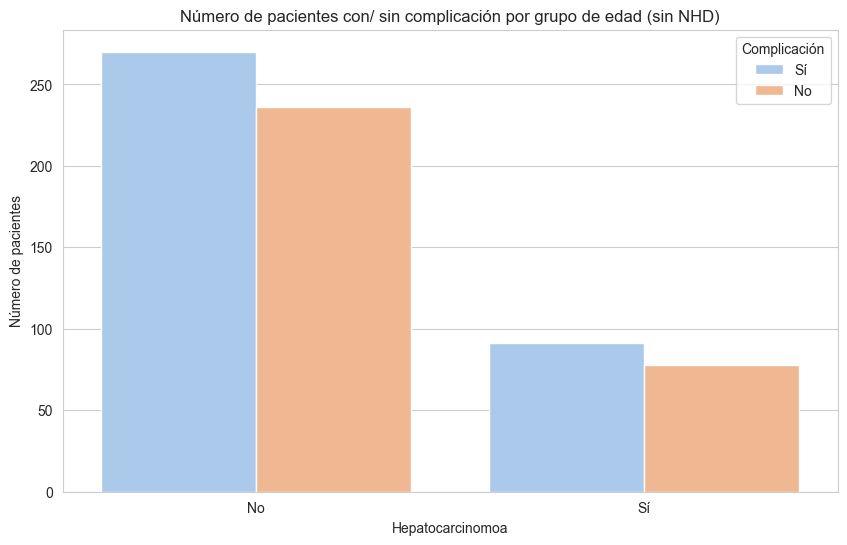

In [231]:
hepatocarcinoma_nom = df['Hepatocarcinoma'].replace({0: "No", 1: "S√≠"})
complicaciones2 = df['¬øComplicaci√≥n?'].replace({0: "No", 1: "S√≠"})
mask = complicaciones2.notna()

plt.figure(figsize=(10,6))
sns.countplot(
    data=df.loc[mask],
    x=hepatocarcinoma_nom[mask],
    hue=complicaciones1[mask],  # S√≠ / No
    palette="pastel"
)

plt.title("N√∫mero de pacientes con/ sin complicaci√≥n por grupo de edad (sin NHD)")
plt.xlabel("Hepatocarcinomoa")
plt.ylabel("N√∫mero de pacientes")
plt.legend(title="Complicaci√≥n")
plt.show()

# Conclusiones

A pesar de que las variables Trombosis_Porta_Tumoral, Tuvo_Inmunosupresi√≥n_con_Anticuerpos, Œ±FP_Al_Dx, Grado_HCC y Estadio no presentaron relevancia estadisticamente significativa, cabe aclarar que esto no implica que la relaci√≥n no sea real. 

Se resalta que variables como Grado_HCC y Estadio presentan una tendencia significatica al presentar mayor proporci√≥n de complicaciones conforme aumenta su grado. 

Se plantea continuar con un analisis multivariado que permita identificar combinaciones de factores que puedan influir en las complicaciones, con eso se podr√° tratar el efecto aislado que presentamos aqui de cada variable

* En el caso de la variable "Soporte Vasopresor PeriTx", se observa una relaci√≥n estad√≠stica con nuestra variable objetivo "Complicaciones". Adem√°s, en el gr√°fico de barras se puede apreciar que hay una mayor cantidad de casos de complicaciones cuando se requiri√≥ soporte vasopresor postoperatorio.
* En el caso de la variable "Levosimendan_PeriTx" (uso perioperatorio de levosimendan), se observa una mayor cantidad de casos en los que no se requiri√≥ soporte con levosimendan, aunque tambi√©n existe una buena cantidad de complicaciones cuando no se utiliz√≥. Por otro lado, en los casos en que fue necesario su uso, se registraron m√°s complicaciones. Ademas, por los pocos casos que se uso la tecnica, se implemento la prueba de fisher sin embargo no es un dato confiable por la poca cantidad de paciente, que puede generar sesgos.
* En el caso de la variable "Noradrenalina_PeriTx" , se observa una mayor cantidad de casos de complicaciones cuando se requiri√≥ soporte con noradrenalina, y esta variable presenta una relaci√≥n estad√≠stica con la variable objetivo.
* En el caso de la variable "Adrenalina_PeriTx" (uso perioperatorio de adrenalina), se observa una mayor cantidad de casos en los que no se utiliz√≥. Sin embargo, en los casos en que s√≠ se us√≥, hay una mayor cantidad de complicaciones, y esta variable presenta una relaci√≥n estad√≠stica con la variable objetivo.

Adem√°s, en todas las dem√°s variables se observa un patr√≥n similar, excepto en "Profilaxis Antitromb√≥tica", donde hay una mayor cantidad de casos en los que s√≠ se utiliz√≥ profilaxis antitromb√≥tica. No obstante, tambi√©n se registran casos de complicaciones en este grupo, y lo interesante es que el grupo con complicaciones es considerablemente alto.
* En el caso de la variable "N√∫mero de Complicaciones", se observa que cuando hay 2 complicaciones, existe una mayor cantidad de casos de complicaciones, y esta variable presenta una relaci√≥n estad√≠stica con la variable objetivo

Todas las variables "Tiempo_CVC", "D√≠as_de_Profilaxis_Antitromb√≥tica", "D√≠as_En_UCI", "D√≠as_En_Hospitalizaci√≥n_Piso" y "D√≠as_Totales_Intrahospitalarios" presentan una diferencia estad√≠sticamente significativa entre grupos, y los datos son m√°s variables e impredecibles en pacientes con complicaciones.